Connected to base (Python 3.11.7)

In [ ]:
import pandas as pd
import altair as alt
import time

import warnings 
warnings.filterwarnings('ignore')
alt.renderers.enable("png")

from datetime import datetime

import requests
from bs4 import BeautifulSoup
import pandas as pd

import concurrent.futures
from datetime import datetime

import geopandas as gpd
import matplotlib.pyplot as plt
import re

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions.csv'  # 假设你的执法行动数据保存在这个路径下
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['agency_info'].apply(clean_district_name)

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Merge the shapefile with the enforcement actions count
us_districts_gdf['district'] = us_districts_gdf['district'].str.strip()  # 去除 shapefile 中的地区名称的多余空格
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 6: Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions.csv'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 假设你的执法行动数据保存在这个路径下
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['agency_info'].apply(clean_district_name)

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Merge the shapefile with the enforcement actions count
us_districts_gdf['district'] = us_districts_gdf['district'].str.strip()  # 去除 shapefile 中的地区名称的多余空格
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 6: Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()


KeyError: 'agency_info'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon

# Step 1: Load enforcement actions data
enforcement_data_path = '/mnt/data/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['agency_info'].apply(clean_district_name)

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/mnt/data/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Handle multi-part geometries by converting MultiPolygon to single parts if necessary
us_districts_gdf['geometry'] = us_districts_gdf['geometry'].apply(
    lambda geom: geom if not isinstance(geom, MultiPolygon) else max(geom, key=lambda p: p.area)
)

# Step 6: Merge the shapefile with the enforcement actions count
us_districts_gdf['district'] = us_districts_gdf['district'].str.strip()  # 去除 shapefile 中的地区名称的多余空格
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 7: Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/enforcement_actions_2021_1.csv'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['agency_info'].apply(clean_district_name)

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/cb_2018_us_zcta510_500k/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Handle multi-part geometries by converting MultiPolygon to single parts if necessary
us_districts_gdf['geometry'] = us_districts_gdf['geometry'].apply(
    lambda geom: geom if not isinstance(geom, MultiPolygon) else max(geom, key=lambda p: p.area)
)

# Step 6: Merge the shapefile with the enforcement actions count
us_districts_gdf['district'] = us_districts_gdf['district'].str.strip()  # 去除 shapefile 中的地区名称的多余空格
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 7: Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()


KeyError: 'agency_info'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/mnt/data/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['agency_info'].apply(clean_district_name)

# Step 3: Extract state names for state-level enforcement actions
state_data = enforcement_df[enforcement_df['agency_info'].str.contains('State of', na=False, case=False)]

def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None

state_data['State'] = state_data['agency_info'].apply(extract_state_name)
state_data = state_data.dropna(subset=['State'])
state_data['State'] = state_data['State'].str.strip().str.title()

# Step 4: Aggregate enforcement actions by state
state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Step 5: Load the shapefile of US Attorney Districts
shapefile_path = '/mnt/data/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 6: Fuzzy match district names to improve merging
us_districts_gdf['district'] = us_districts_gdf['district'].str.strip()  # 去除 shapefile 中的地区名称的多余空格

def match_district(name, choices):
    for choice in choices:
        if name.lower() in choice.lower() or choice.lower() in name.lower():
            return choice
    return None

district_choices = us_districts_gdf['district'].unique()
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']
district_counts['matched_district'] = district_counts['district'].apply(lambda x: match_district(x, district_choices))

# Remove rows with no match
district_counts = district_counts[district_counts['matched_district'].notna()]

# Step 7: Merge the shapefile with the enforcement actions count
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='matched_district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

# Step 9: Load the shapefile of US States and merge with state-level enforcement actions
gdf_states = gpd.read_file('/mnt/data/cb_2018_us_state_500k.shp')
gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

# Step 10: Plot the choropleth for states
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6})

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/enforcement_actions_2021_1.csv'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['agency_info'].apply(clean_district_name)

# Step 3: Extract state names for state-level enforcement actions
state_data = enforcement_df[enforcement_df['agency_info'].str.contains('State of', na=False, case=False)]

def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None

state_data['State'] = state_data['agency_info'].apply(extract_state_name)
state_data = state_data.dropna(subset=['State'])
state_data['State'] = state_data['State'].str.strip().str.title()

# Step 4: Aggregate enforcement actions by state
state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Step 5: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 6: Fuzzy match district names to improve merging
us_districts_gdf['district'] = us_districts_gdf['district'].str.strip()  # 去除 shapefile 中的地区名称的多余空格

def match_district(name, choices):
    for choice in choices:
        if name.lower() in choice.lower() or choice.lower() in name.lower():
            return choice
    return None

district_choices = us_districts_gdf['district'].unique()
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']
district_counts['matched_district'] = district_counts['district'].apply(lambda x: match_district(x, district_choices))

# Remove rows with no match
district_counts = district_counts[district_counts['matched_district'].notna()]

# Step 7: Merge the shapefile with the enforcement actions count
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='matched_district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

# Step 9: Load the shapefile of US States and merge with state-level enforcement actions
gdf_states = gpd.read_file('/mnt/data/cb_2018_us_state_500k.shp')
gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

# Step 10: Plot the choropleth for states
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6})

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')
plt.show()

KeyError: 'agency_info'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Extract state names for state-level enforcement actions
state_data = enforcement_df[enforcement_df['Agency'].str.contains('State of', na=False, case=False)]

def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None

state_data['State'] = state_data['Agency'].apply(extract_state_name)
state_data = state_data.dropna(subset=['State'])
state_data['State'] = state_data['State'].str.strip().str.title()

# Step 4: Aggregate enforcement actions by state
state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Step 5: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 6: Fuzzy match district names to improve merging
us_districts_gdf['district'] = us_districts_gdf['district'].str.strip()  # 去除 shapefile 中的地区名称的多余空格

def match_district(name, choices):
    for choice in choices:
        if name.lower() in choice.lower() or choice.lower() in name.lower():
            return choice
    return None

district_choices = us_districts_gdf['district'].unique()
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']
district_counts['matched_district'] = district_counts['district'].apply(lambda x: match_district(x, district_choices))

# Remove rows with no match
district_counts = district_counts[district_counts['matched_district'].notna()]

# Step 7: Merge the shapefile with the enforcement actions count
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='matched_district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

# Step 9: Load the shapefile of US States and merge with state-level enforcement actions
gdf_states = gpd.read_file('/Users/hahei/Desktop/problem-set-5-xy-wz/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

# Step 10: Plot the choropleth for states
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6})

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')
plt.show()

TypeError: argument of type 'float' is not iterable

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Extract state names for state-level enforcement actions
state_data = enforcement_df[enforcement_df['Agency'].str.contains('State of', na=False, case=False)]

def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None

state_data['State'] = state_data['Agency'].apply(extract_state_name)
state_data = state_data.dropna(subset=['State'])
state_data['State'] = state_data['State'].str.strip().str.title()

# Step 4: Aggregate enforcement actions by state
state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Step 5: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 6: Fuzzy match district names to improve merging
us_districts_gdf['district'] = us_districts_gdf['district'].str.strip()  # 去除 shapefile 中的地区名称的多余空格

def match_district(name, choices):
    for choice in choices:
        if name.lower() in choice.lower() or choice.lower() in name.lower():
            return choice
    return None

district_choices = us_districts_gdf['district'].unique()
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']
district_counts['matched_district'] = district_counts['district'].apply(lambda x: match_district(x, district_choices))

# Remove rows with no match
district_counts = district_counts[district_counts['matched_district'].notna()]

# Step 7: Merge the shapefile with the enforcement actions count
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='matched_district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

# Step 9: Load the shapefile of US States and merge with state-level enforcement actions
gdf_states = gpd.read_file('/Users/hahei/Desktop/problem-set-5-xy-wz/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

# Step 10: Plot the choropleth for states
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6})

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')
plt.show()

KeyError: 'district'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Extract state names for state-level enforcement actions
state_data = enforcement_df[enforcement_df['Agency'].str.contains('State of', na=False, case=False)]

def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None

state_data['State'] = state_data['Agency'].apply(extract_state_name)
state_data = state_data.dropna(subset=['State'])
state_data['State'] = state_data['State'].str.strip().str.title()

# Step 4: Aggregate enforcement actions by state
state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Step 5: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 6: Fuzzy match district names to improve merging
us_districts_gdf['district'] = us_districts_gdf['NAME'].str.strip()  # 去除 shapefile 中的地区名称的多余空格

def match_district(name, choices):
    for choice in choices:
        if name.lower() in choice.lower() or choice.lower() in name.lower():
            return choice
    return None

district_choices = us_districts_gdf['district'].unique()
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']
district_counts['matched_district'] = district_counts['district'].apply(lambda x: match_district(x, district_choices))

# Remove rows with no match
district_counts = district_counts[district_counts['matched_district'].notna()]

# Step 7: Merge the shapefile with the enforcement actions count
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='matched_district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

# Step 9: Load the shapefile of US States and merge with state-level enforcement actions
gdf_states = gpd.read_file('/Users/hahei/Desktop/problem-set-5-xy-wz/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

# Step 10: Plot the choropleth for states
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6})

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')
plt.show()

KeyError: 'NAME'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Extract state names for state-level enforcement actions
state_data = enforcement_df[enforcement_df['Agency'].str.contains('State of', na=False, case=False)]

def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None

state_data['State'] = state_data['Agency'].apply(extract_state_name)
state_data = state_data.dropna(subset=['State'])
state_data['State'] = state_data['State'].str.strip().str.title()

# Step 4: Aggregate enforcement actions by state
state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Step 5: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 6: Fuzzy match district names to improve merging
us_districts_gdf['district'] = us_districts_gdf['NAME'].str.strip()  # 去除 shapefile 中的地区名称的多余空格

def match_district(name, choices):
    for choice in choices:
        if name.lower() in choice.lower() or choice.lower() in name.lower():
            return choice
    return None

district_choices = us_districts_gdf['district'].unique()
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']
district_counts['matched_district'] = district_counts['district'].apply(lambda x: match_district(x, district_choices))

# Remove rows with no match
district_counts = district_counts[district_counts['matched_district'].notna()]

# Step 7: Merge the shapefile with the enforcement actions count
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='matched_district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

# Step 9: Load the shapefile of US States and merge with state-level enforcement actions
gdf_states = gpd.read_file('/Users/hahei/Desktop/problem-set-5-xy-wz/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

# Step 10: Plot the choropleth for states
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6})

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')
plt.show()

KeyError: 'NAME'

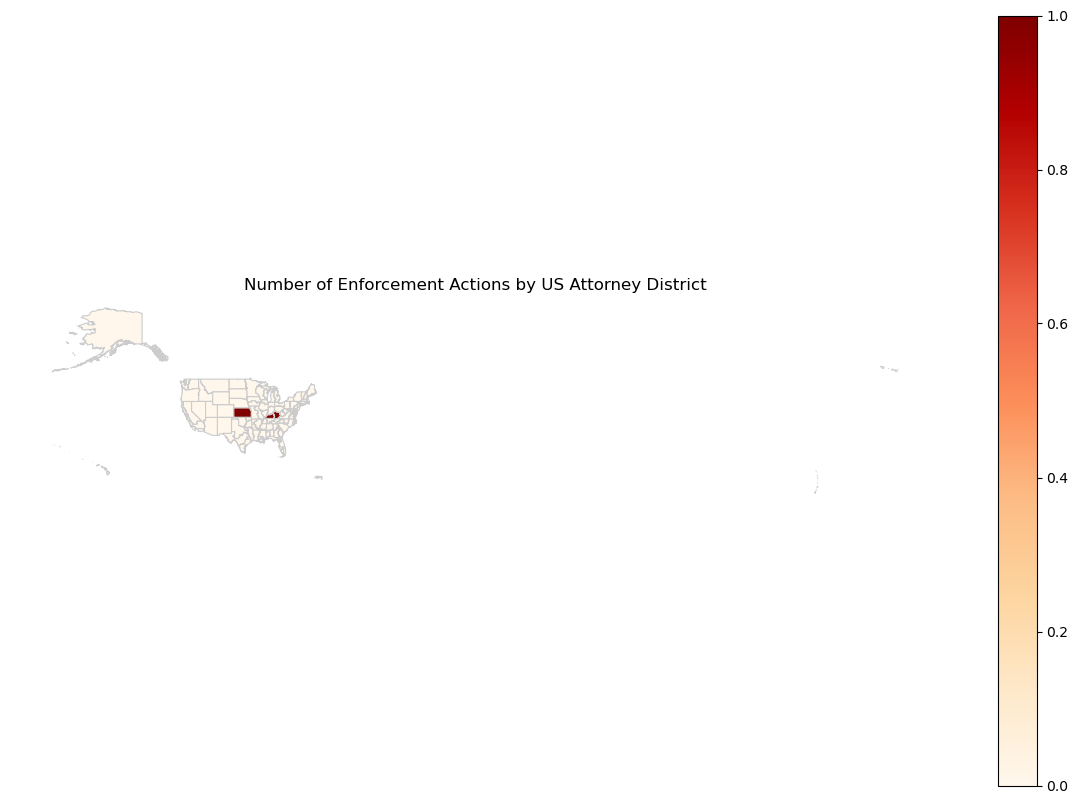

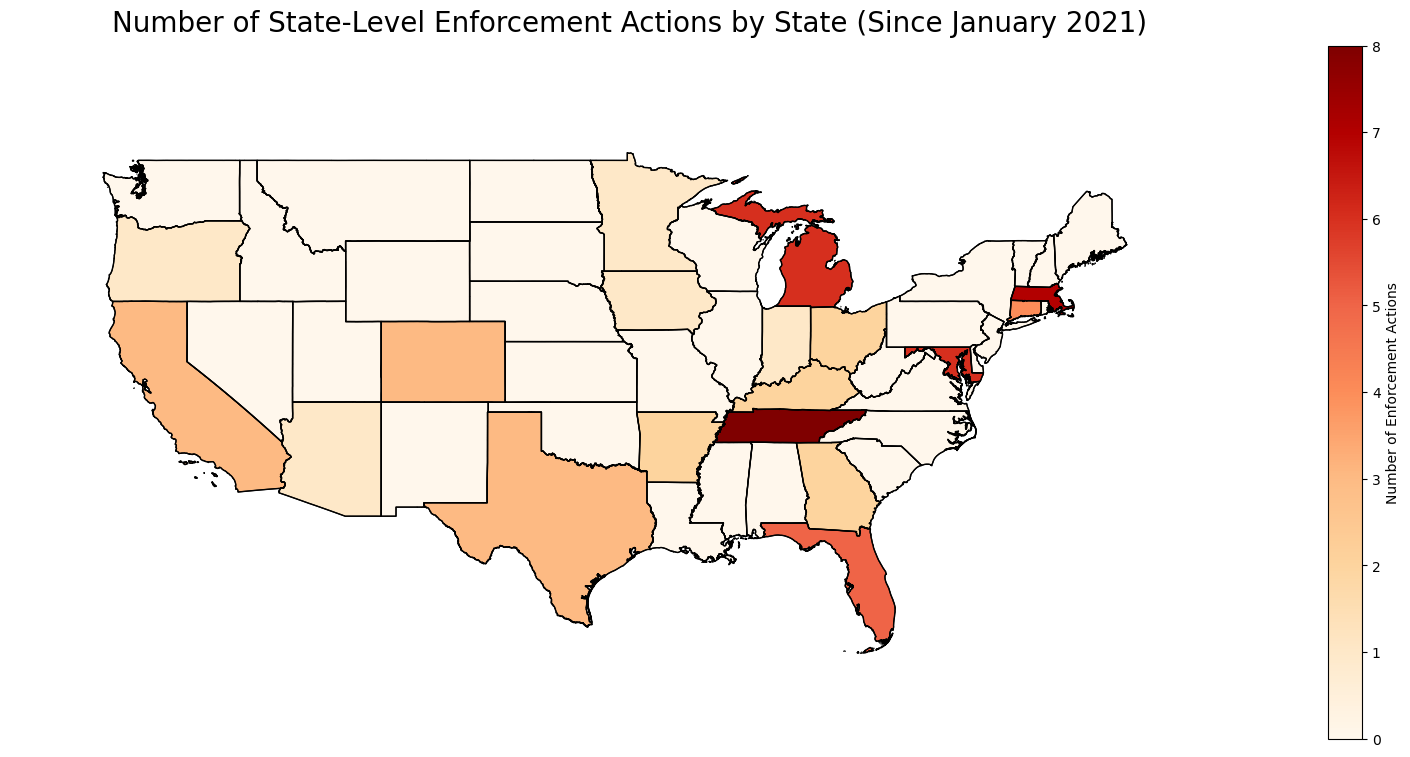

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Extract state names for state-level enforcement actions
state_data = enforcement_df[enforcement_df['Agency'].str.contains('State of', na=False, case=False)]

def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None

state_data['State'] = state_data['Agency'].apply(extract_state_name)
state_data = state_data.dropna(subset=['State'])
state_data['State'] = state_data['State'].str.strip().str.title()

# Step 4: Aggregate enforcement actions by state
state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Step 5: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 6: Fuzzy match district names to improve merging
us_districts_gdf['district'] = us_districts_gdf.iloc[:, 0].str.strip()  # 去除 shapefile 中的地区名称的多余空格

def match_district(name, choices):
    for choice in choices:
        if name.lower() in choice.lower() or choice.lower() in name.lower():
            return choice
    return None

district_choices = us_districts_gdf['district'].unique()
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']
district_counts['matched_district'] = district_counts['district'].apply(lambda x: match_district(x, district_choices))

# Remove rows with no match
district_counts = district_counts[district_counts['matched_district'].notna()]

# Step 7: Merge the shapefile with the enforcement actions count
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='matched_district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

# Step 9: Load the shapefile of US States and merge with state-level enforcement actions
gdf_states = gpd.read_file('/Users/hahei/Desktop/problem-set-5-xy-wz/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

# Step 10: Plot the choropleth for states
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6})

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
state_data = data[data['Agency'].str.contains(
    'State of', na=False, case=False)]


def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None


state_data['State'] = state_data['Agency'].apply(extract_state_name)

state_data = state_data.dropna(subset=['State'])

state_data['State'] = state_data['State'].str.strip().str.title()

state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

gdf_states = gpd.read_file(
    "/Users/cynthia/Desktop/problem-set-5-xy-wz/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")

gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(
    state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6,
                             })

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')

plt.show()

NameError: name 'data' is not defined

In [ ]:
state_data = data[data['Agency'].str.contains(
    'State of', na=False, case=False)]


def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None


state_data['State'] = state_data['Agency'].apply(extract_state_name)

state_data = state_data.dropna(subset=['State'])

state_data['State'] = state_data['State'].str.strip().str.title()

state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

gdf_states = gpd.read_file(
    "/Users/hahei/Desktop/problem-set-5-xy-wz/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")

gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(
    state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6,
                             })

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')

plt.show()

NameError: name 'data' is not defined

In [ ]:
subcategory_data = data[data['Category'] == 'Criminal and Civil Actions']
subcategory_counts = subcategory_data.groupby(['YearMonth', 'SubCategory']).size().reset_index(name='Count')
subcategory_counts['YearMonth'] = subcategory_counts['YearMonth'].astype(str)

subcategory_chart = alt.Chart(subcategory_counts).mark_line(point=True).encode(
    alt.X('YearMonth:T', title='Year-Month', axis=alt.Axis(labelAngle=-45)),
    alt.Y('Count:Q', title='Number of Actions'),
    color='SubCategory:N',
    tooltip=['YearMonth', 'SubCategory', 'Count']
).properties(
    title='Number of Enforcement Actions by SubCategory (Criminal and Civil Actions)',
    width=800,
    height=400
).interactive()

subcategory_chart.show()

NameError: name 'data' is not defined

In [ ]:
file_path = "/Users/cynthia/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])
data['YearMonth'] = data['Date'].dt.to_period('M')

data['Category'] = data['Category'].apply(lambda x: 'Criminal and Civil Actions' if 'Criminal and Civil Actions' in x else 'State Enforcement Agencies')

def assign_subcategory(title):
    title_lower = title.lower()
    if 'health' in title_lower or 'medicare' in title_lower or 'medicaid' in title_lower:
        return 'Health Care Fraud'
    elif 'financial' in title_lower or 'bank' in title_lower or 'money laundering' in title_lower:
        return 'Financial Fraud'
    elif 'drug' in title_lower or 'narcotic' in title_lower:
        return 'Drug Enforcement'
    elif 'bribe' in title_lower or 'corrupt' in title_lower or 'kickback' in title_lower:
        return 'Bribery/Corruption'
    else:
        return 'Other'

data['SubCategory'] = data.apply(lambda row: assign_subcategory(row['Title']) if row['Category'] == 'Criminal and Civil Actions' else None, axis=1)

main_category_counts = data.groupby(['YearMonth', 'Category']).size().reset_index(name='Count')
main_category_counts['YearMonth'] = main_category_counts['YearMonth'].astype(str)

main_chart = alt.Chart(main_category_counts).mark_line(point=True).encode(
    alt.X('YearMonth:T', title='Year-Month', axis=alt.Axis(labelAngle=-45)),
    alt.Y('Count:Q', title='Number of Actions'),
    color='Category:N',
    tooltip=['YearMonth', 'Category', 'Count']
).properties(
    title='Number of Enforcement Actions: Criminal and Civil Actions vs. State Enforcement Agencies',
    width=800,
    height=400
).interactive()

main_chart.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cynthia/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'

In [ ]:
file_path = "/Users/cynthia/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])

data['YearMonth'] = data['Date'].dt.to_period('M')

monthly_counts = data.groupby('YearMonth').size().reset_index(name='Count')

monthly_counts['YearMonth'] = monthly_counts['YearMonth'].astype(str)

chart = alt.Chart(monthly_counts).mark_line(point=True).encode(
    alt.X('YearMonth:T', title='Year-Month', axis=alt.Axis(labelAngle=-45)),
    alt.Y('Count:Q', title='Number of Actions'),
    tooltip=['YearMonth', 'Count']
).properties(
    title='Number of Enforcement Actions Over Time (Since January 2021)',
    width=800,
    height=400
)

chart.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cynthia/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'

In [ ]:
file_path = "/Users/heiha/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])

data['YearMonth'] = data['Date'].dt.to_period('M')

monthly_counts = data.groupby('YearMonth').size().reset_index(name='Count')

monthly_counts['YearMonth'] = monthly_counts['YearMonth'].astype(str)

chart = alt.Chart(monthly_counts).mark_line(point=True).encode(
    alt.X('YearMonth:T', title='Year-Month', axis=alt.Axis(labelAngle=-45)),
    alt.Y('Count:Q', title='Number of Actions'),
    tooltip=['YearMonth', 'Count']
).properties(
    title='Number of Enforcement Actions Over Time (Since January 2021)',
    width=800,
    height=400
)

chart.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/heiha/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'

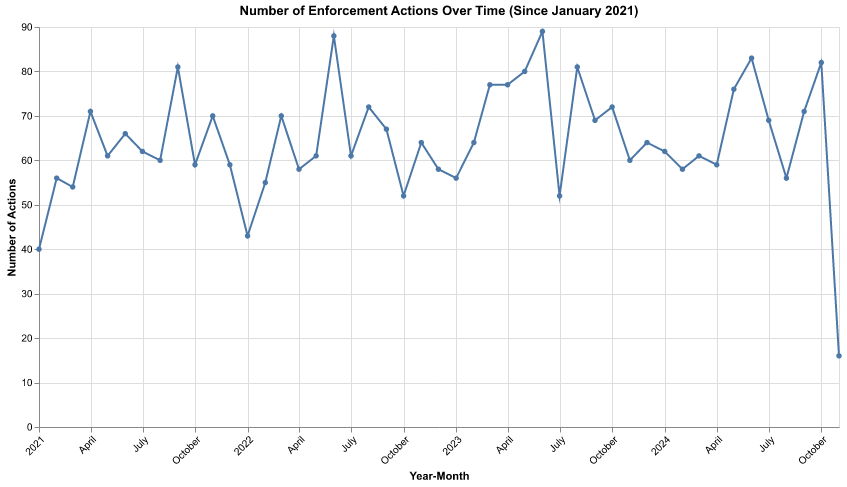

In [ ]:
file_path = "/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])

data['YearMonth'] = data['Date'].dt.to_period('M')

monthly_counts = data.groupby('YearMonth').size().reset_index(name='Count')

monthly_counts['YearMonth'] = monthly_counts['YearMonth'].astype(str)

chart = alt.Chart(monthly_counts).mark_line(point=True).encode(
    alt.X('YearMonth:T', title='Year-Month', axis=alt.Axis(labelAngle=-45)),
    alt.Y('Count:Q', title='Number of Actions'),
    tooltip=['YearMonth', 'Count']
).properties(
    title='Number of Enforcement Actions Over Time (Since January 2021)',
    width=800,
    height=400
)

chart.show()

In [ ]:
file_path = "/Users/cynthia/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])
data['YearMonth'] = data['Date'].dt.to_period('M')

data['Category'] = data['Category'].apply(lambda x: 'Criminal and Civil Actions' if 'Criminal and Civil Actions' in x else 'State Enforcement Agencies')

def assign_subcategory(title):
    title_lower = title.lower()
    if 'health' in title_lower or 'medicare' in title_lower or 'medicaid' in title_lower:
        return 'Health Care Fraud'
    elif 'financial' in title_lower or 'bank' in title_lower or 'money laundering' in title_lower:
        return 'Financial Fraud'
    elif 'drug' in title_lower or 'narcotic' in title_lower:
        return 'Drug Enforcement'
    elif 'bribe' in title_lower or 'corrupt' in title_lower or 'kickback' in title_lower:
        return 'Bribery/Corruption'
    else:
        return 'Other'

data['SubCategory'] = data.apply(lambda row: assign_subcategory(row['Title']) if row['Category'] == 'Criminal and Civil Actions' else None, axis=1)

main_category_counts = data.groupby(['YearMonth', 'Category']).size().reset_index(name='Count')
main_category_counts['YearMonth'] = main_category_counts['YearMonth'].astype(str)

main_chart = alt.Chart(main_category_counts).mark_line(point=True).encode(
    alt.X('YearMonth:T', title='Year-Month', axis=alt.Axis(labelAngle=-45)),
    alt.Y('Count:Q', title='Number of Actions'),
    color='Category:N',
    tooltip=['YearMonth', 'Category', 'Count']
).properties(
    title='Number of Enforcement Actions: Criminal and Civil Actions vs. State Enforcement Agencies',
    width=800,
    height=400
).interactive()

main_chart.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cynthia/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'

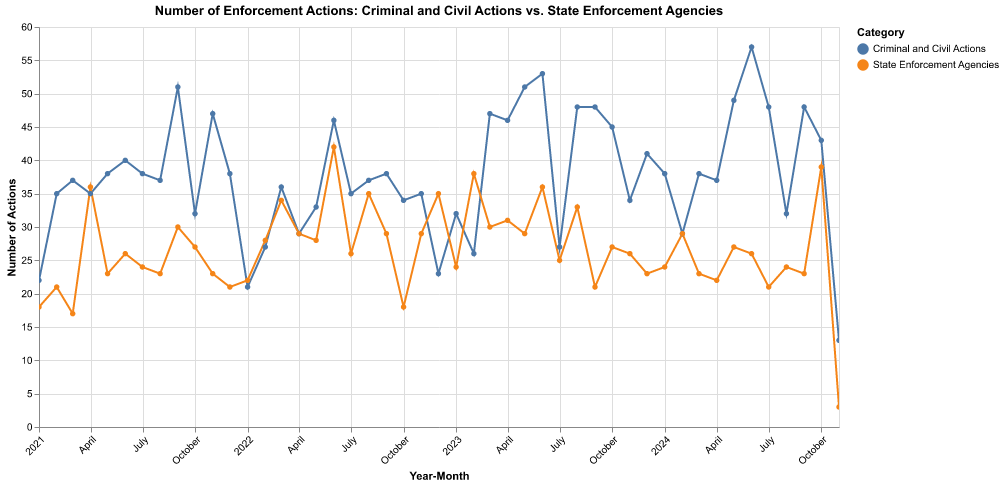

In [ ]:
file_path = "/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])
data['YearMonth'] = data['Date'].dt.to_period('M')

data['Category'] = data['Category'].apply(lambda x: 'Criminal and Civil Actions' if 'Criminal and Civil Actions' in x else 'State Enforcement Agencies')

def assign_subcategory(title):
    title_lower = title.lower()
    if 'health' in title_lower or 'medicare' in title_lower or 'medicaid' in title_lower:
        return 'Health Care Fraud'
    elif 'financial' in title_lower or 'bank' in title_lower or 'money laundering' in title_lower:
        return 'Financial Fraud'
    elif 'drug' in title_lower or 'narcotic' in title_lower:
        return 'Drug Enforcement'
    elif 'bribe' in title_lower or 'corrupt' in title_lower or 'kickback' in title_lower:
        return 'Bribery/Corruption'
    else:
        return 'Other'

data['SubCategory'] = data.apply(lambda row: assign_subcategory(row['Title']) if row['Category'] == 'Criminal and Civil Actions' else None, axis=1)

main_category_counts = data.groupby(['YearMonth', 'Category']).size().reset_index(name='Count')
main_category_counts['YearMonth'] = main_category_counts['YearMonth'].astype(str)

main_chart = alt.Chart(main_category_counts).mark_line(point=True).encode(
    alt.X('YearMonth:T', title='Year-Month', axis=alt.Axis(labelAngle=-45)),
    alt.Y('Count:Q', title='Number of Actions'),
    color='Category:N',
    tooltip=['YearMonth', 'Category', 'Count']
).properties(
    title='Number of Enforcement Actions: Criminal and Civil Actions vs. State Enforcement Agencies',
    width=800,
    height=400
).interactive()

main_chart.show()

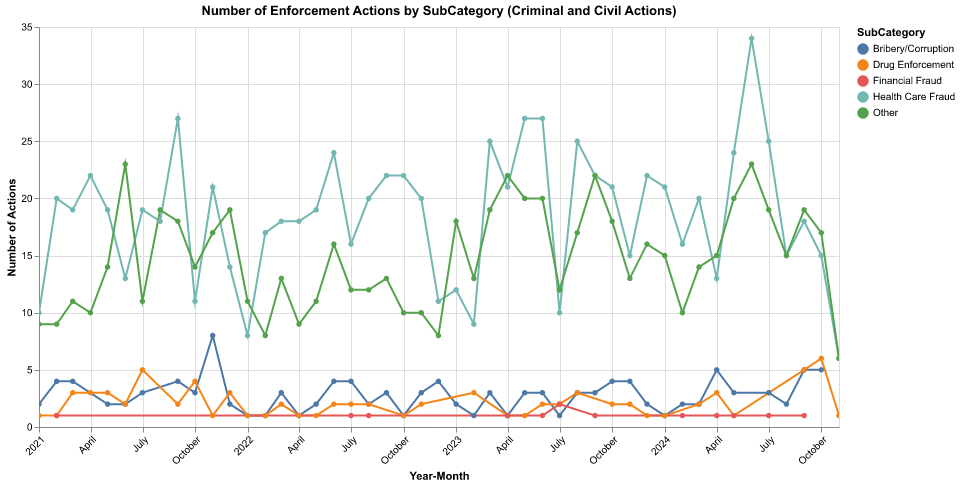

In [ ]:
subcategory_data = data[data['Category'] == 'Criminal and Civil Actions']
subcategory_counts = subcategory_data.groupby(['YearMonth', 'SubCategory']).size().reset_index(name='Count')
subcategory_counts['YearMonth'] = subcategory_counts['YearMonth'].astype(str)

subcategory_chart = alt.Chart(subcategory_counts).mark_line(point=True).encode(
    alt.X('YearMonth:T', title='Year-Month', axis=alt.Axis(labelAngle=-45)),
    alt.Y('Count:Q', title='Number of Actions'),
    color='SubCategory:N',
    tooltip=['YearMonth', 'SubCategory', 'Count']
).properties(
    title='Number of Enforcement Actions by SubCategory (Criminal and Civil Actions)',
    width=800,
    height=400
).interactive()

subcategory_chart.show()

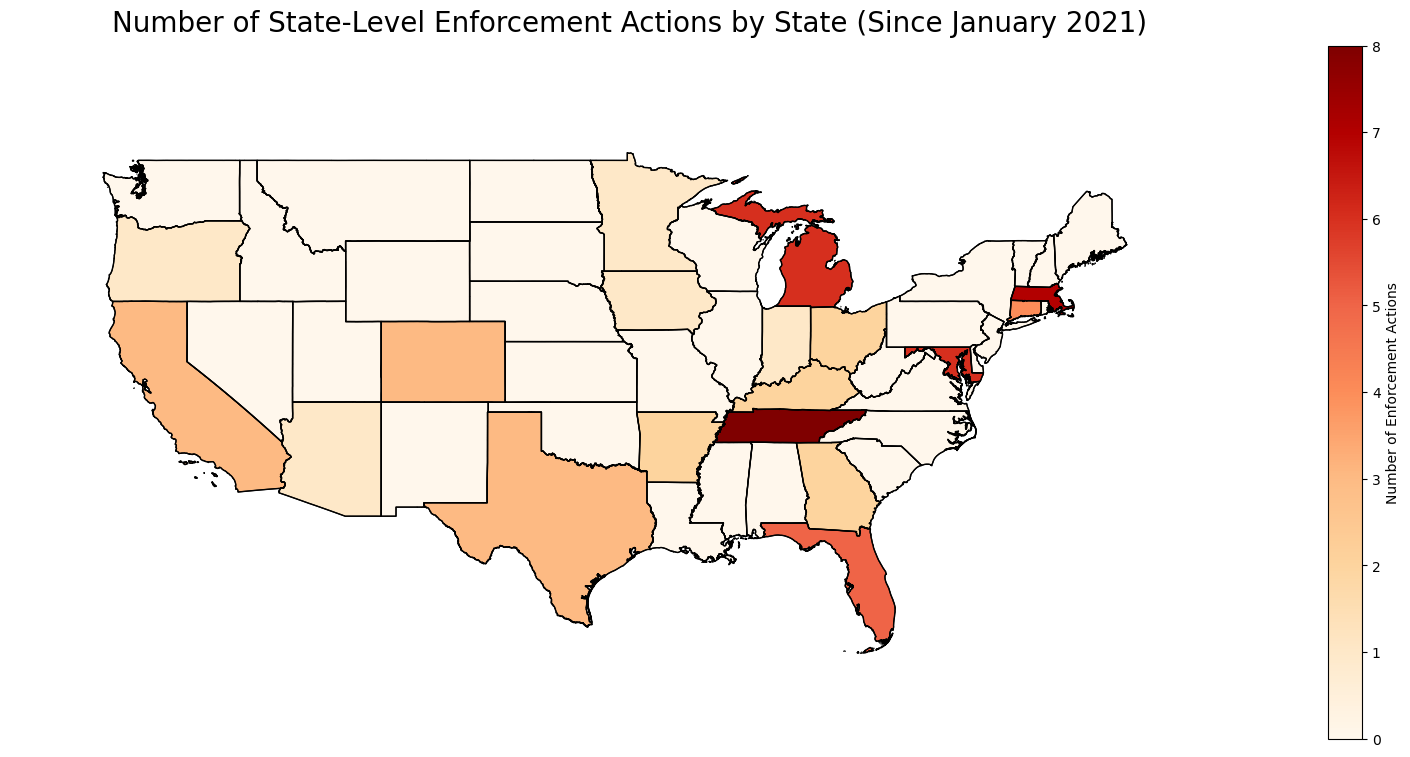

In [ ]:
state_data = data[data['Agency'].str.contains(
    'State of', na=False, case=False)]


def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None


state_data['State'] = state_data['Agency'].apply(extract_state_name)

state_data = state_data.dropna(subset=['State'])

state_data['State'] = state_data['State'].str.strip().str.title()

state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

gdf_states = gpd.read_file(
    "/Users/hahei/Desktop/problem-set-5-xy-wz/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")

gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(
    state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6,
                             })

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')

plt.show()

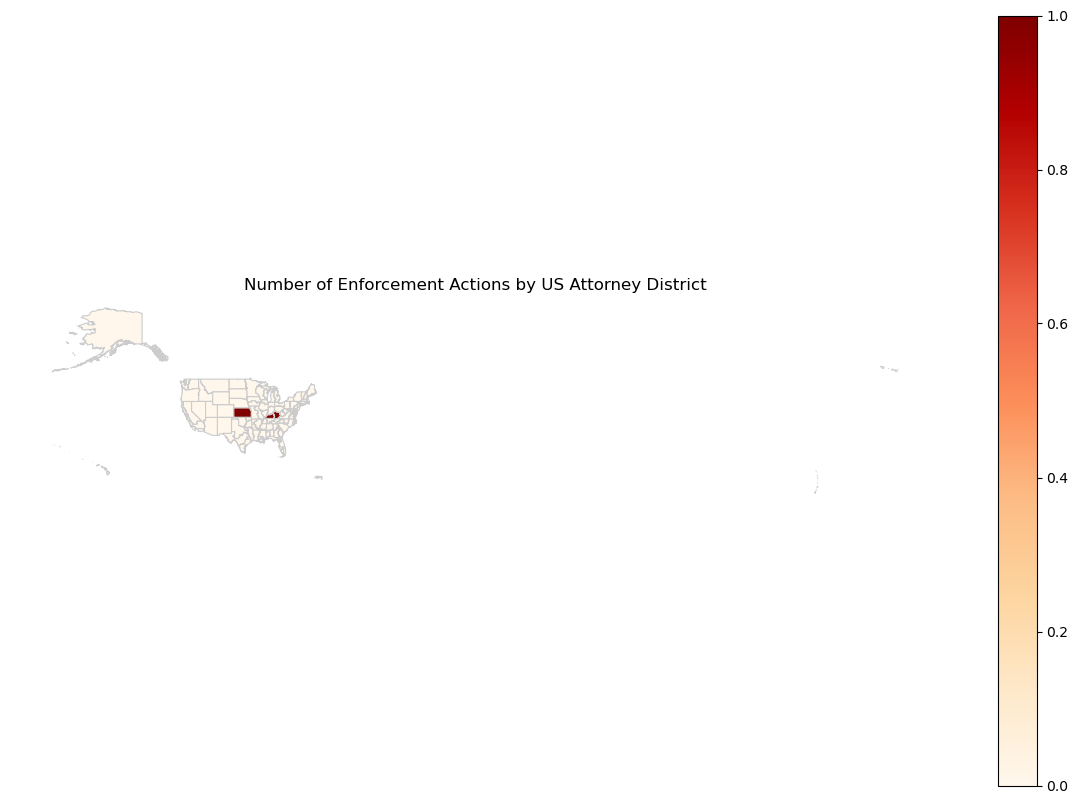

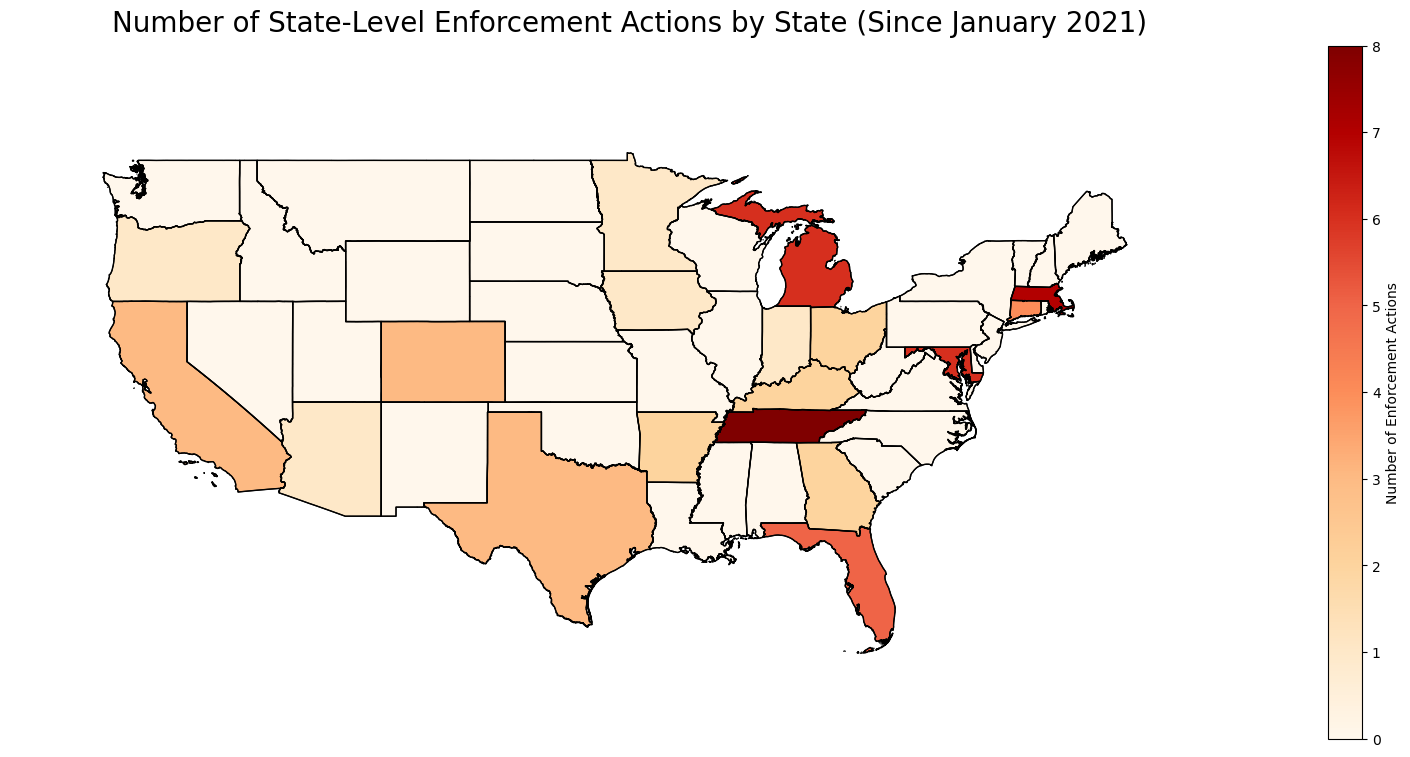

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Extract state names for state-level enforcement actions
state_data = enforcement_df[enforcement_df['Agency'].str.contains('State of', na=False, case=False)]

def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None

state_data['State'] = state_data['Agency'].apply(extract_state_name)
state_data = state_data.dropna(subset=['State'])
state_data['State'] = state_data['State'].str.strip().str.title()

# Step 4: Aggregate enforcement actions by state
state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Step 5: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 6: Fuzzy match district names to improve merging
us_districts_gdf['district'] = us_districts_gdf.iloc[:, 0].str.strip()  # 去除 shapefile 中的地区名称的多余空格

def match_district(name, choices):
    for choice in choices:
        if name.lower() in choice.lower() or choice.lower() in name.lower():
            return choice
    return None

district_choices = us_districts_gdf['district'].unique()
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']
district_counts['matched_district'] = district_counts['district'].apply(lambda x: match_district(x, district_choices))

# Remove rows with no match
district_counts = district_counts[district_counts['matched_district'].notna()]

# Step 7: Merge the shapefile with the enforcement actions count
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='matched_district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

# Step 9: Load the shapefile of US States and merge with state-level enforcement actions
gdf_states = gpd.read_file('/Users/hahei/Desktop/problem-set-5-xy-wz/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

# Step 10: Plot the choropleth for states
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6})

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')
plt.show()

Index(['statefp', 'judicial_d', 'aland', 'awater', 'state', 'chief_judg',
       'nominating', 'term_as_ch', 'shape_leng', 'shape_area', 'abbr',
       'district_n', 'shape__are', 'shape__len', 'geometry'],
      dtype='object')


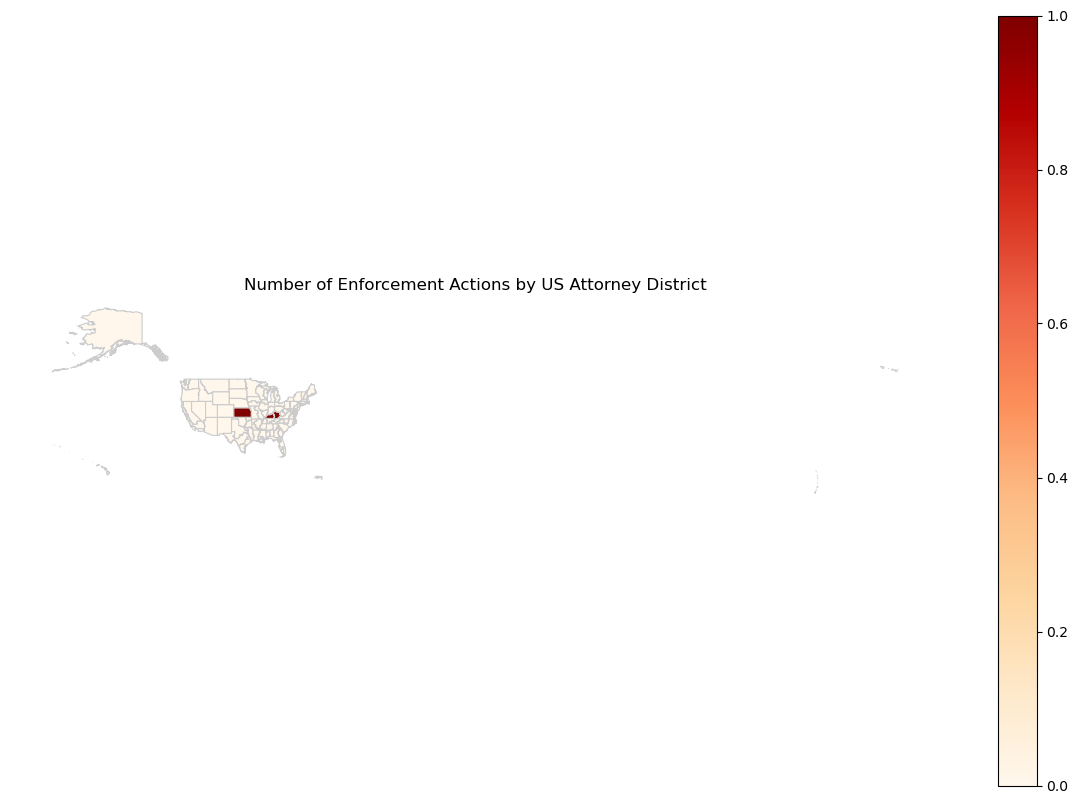

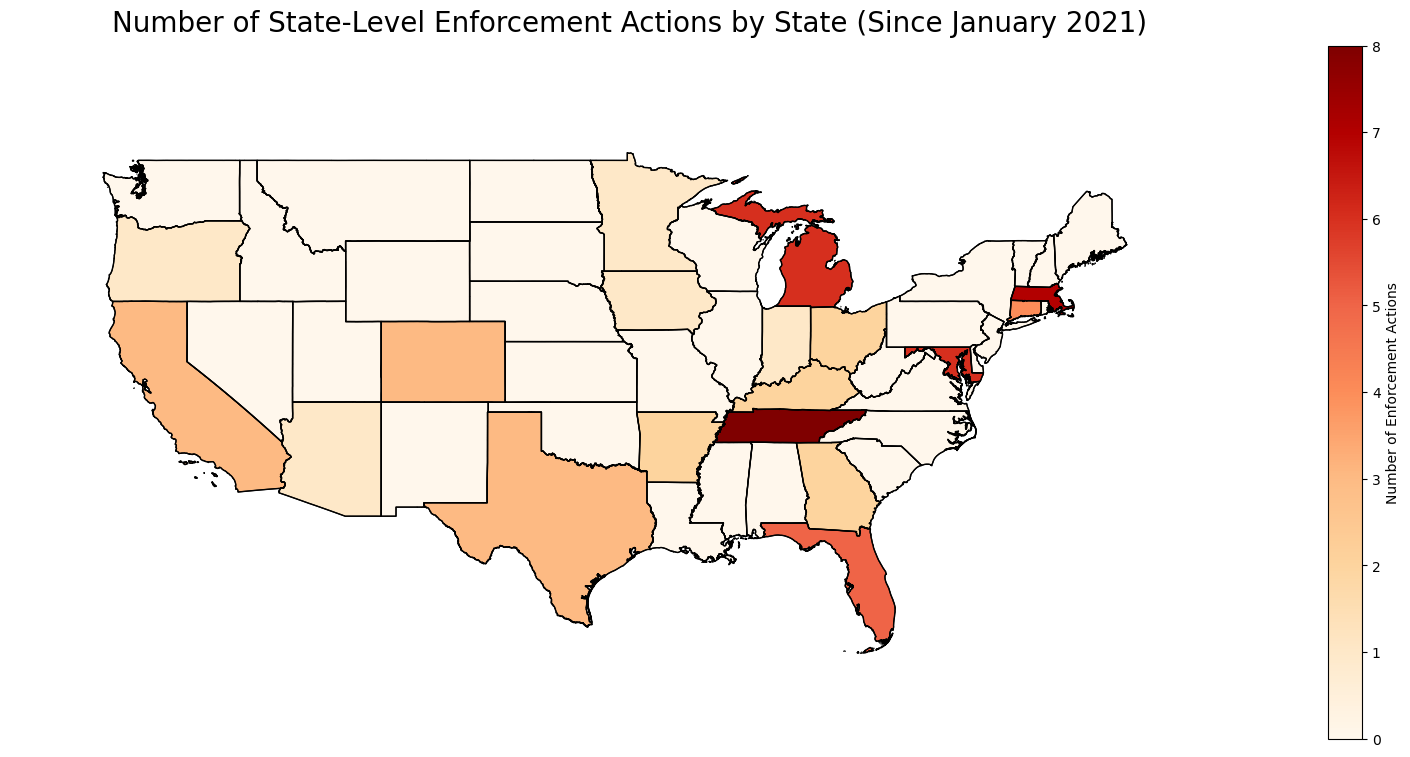

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Extract state names for state-level enforcement actions
state_data = enforcement_df[enforcement_df['Agency'].str.contains('State of', na=False, case=False)]

def extract_state_name(agency):
    parts = agency.split()
    if "State" in parts and "of" in parts:
        index = parts.index("of") + 1
        if index < len(parts):
            return parts[index]
    return None

state_data['State'] = state_data['Agency'].apply(extract_state_name)
state_data = state_data.dropna(subset=['State'])
state_data['State'] = state_data['State'].str.strip().str.title()

# Step 4: Aggregate enforcement actions by state
state_counts = state_data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Step 5: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 6: Fuzzy match district names to improve merging
print(us_districts_gdf.columns)
# Please adjust the column name based on the output to select the appropriate column representing district names
us_districts_gdf['district'] = us_districts_gdf['NAME'].str.strip() if 'NAME' in us_districts_gdf.columns else us_districts_gdf.iloc[:, 0].str.strip()  # 去除 shapefile 中的地区名称的多余空格

def match_district(name, choices):
    for choice in choices:
        if name.lower() in choice.lower() or choice.lower() in name.lower():
            return choice
    return None

district_choices = us_districts_gdf['district'].unique()
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']
district_counts['matched_district'] = district_counts['district'].apply(lambda x: match_district(x, district_choices))

# Remove rows with no match
district_counts = district_counts[district_counts['matched_district'].notna()]

# Step 7: Merge the shapefile with the enforcement actions count
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='matched_district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

# Step 9: Load the shapefile of US States and merge with state-level enforcement actions
gdf_states = gpd.read_file('/Users/hahei/Desktop/problem-set-5-xy-wz/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf_states['NAME'] = gdf_states['NAME'].str.strip().str.title()

gdf_merged = gdf_states.merge(state_counts, how='left', left_on='NAME', right_on='State')
gdf_merged['Count'] = gdf_merged['Count'].fillna(0)

# Step 10: Plot the choropleth for states
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf_merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
gdf_merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Enforcement Actions",
                             'shrink': 0.6})

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

plt.title('Number of State-Level Enforcement Actions by State (Since January 2021)', fontsize=20)
plt.axis('off')
plt.show()

Index(['statefp', 'judicial_d', 'aland', 'awater', 'state', 'chief_judg',
       'nominating', 'term_as_ch', 'shape_leng', 'shape_area', 'abbr',
       'district_n', 'shape__are', 'shape__len', 'geometry'],
      dtype='object')


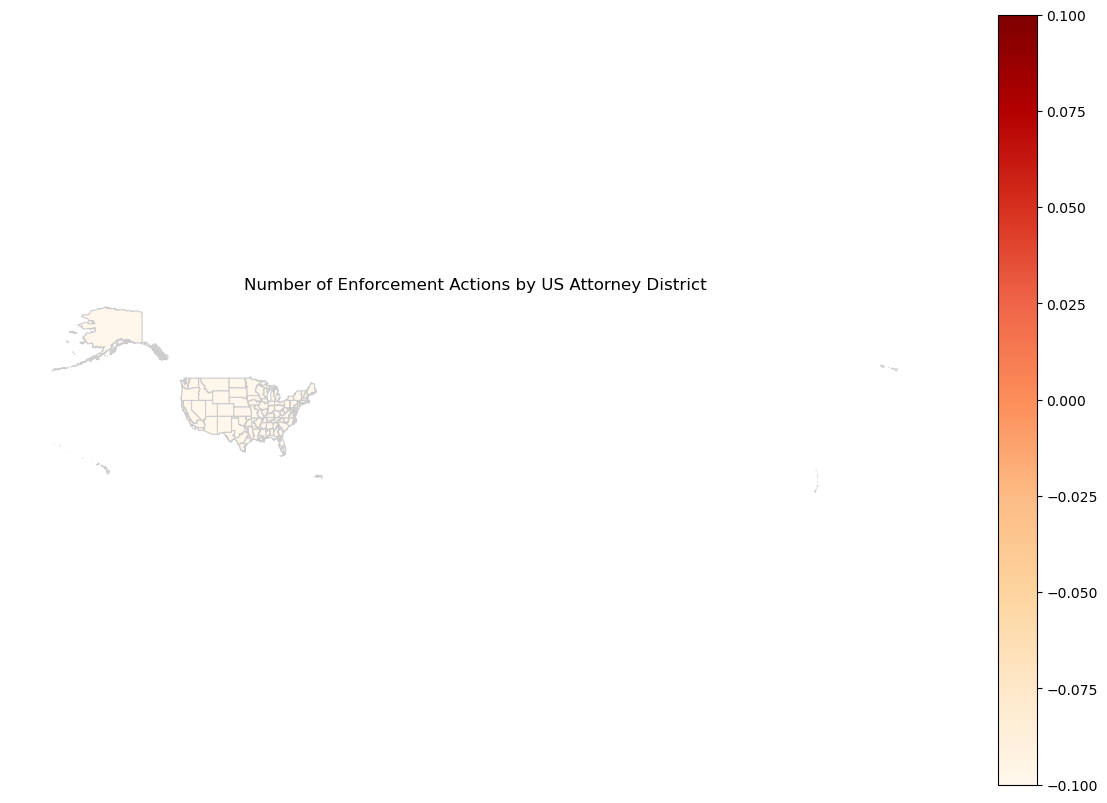

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Identify the appropriate column representing district names
print(us_districts_gdf.columns)

# Step 6: Merge the enforcement actions with district-level shapefile
# Adjust the column name based on the output to select the appropriate column representing district names
us_districts_gdf['district'] = us_districts_gdf['district_name_column'].str.strip() if 'district_name_column' in us_districts_gdf.columns else us_districts_gdf.iloc[:, 0].str.strip()  # 请替换 'district_name_column' 为实际列名

# Step 7: Merge shapefile with enforcement actions data
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

Index(['statefp', 'judicial_d', 'aland', 'awater', 'state', 'chief_judg',
       'nominating', 'term_as_ch', 'shape_leng', 'shape_area', 'abbr',
       'district_n', 'shape__are', 'shape__len', 'geometry'],
      dtype='object')


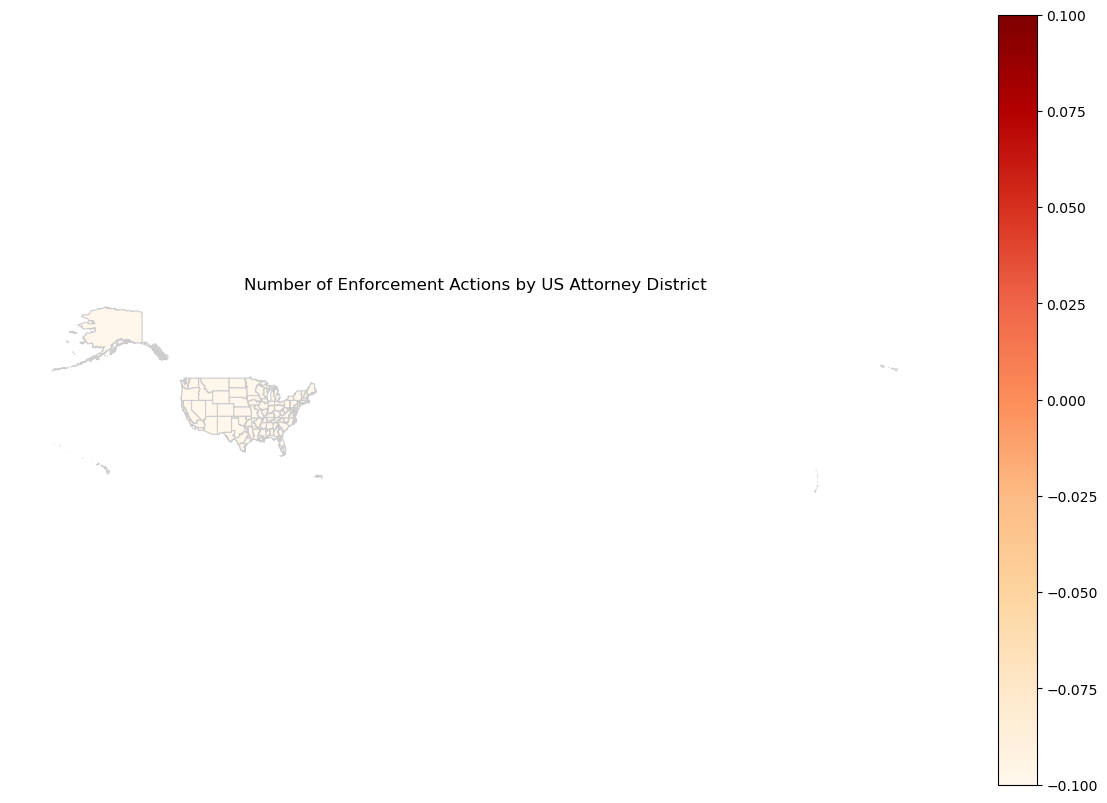

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Identify the appropriate column representing district names
print(us_districts_gdf.columns)

# Step 6: Merge the enforcement actions with district-level shapefile
# Adjust the column name based on the output to select the appropriate column representing district names
us_districts_gdf['district'] = us_districts_gdf['district_n'].str.strip()  # 请替换 'district_name_column' 为实际列名

# Step 7: Merge shapefile with enforcement actions data
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0

# Step 8: Plot the choropleth for districts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

Shapefile columns: Index(['statefp', 'judicial_d', 'aland', 'awater', 'state', 'chief_judg',
       'nominating', 'term_as_ch', 'shape_leng', 'shape_area', 'abbr',
       'district_n', 'shape__are', 'shape__len', 'geometry'],
      dtype='object')
First few rows of shapefile:
  statefp                    judicial_d         aland        awater     state  \
0      21  Western District of Kentucky  4.970555e+10  1.651516e+09  Kentucky   
1      21  Eastern District of Kentucky  5.257394e+10  7.238213e+08  Kentucky   
2      18  Southern District of Indiana  5.824517e+10  5.941176e+08   Indiana   
3      01    Middle District of Alabama  3.412673e+10  5.472423e+08   Alabama   
4      01  Southern District of Alabama  6.235882e+10  3.052681e+09   Alabama   

            chief_judg          nominating  term_as_ch  shape_leng  \
0      Greg N. Stivers    Barack Obama (D)      2018.0   16.200585   
1         Danny Reeves  George W. Bush (R)      2019.0   13.514251   
2  Jane Magnus-Stinson    

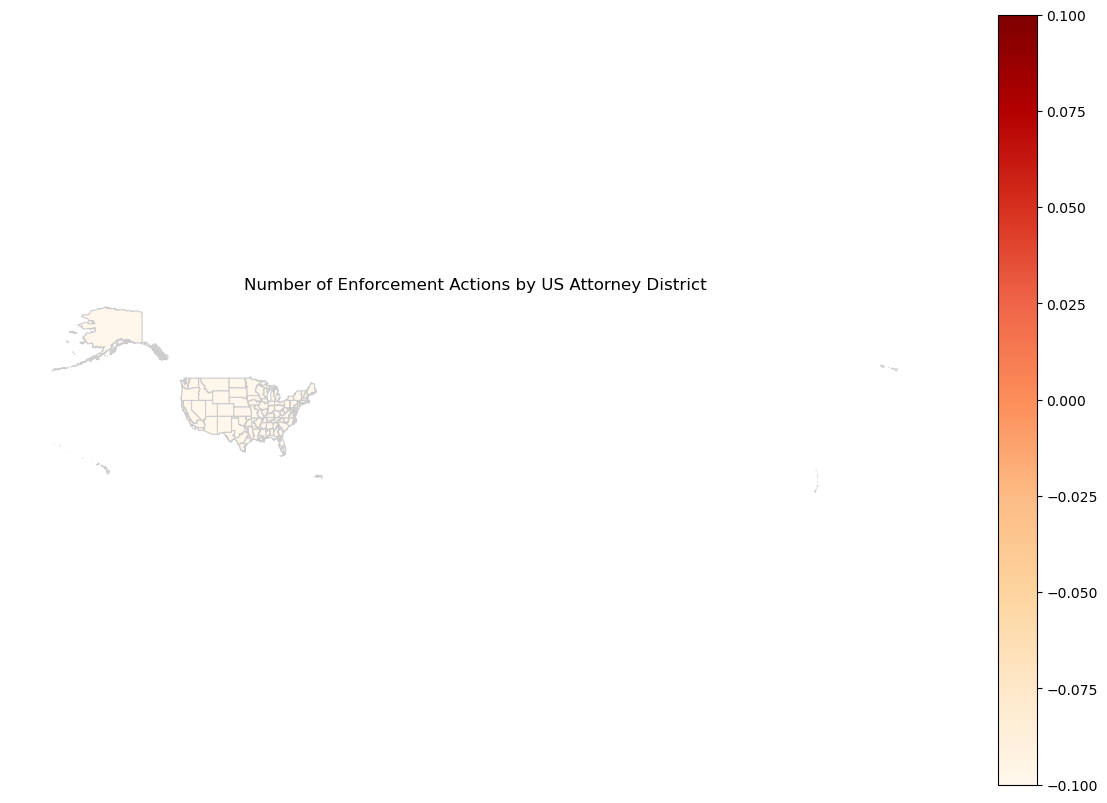

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Identify the appropriate column representing district names
print("Shapefile columns:", us_districts_gdf.columns)
print("First few rows of shapefile:")
print(us_districts_gdf.head())

# Step 6: Merge the enforcement actions with district-level shapefile
# Adjust the column name based on the output to select the appropriate column representing district names
us_districts_gdf['district'] = us_districts_gdf['district_n'].str.strip()  # 请替换 'district_name_column' 为实际列名

# Step 7: Merge shapefile with enforcement actions data
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

# Step 8: Print merged data to verify merging success
print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

# Step 9: Plot the choropleth for districts
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

Shapefile columns: Index(['statefp', 'judicial_d', 'aland', 'awater', 'state', 'chief_judg',
       'nominating', 'term_as_ch', 'shape_leng', 'shape_area', 'abbr',
       'district_n', 'shape__are', 'shape__len', 'geometry'],
      dtype='object')
First few rows of shapefile:
  statefp                    judicial_d         aland        awater     state  \
0      21  Western District of Kentucky  4.970555e+10  1.651516e+09  Kentucky   
1      21  Eastern District of Kentucky  5.257394e+10  7.238213e+08  Kentucky   
2      18  Southern District of Indiana  5.824517e+10  5.941176e+08   Indiana   
3      01    Middle District of Alabama  3.412673e+10  5.472423e+08   Alabama   
4      01  Southern District of Alabama  6.235882e+10  3.052681e+09   Alabama   

            chief_judg          nominating  term_as_ch  shape_leng  \
0      Greg N. Stivers    Barack Obama (D)      2018.0   16.200585   
1         Danny Reeves  George W. Bush (R)      2019.0   13.514251   
2  Jane Magnus-Stinson    

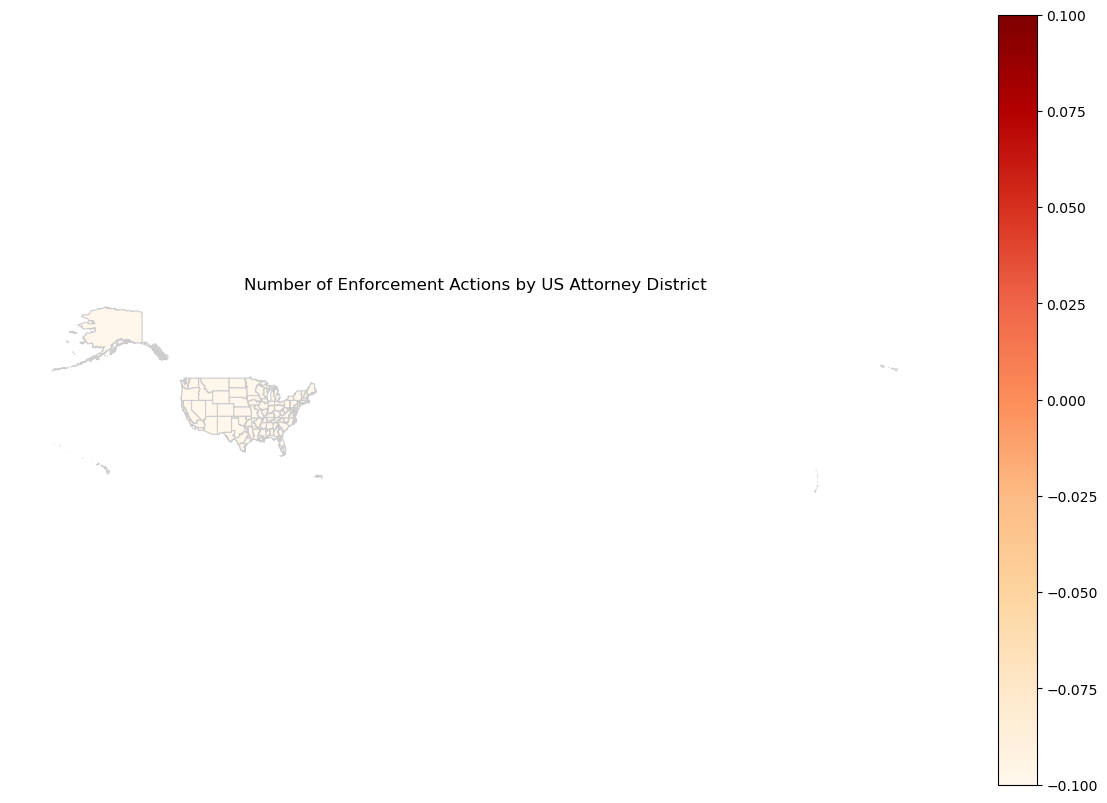

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip()
    return name.strip()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Identify the appropriate column representing district names
print("Shapefile columns:", us_districts_gdf.columns)
print("First few rows of shapefile:")
print(us_districts_gdf.head())

# Step 6: Merge the enforcement actions with district-level shapefile
# Adjust the column name based on the output to select the appropriate column representing district names
us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.strip()  # 请替换 'district_name_column' 为实际列名

# Step 7: Merge shapefile with enforcement actions data
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

# Step 8: Print merged data to verify merging success
print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

# Step 9: Plot the choropleth for districts
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
                       district  count
0  western district of kentucky    NaN
1  eastern district of kentucky    NaN
2  southern district of indiana    NaN
3    middle district of alabama    NaN
4  southern district of alabama    NaN
Unmatched districts:
                                      district  count
0                   u.s. department of justice    337
1               massachusetts attorney general     74
2                     florida attorney general     60
3              south carolina attorney general     54
4                   tennessee attorney general     44
..                                         ...    ...
298                            state of oregon      1
299        u.s. attorney’s office rhode island      1
300  u.s. attorney’s office eastern washington      1
301   u.s. attorney's office, western arkansas      1
302  u.s. attorney's office, western wisconsin      1

[303 rows x 2 columns]


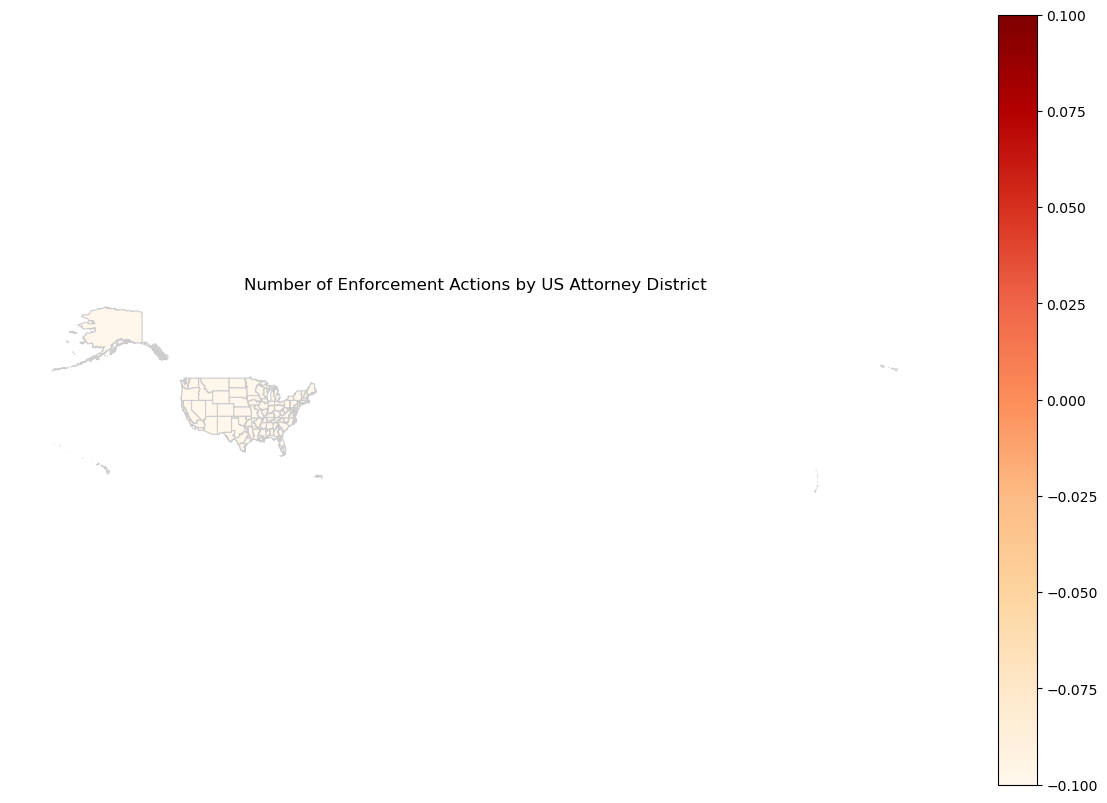

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District of ', '').strip().lower()
    elif 'District' in name:
        return name.replace('U.S. Attorney Office for the ', '').replace('District ', '').strip().lower()
    return name.strip().lower()

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Standardize district names in shapefile
us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.strip().str.lower()

# Step 6: Merge the enforcement actions with district-level shapefile
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

# Step 7: Print merged data to verify merging success
print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

# Step 8: Identify districts that were not matched
unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

# Step 9: Plot the choropleth for districts
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                      district  count
0                        texas    103
1                 pennsylvania    100
2                     new york     97
4                      florida     83
5                   california     77
8               north carolina     48
9                     missouri     47
10                    michigan     42
11                     georgia     41
12                    illinois     40
14                    virginia     37
15                   tennessee     35
16                  washington     34
17                   louisiana     33
18                    kentucky     28
19                        ohio     28
22                        iowa     21
23                     alabama     19
25                    oklahoma     14
27               w

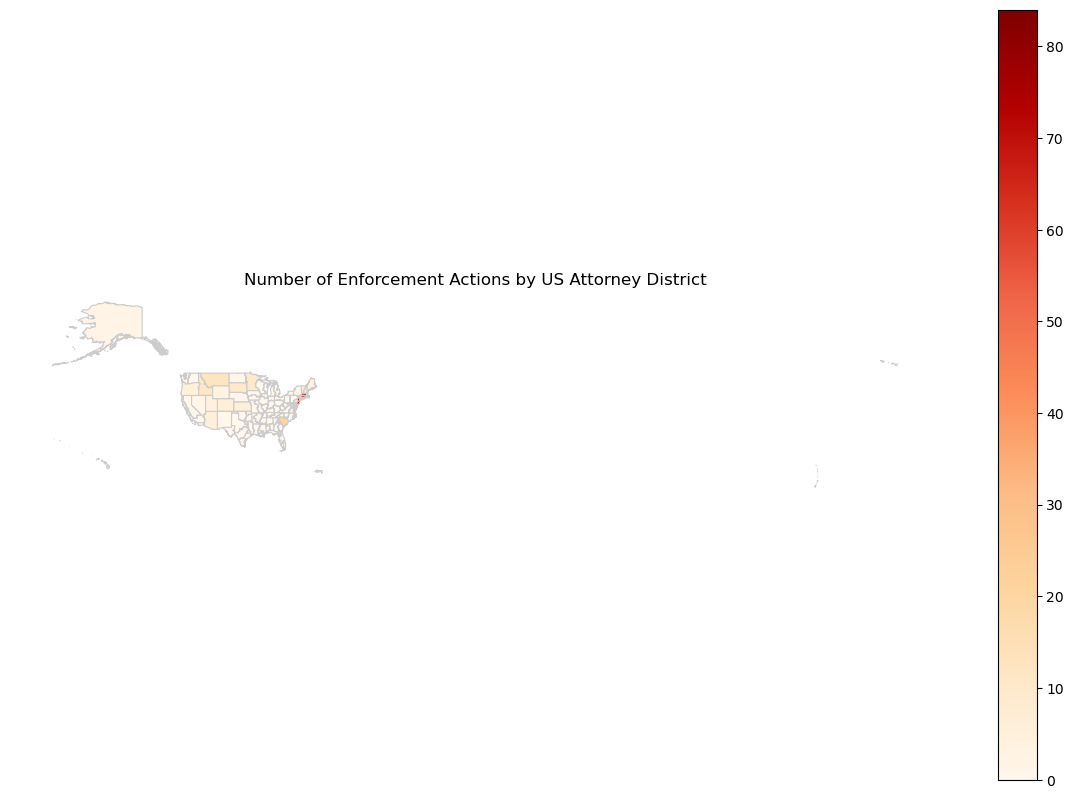

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    return None

# Only keep rows related to US Attorney District-level agencies
enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Standardize district names in shapefile
us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

# Step 6: Merge the enforcement actions with district-level shapefile
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

# Step 7: Print merged data to verify merging success
print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

# Step 8: Identify districts that were not matched
unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

# Step 9: Plot the choropleth for districts
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
1                       pennsylvania  100.0
3     massachusetts attorney general   74.0
6           florida attorney general   60.0
7    south carolina attorney general   54.0
..                               ...    ...
102  massachusetts  attorney general    1.0
103        nebraska attorney general    1.0
105         arizona attorney general    1.0
106                      idaho boise    1.0
107         hawai’i attorney general    1.0

[80 rows x 2 columns]


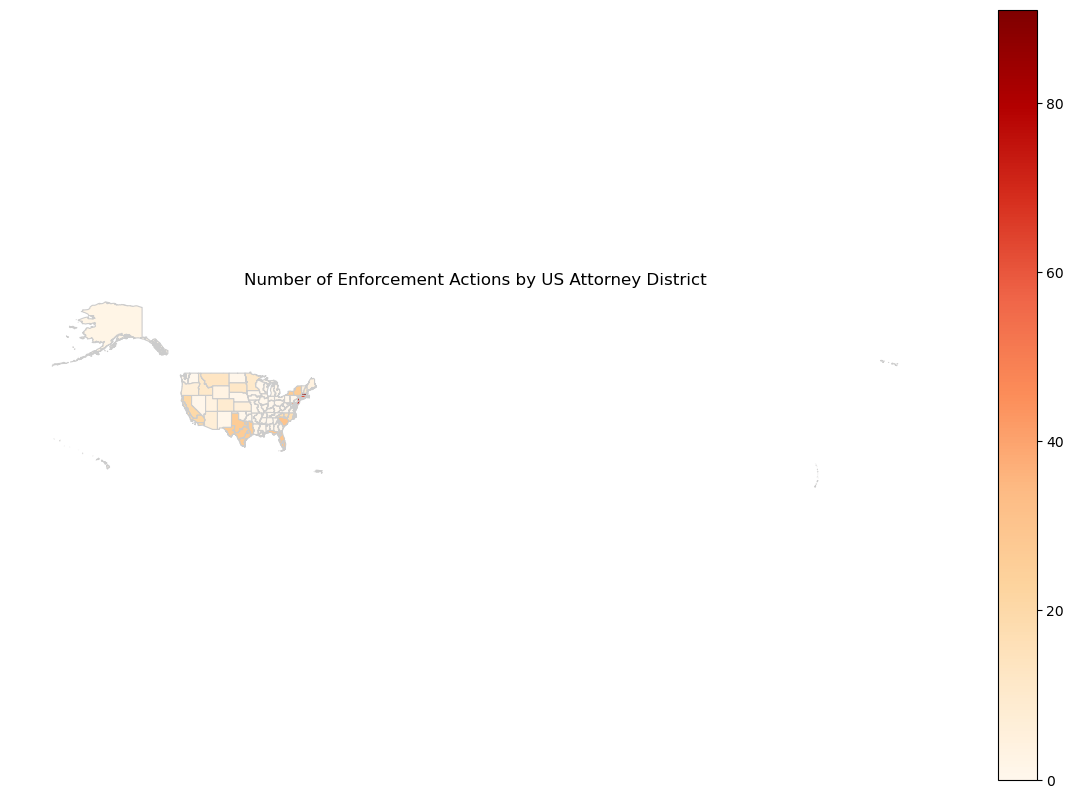

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:  # For state-level agencies
        return name.split('State of ')[-1].strip().lower()
    return None

# Only keep rows related to US Attorney District-level agencies
enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Standardize district names in shapefile
us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

# Step 6: Mapping state names to multiple districts
state_to_districts = {
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
    # Add more mappings as needed
}

expanded_district_counts = pd.DataFrame()
for state, districts in state_to_districts.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

# Add the expanded district counts to the original district counts, excluding the original state-level rows
district_counts = pd.concat([district_counts[~district_counts['district'].isin(state_to_districts.keys())], expanded_district_counts], ignore_index=True)

# Step 7: Merge the enforcement actions with district-level shapefile
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

# Step 8: Print merged data to verify merging success
print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

# Step 9: Identify districts that were not matched
unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

# Step 10: Plot the choropleth for districts
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
1                       pennsylvania  100.0
3     massachusetts attorney general   74.0
6           florida attorney general   60.0
7    south carolina attorney general   54.0
..                               ...    ...
102  massachusetts  attorney general    1.0
103        nebraska attorney general    1.0
105         arizona attorney general    1.0
106                      idaho boise    1.0
107         hawai’i attorney general    1.0

[80 rows x 2 columns]


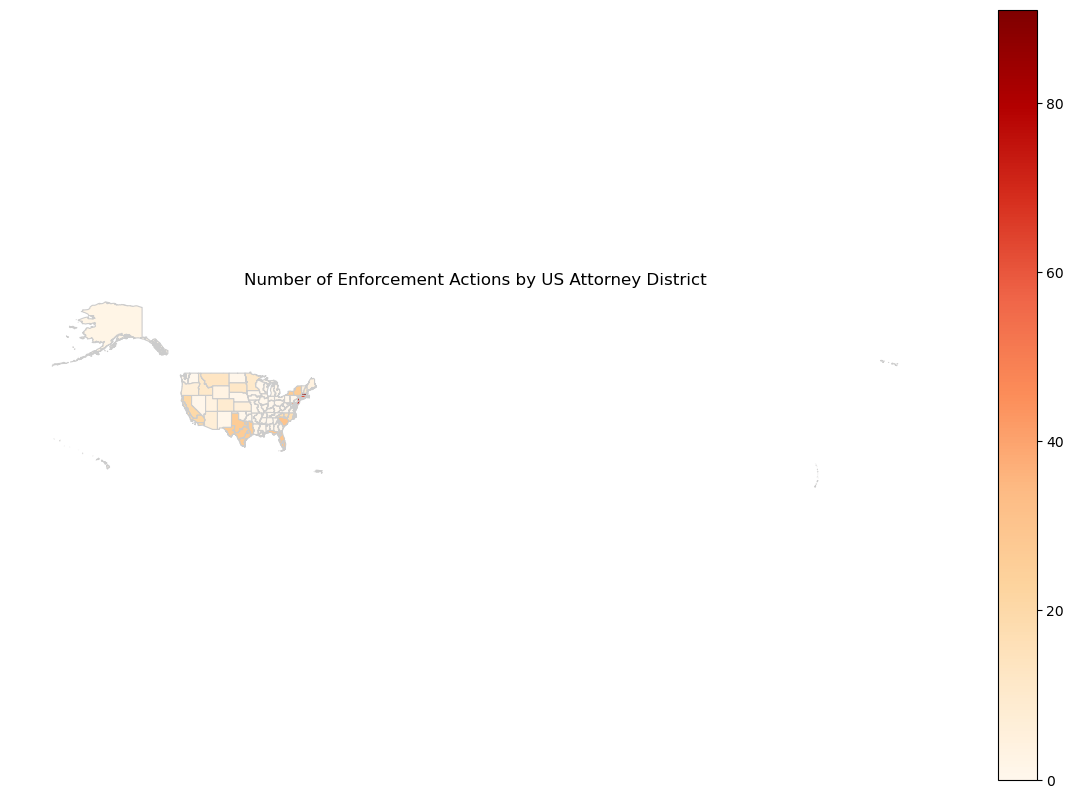

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:  # For state-level agencies
        return name.split('State of ')[-1].strip().lower()
    return None

# Only keep rows related to US Attorney District-level agencies
enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Standardize district names in shapefile
us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

# Step 6: Mapping state names to multiple districts
state_to_districts = {
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
    # Add more mappings as needed
}

expanded_district_counts = pd.DataFrame()
for state, districts in state_to_districts.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

# Add the expanded district counts to the original district counts, excluding the original state-level rows
district_counts = pd.concat([district_counts[~district_counts['district'].isin(state_to_districts.keys())], expanded_district_counts], ignore_index=True)

# Step 7: Merge the enforcement actions with district-level shapefile
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

# Step 8: Print merged data to verify merging success
print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

# Step 9: Identify districts that were not matched
unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

# Step 10: Plot the choropleth for districts
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
1                       pennsylvania  100.0
3     massachusetts attorney general   74.0
6           florida attorney general   60.0
7    south carolina attorney general   54.0
..                               ...    ...
102  massachusetts  attorney general    1.0
103        nebraska attorney general    1.0
105         arizona attorney general    1.0
106                      idaho boise    1.0
107         hawai’i attorney general    1.0

[80 rows x 2 columns]


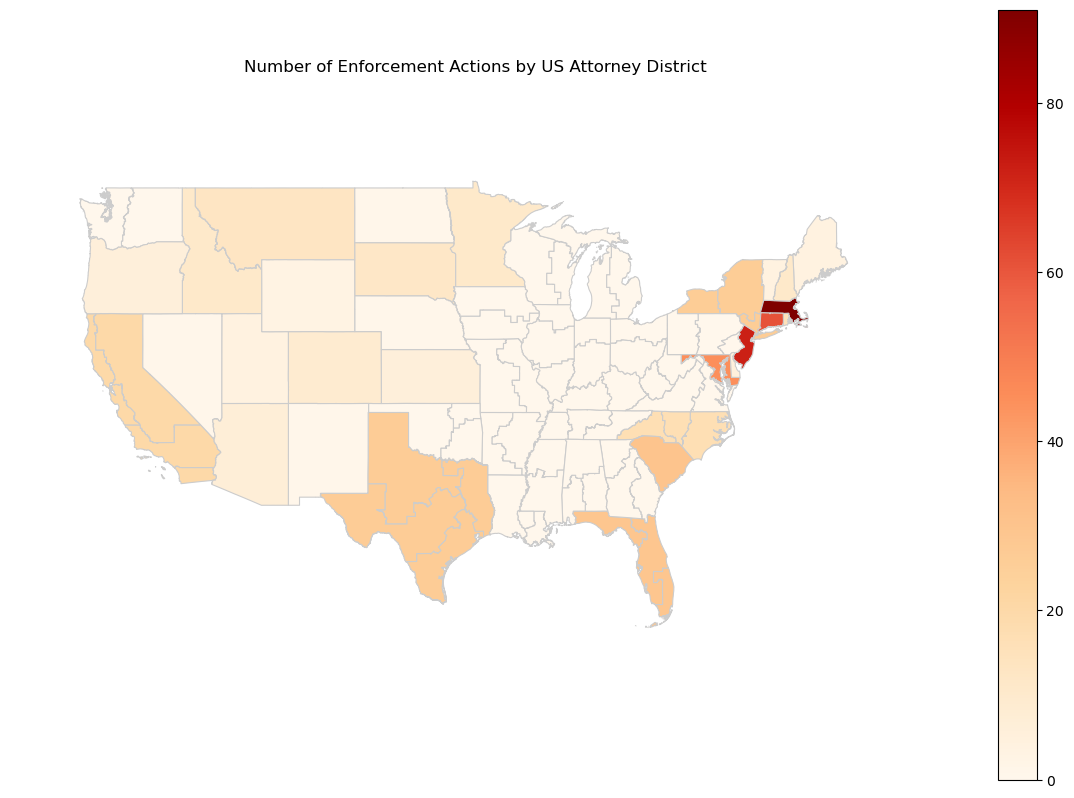

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load enforcement actions data
enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'  # 使用上传的执法行动数据文件
enforcement_df = pd.read_csv(enforcement_data_path)

# Step 2: Clean district names in enforcement data
def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:  # For state-level agencies
        return name.split('State of ')[-1].strip().lower()
    return None

# Only keep rows related to US Attorney District-level agencies
enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

# Step 3: Aggregate enforcement actions by district
district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

# Step 4: Load the shapefile of US Attorney Districts
shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'  # 使用上传的 shapefile 文件
us_districts_gdf = gpd.read_file(shapefile_path)

# Step 5: Standardize district names in shapefile
us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

# Step 6: Mapping state names to multiple districts
state_to_districts = {
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
    # Add more mappings as needed
}

expanded_district_counts = pd.DataFrame()
for state, districts in state_to_districts.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

# Add the expanded district counts to the original district counts, excluding the original state-level rows
district_counts = pd.concat([district_counts[~district_counts['district'].isin(state_to_districts.keys())], expanded_district_counts], ignore_index=True)

# Step 7: Merge the enforcement actions with district-level shapefile
merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

# Step 8: Print merged data to verify merging success
print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

# Step 9: Identify districts that were not matched
unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

# Step 10: Plot the choropleth for districts
merged_gdf['count'] = merged_gdf['count'].fillna(0)  # 将没有匹配的地区的执法行动数量设为 0
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')


ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


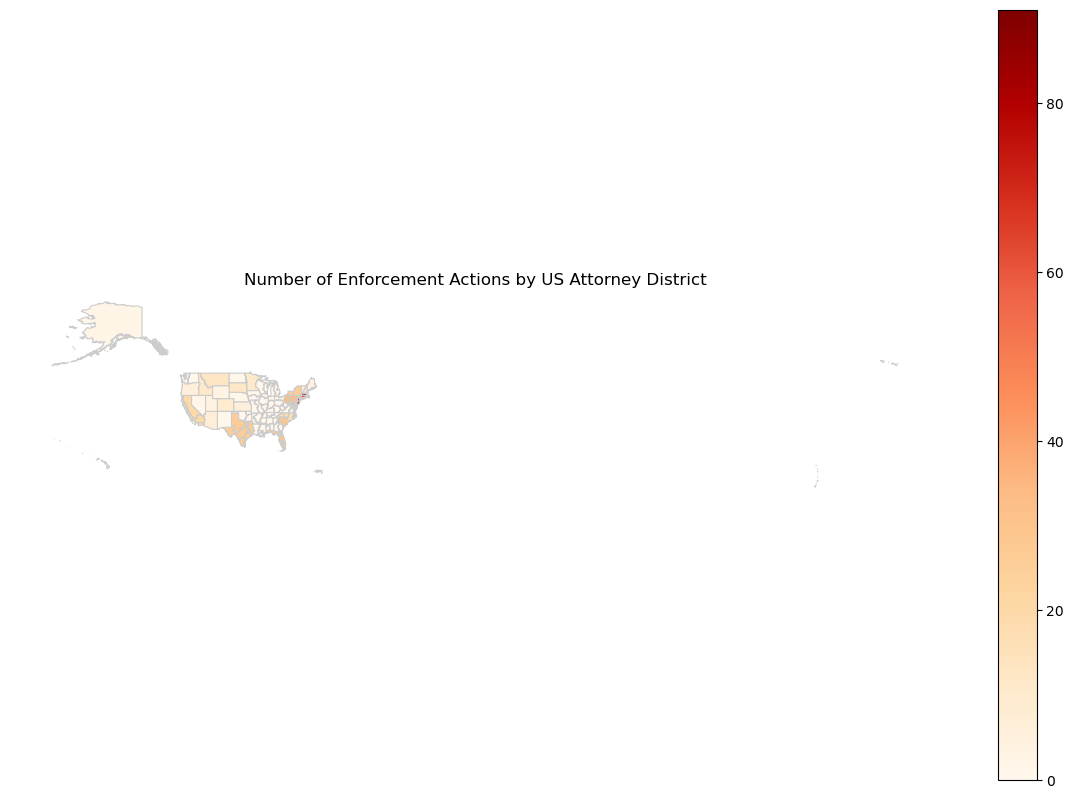

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


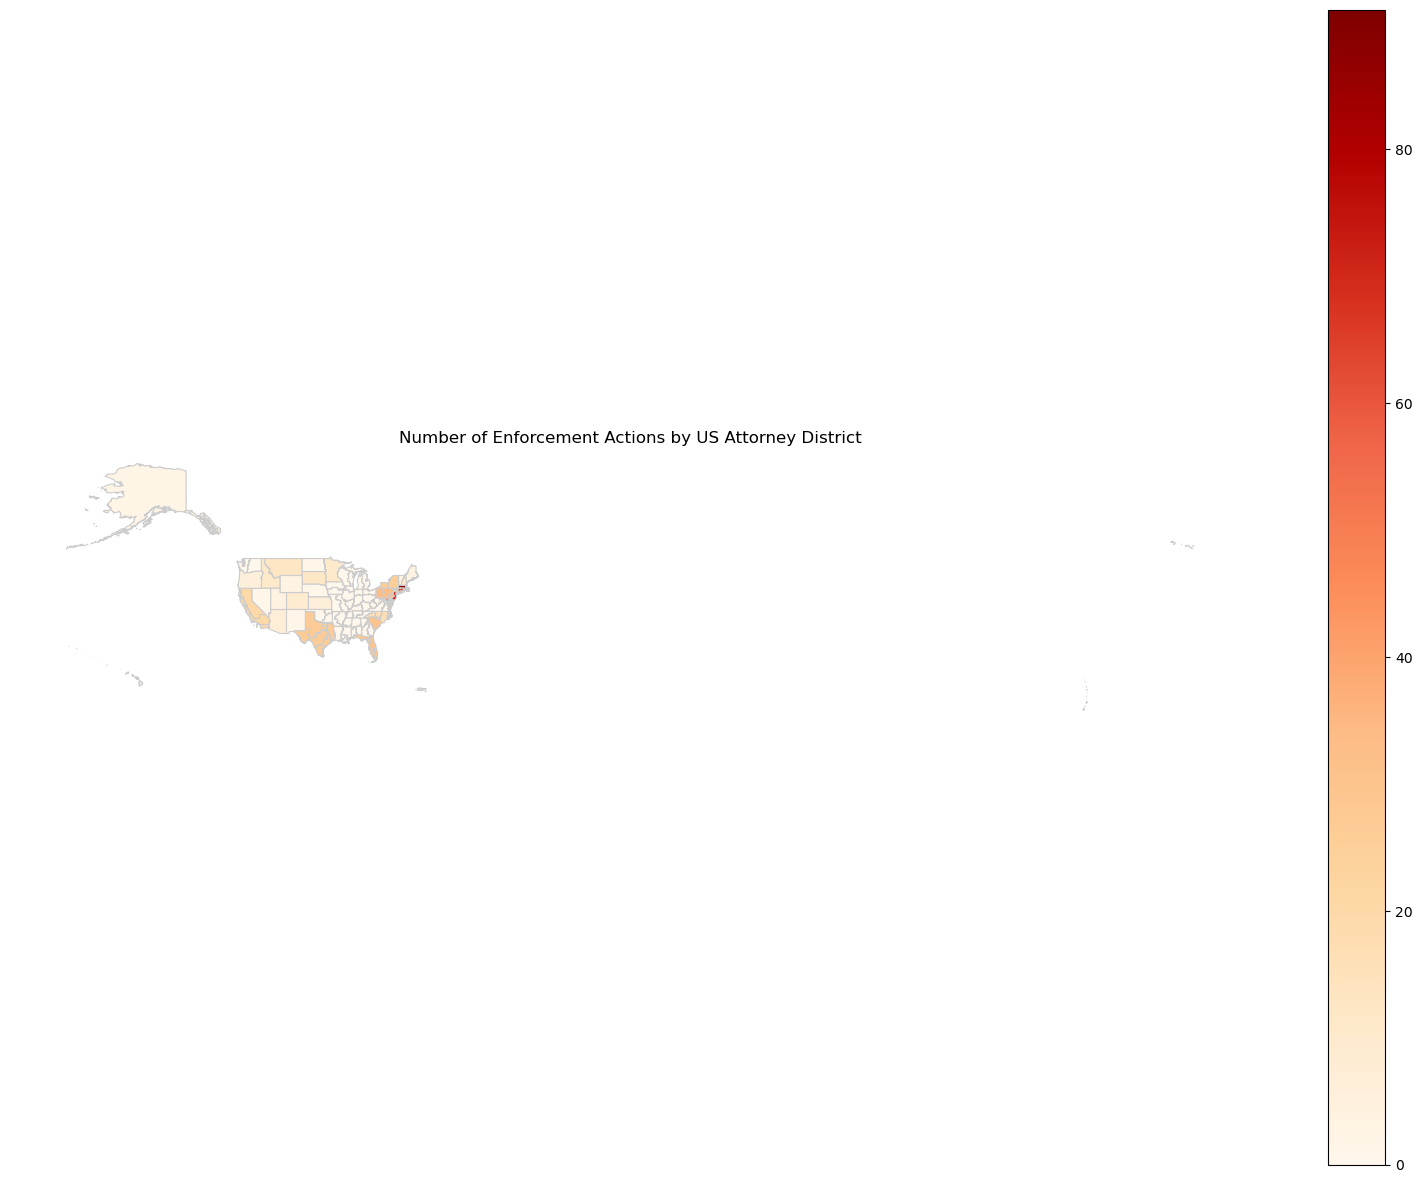

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(150, 200))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


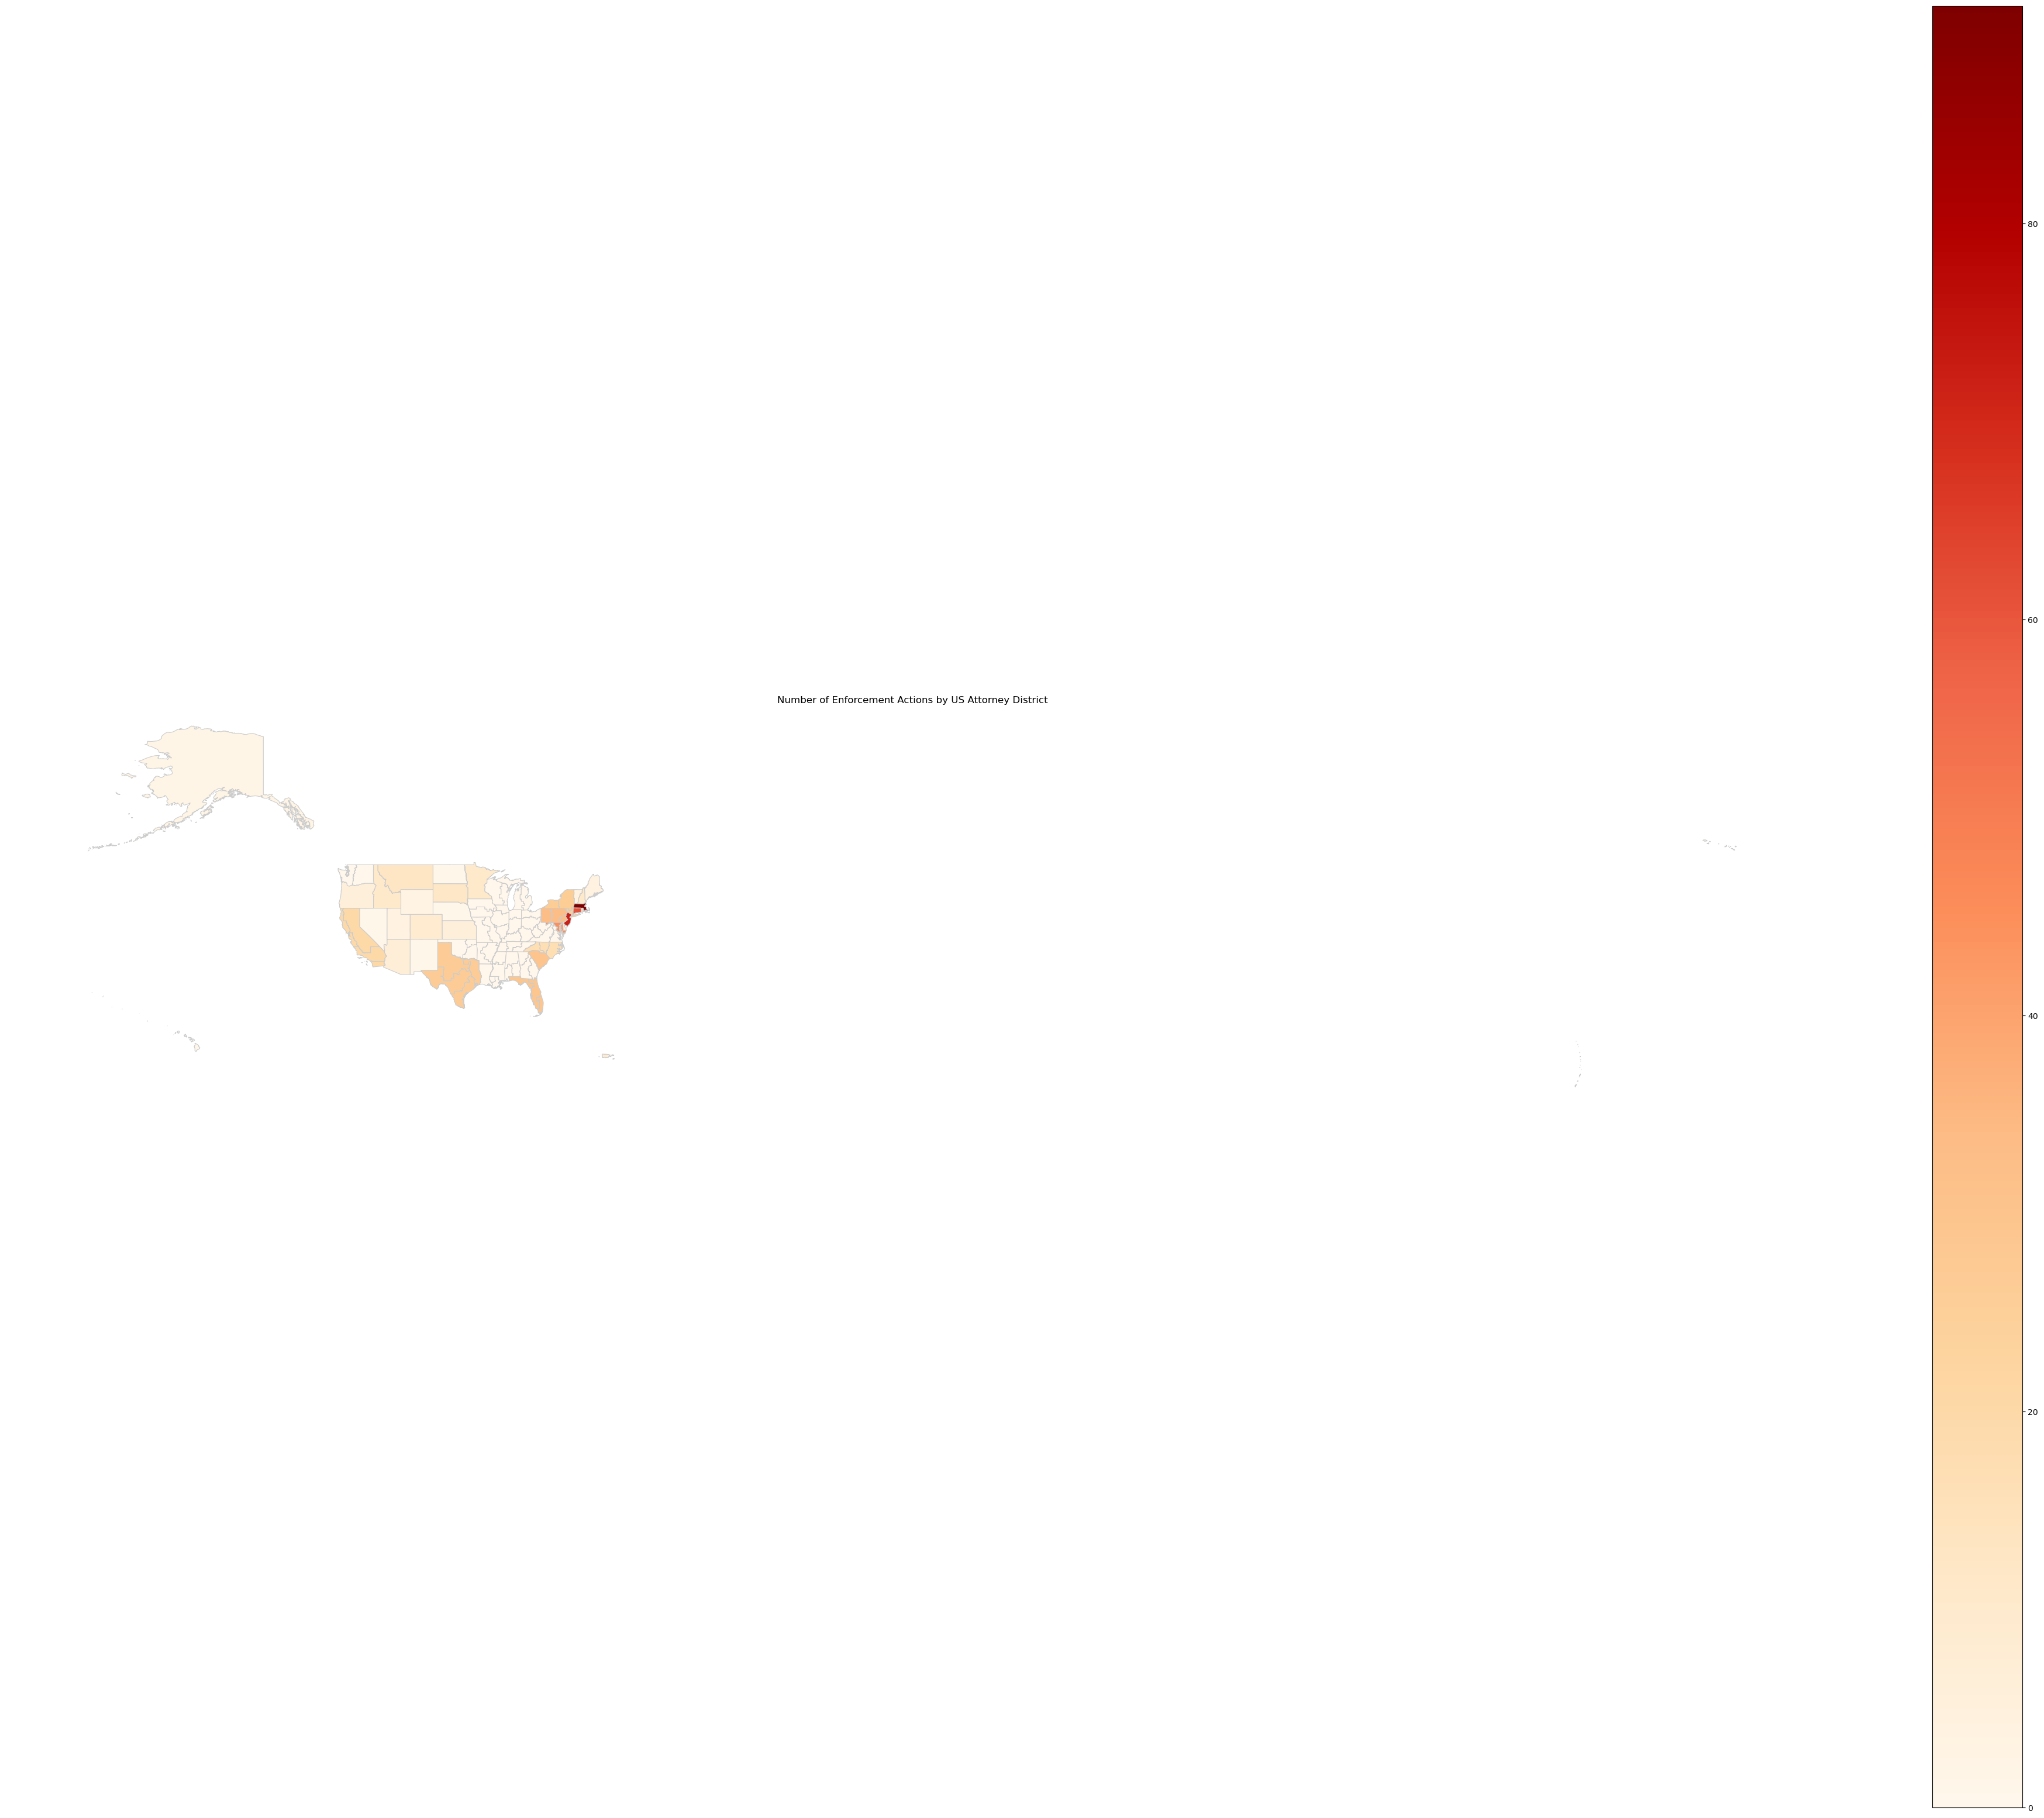

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(50, 40))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


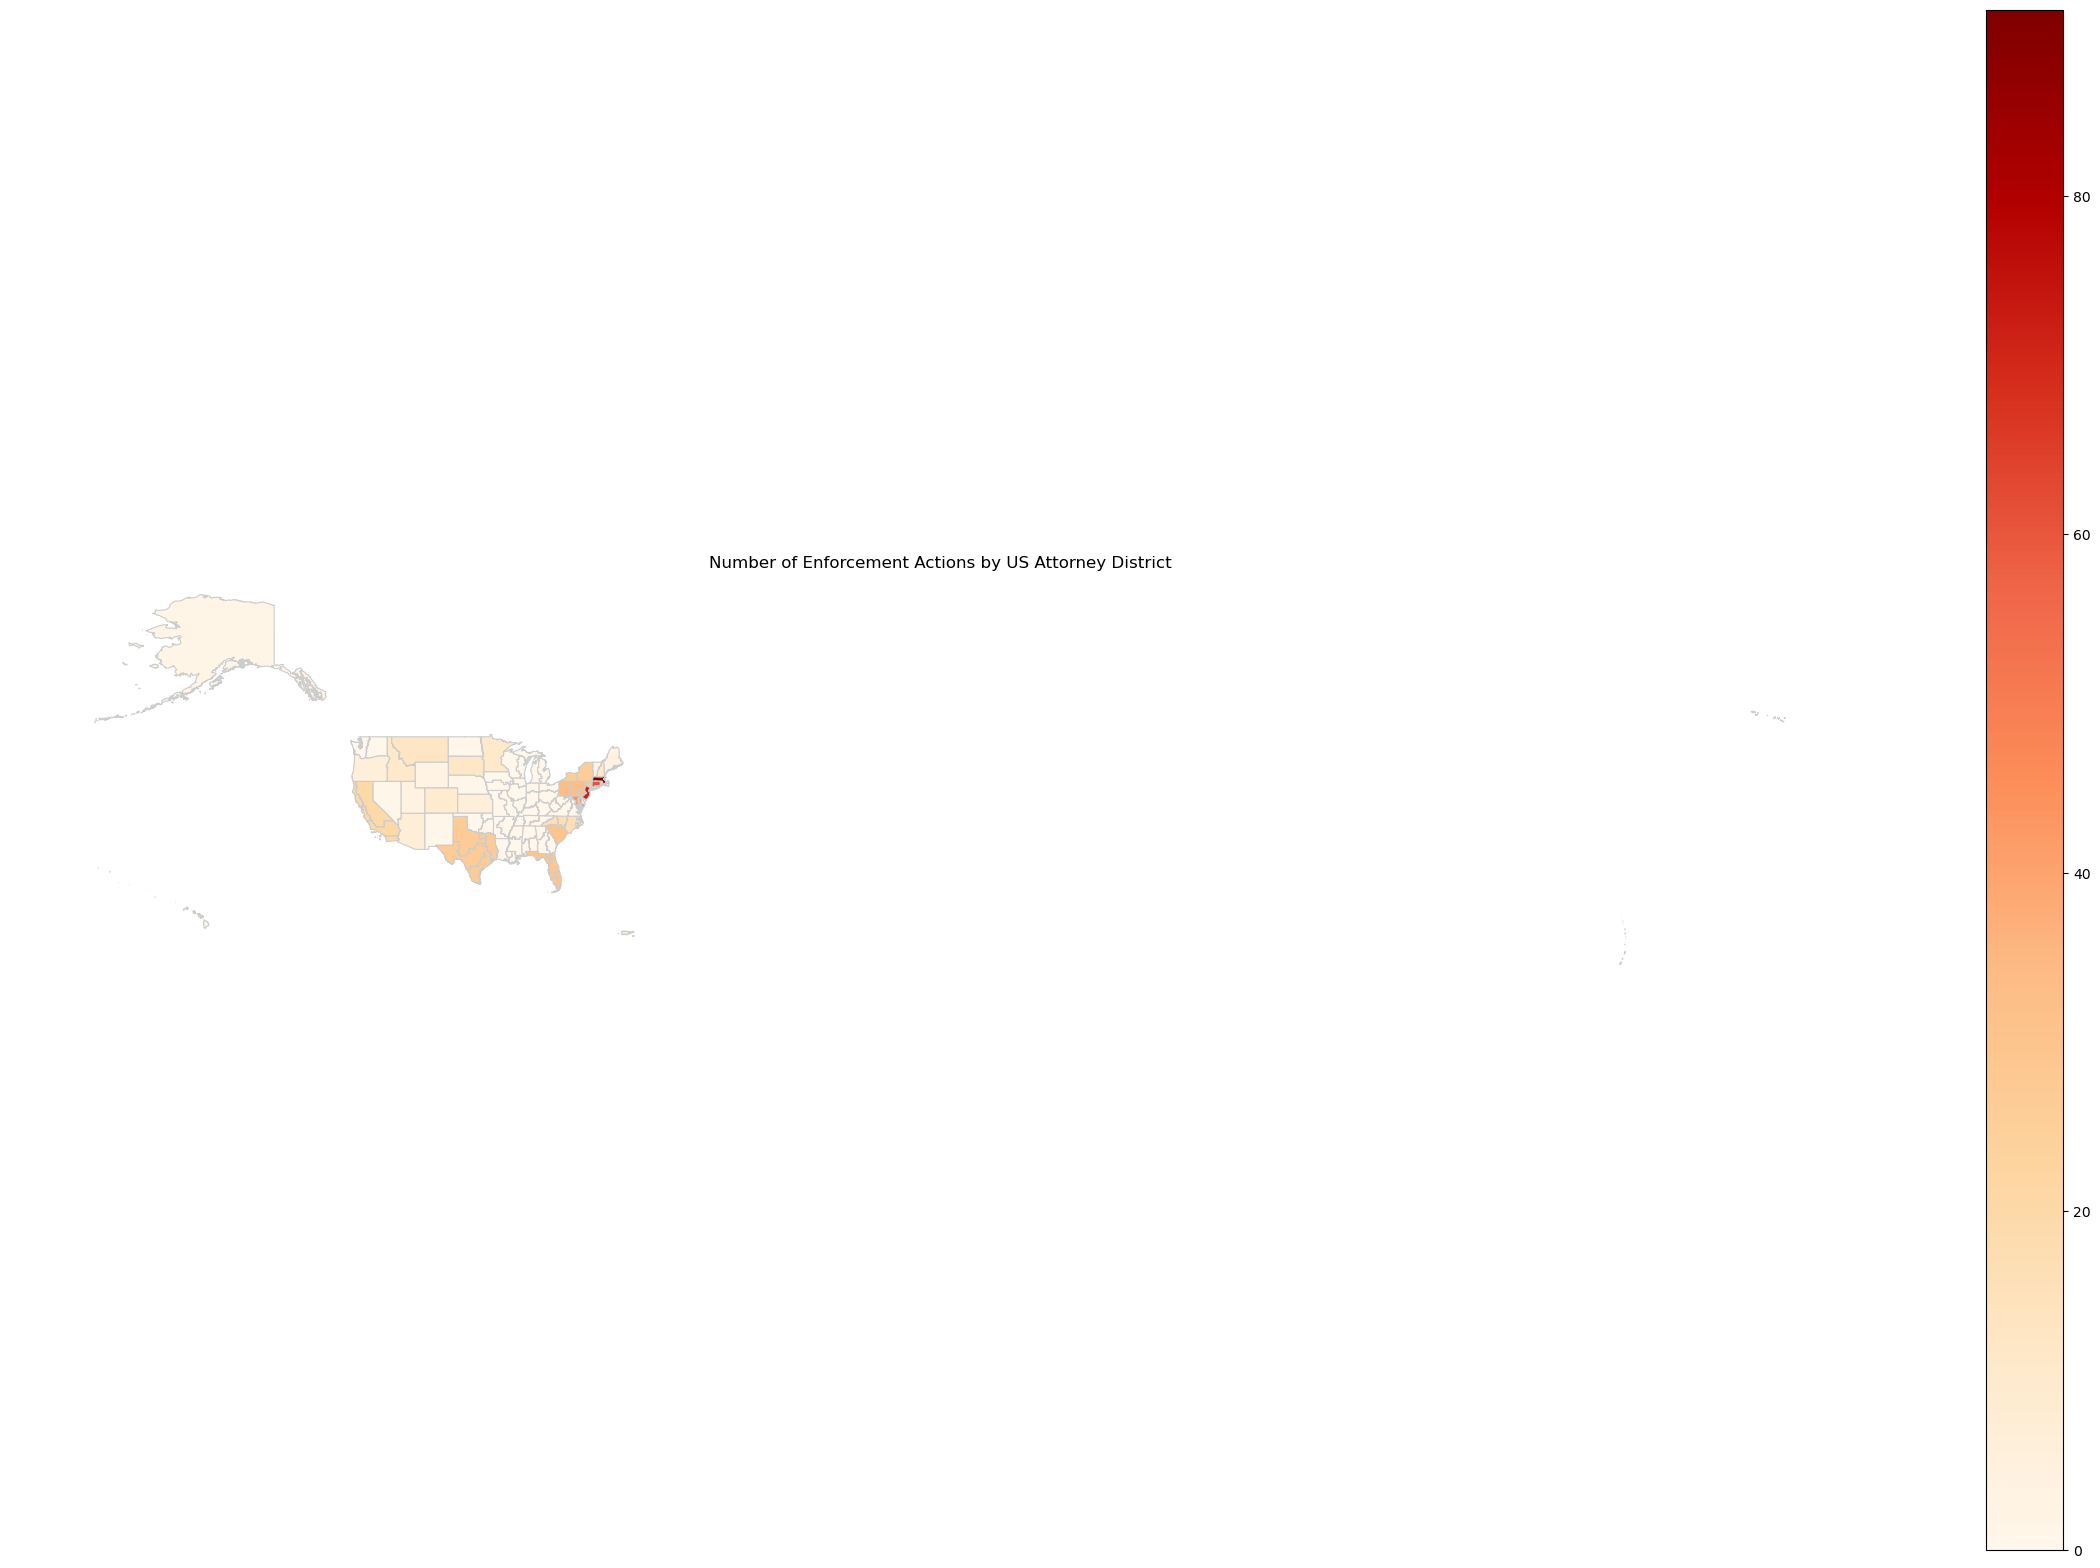

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(30, 20))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


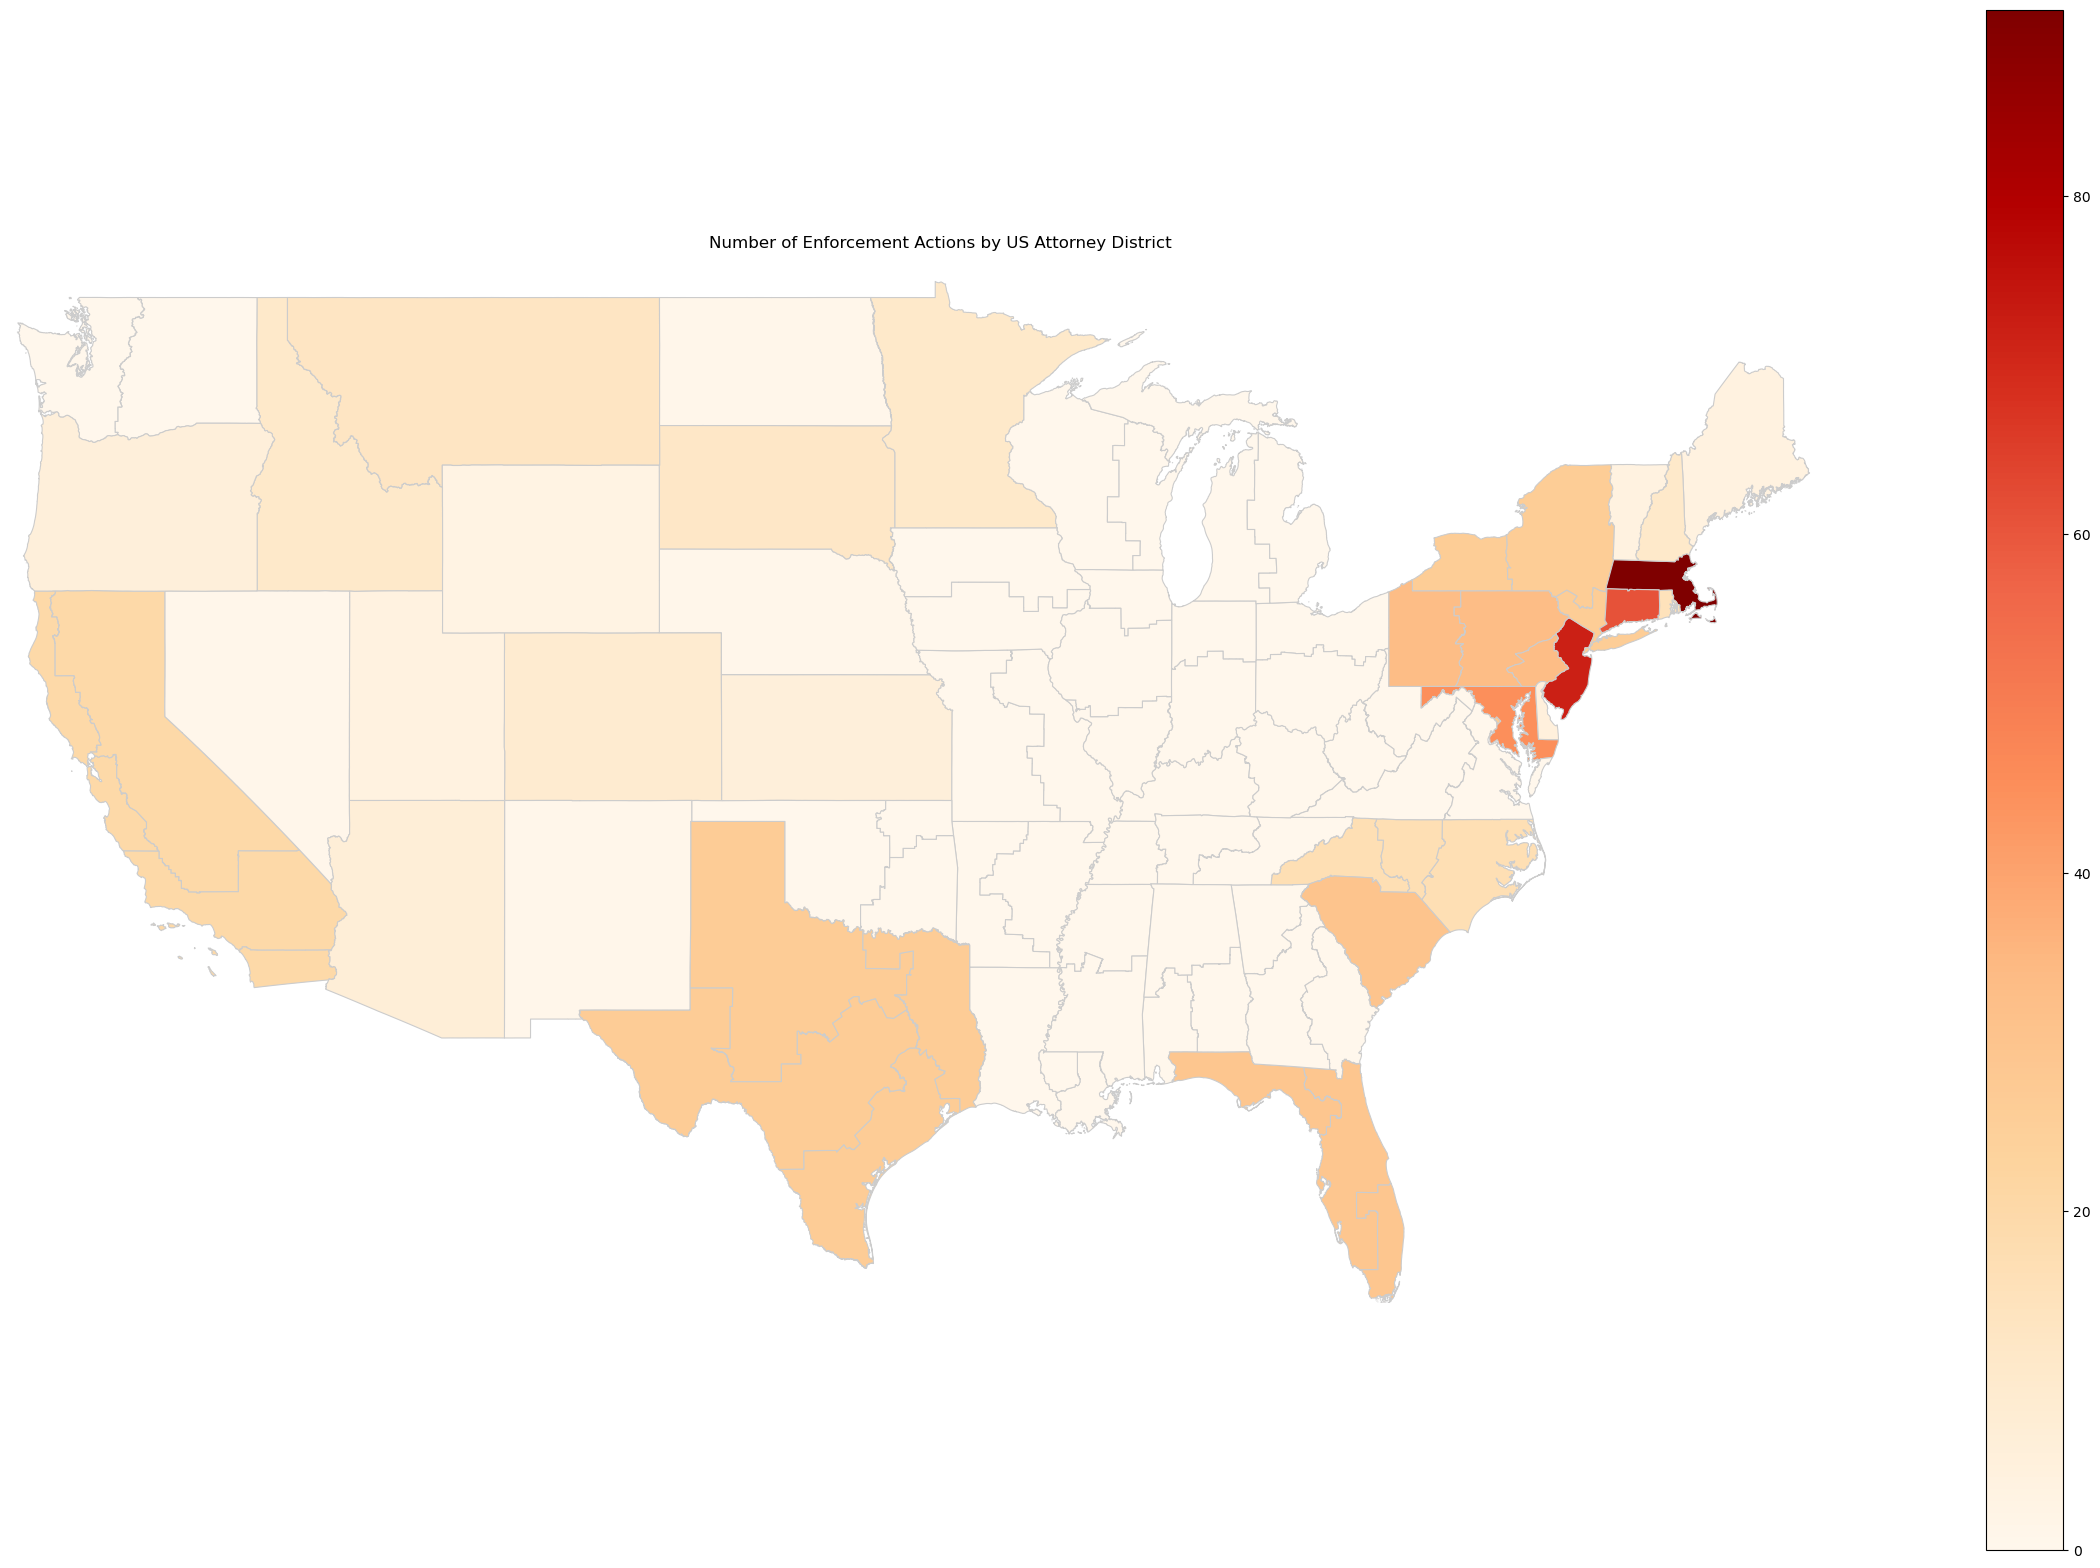

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(30, 20))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-125, -65)
ax.set_ylim(25, 50)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


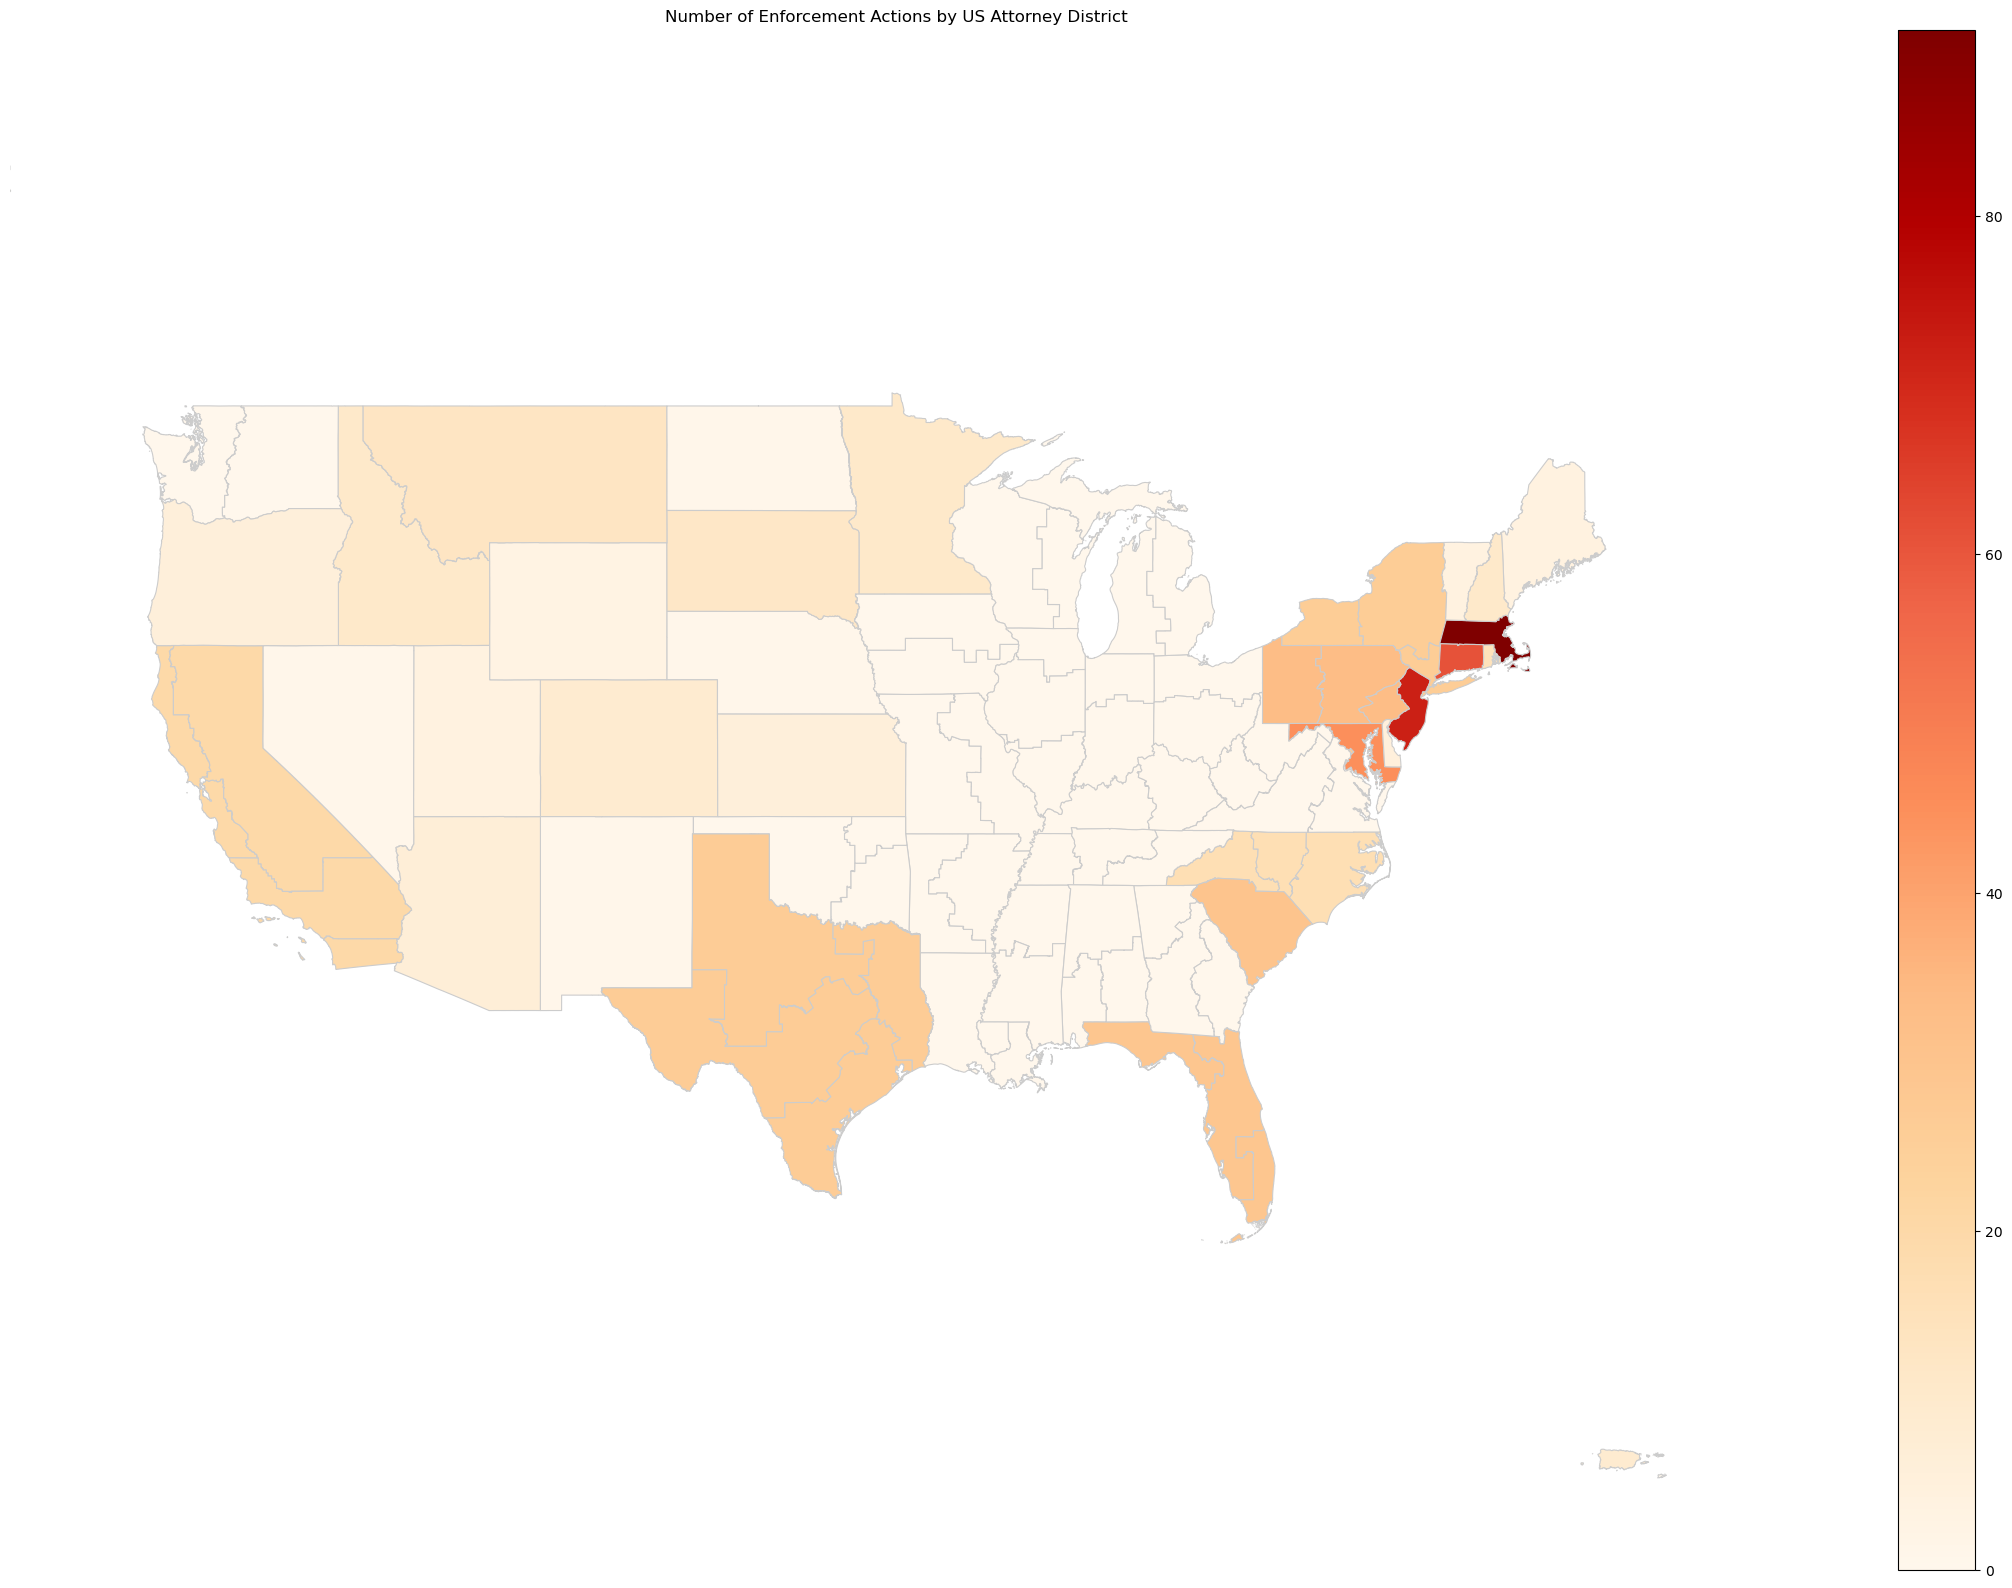

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(30, 20))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-130, -60)
ax.set_ylim(15, 60)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


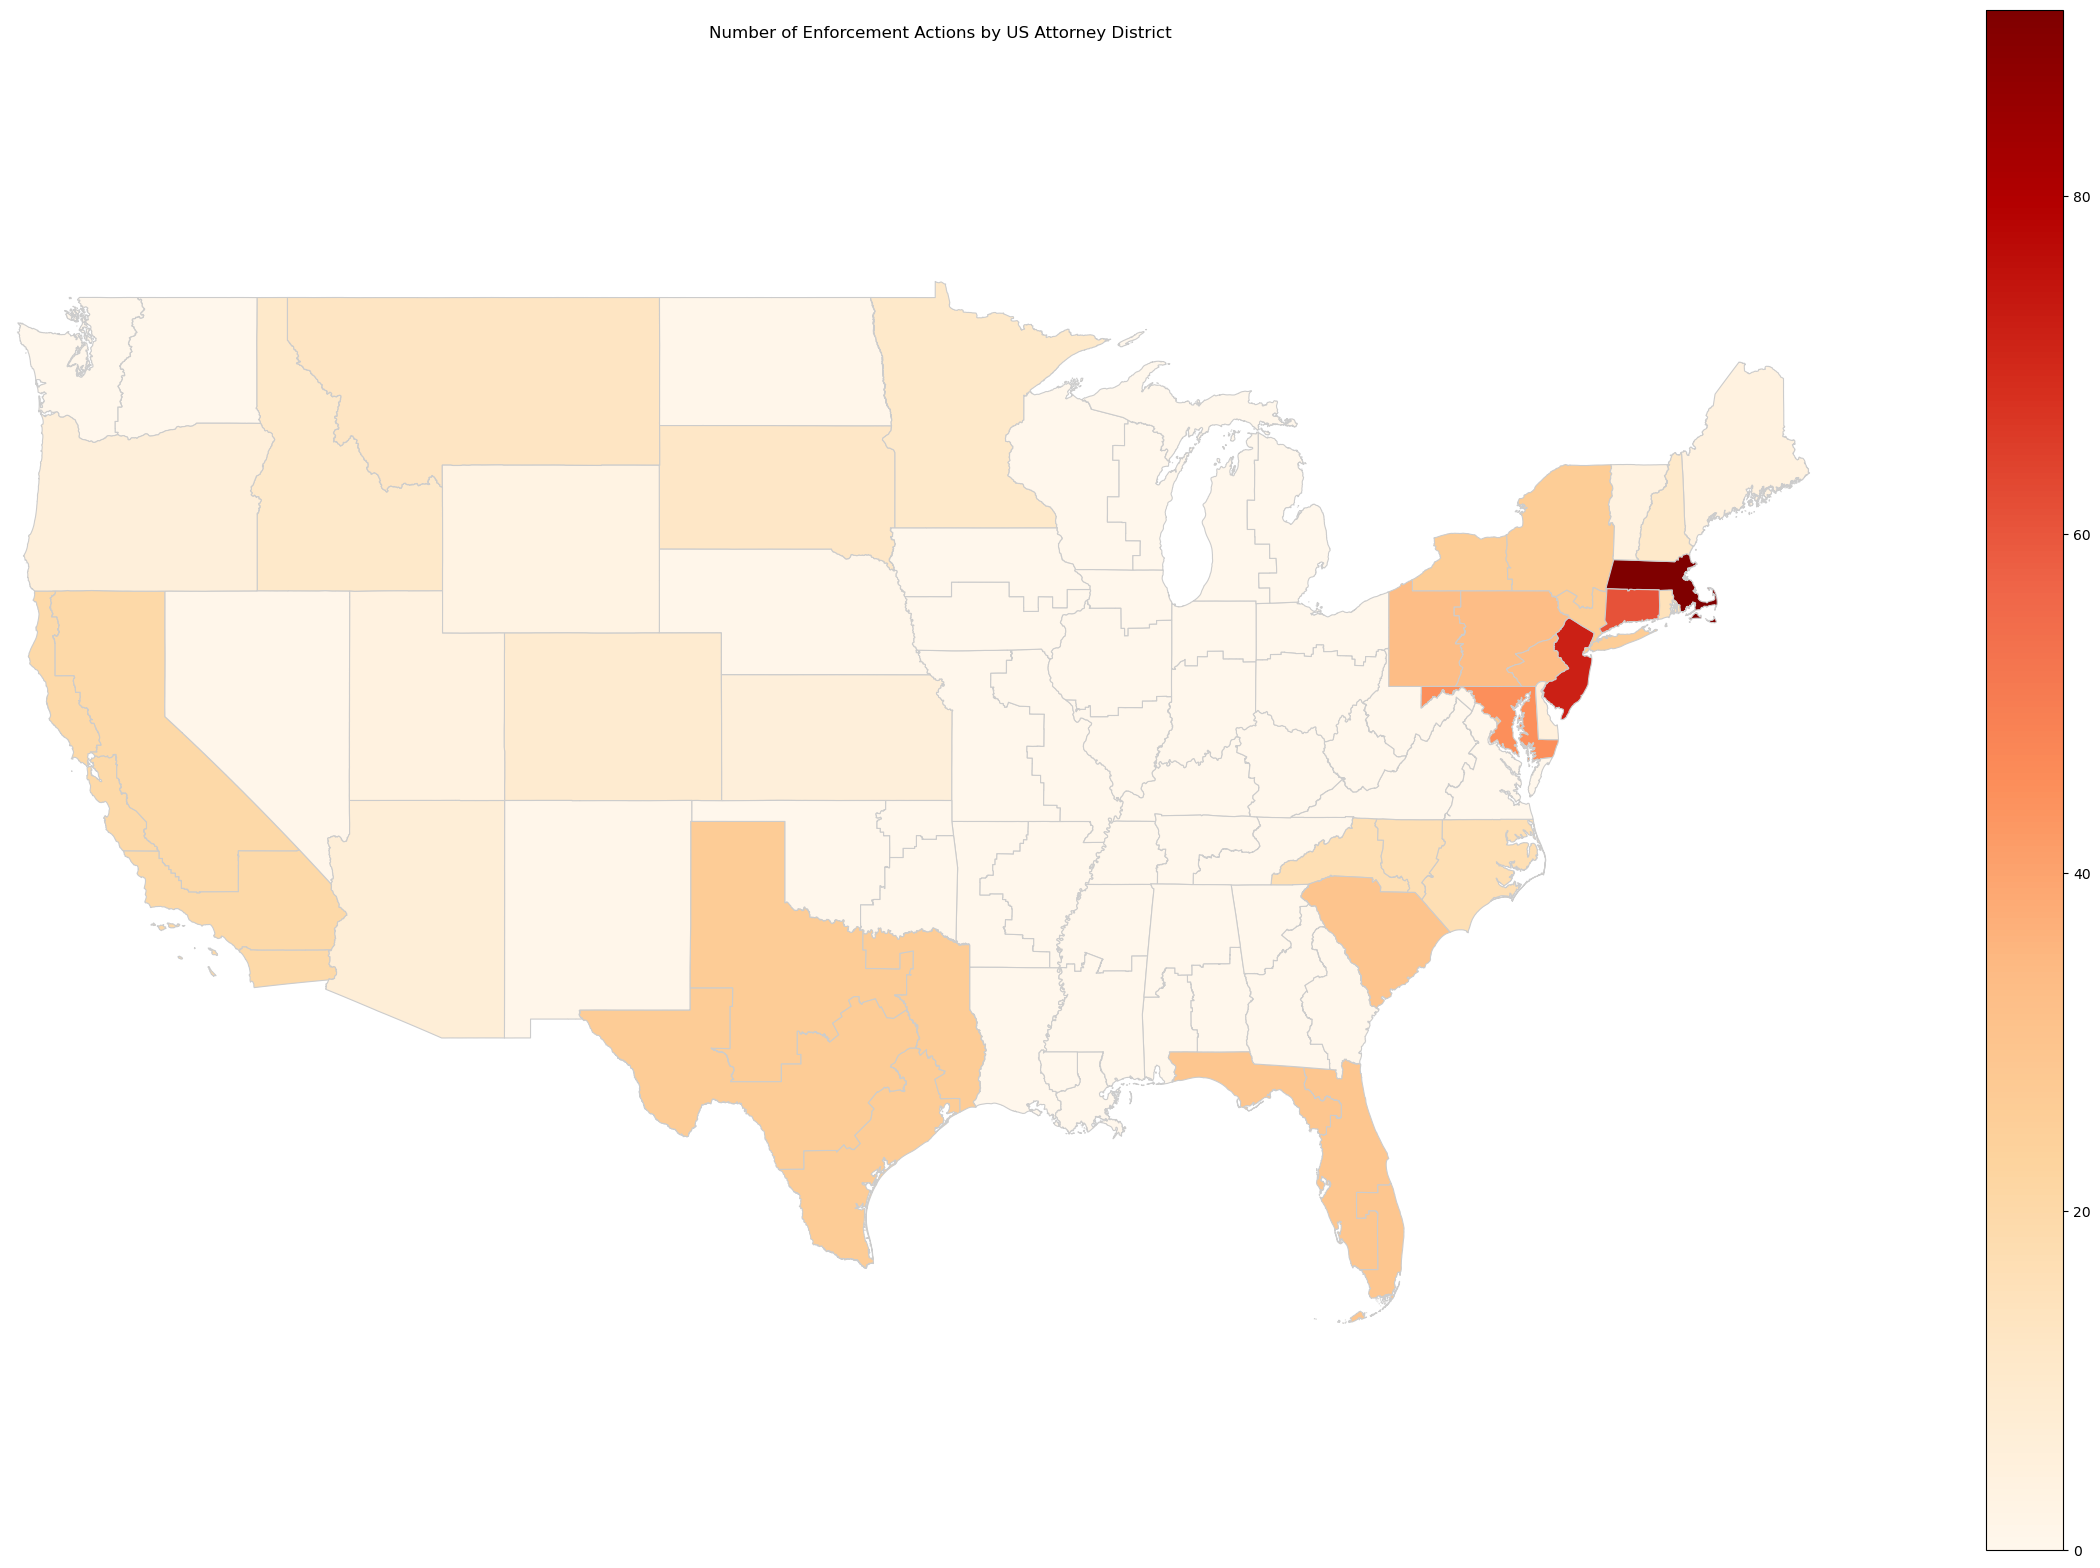

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(30, 20))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-125, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


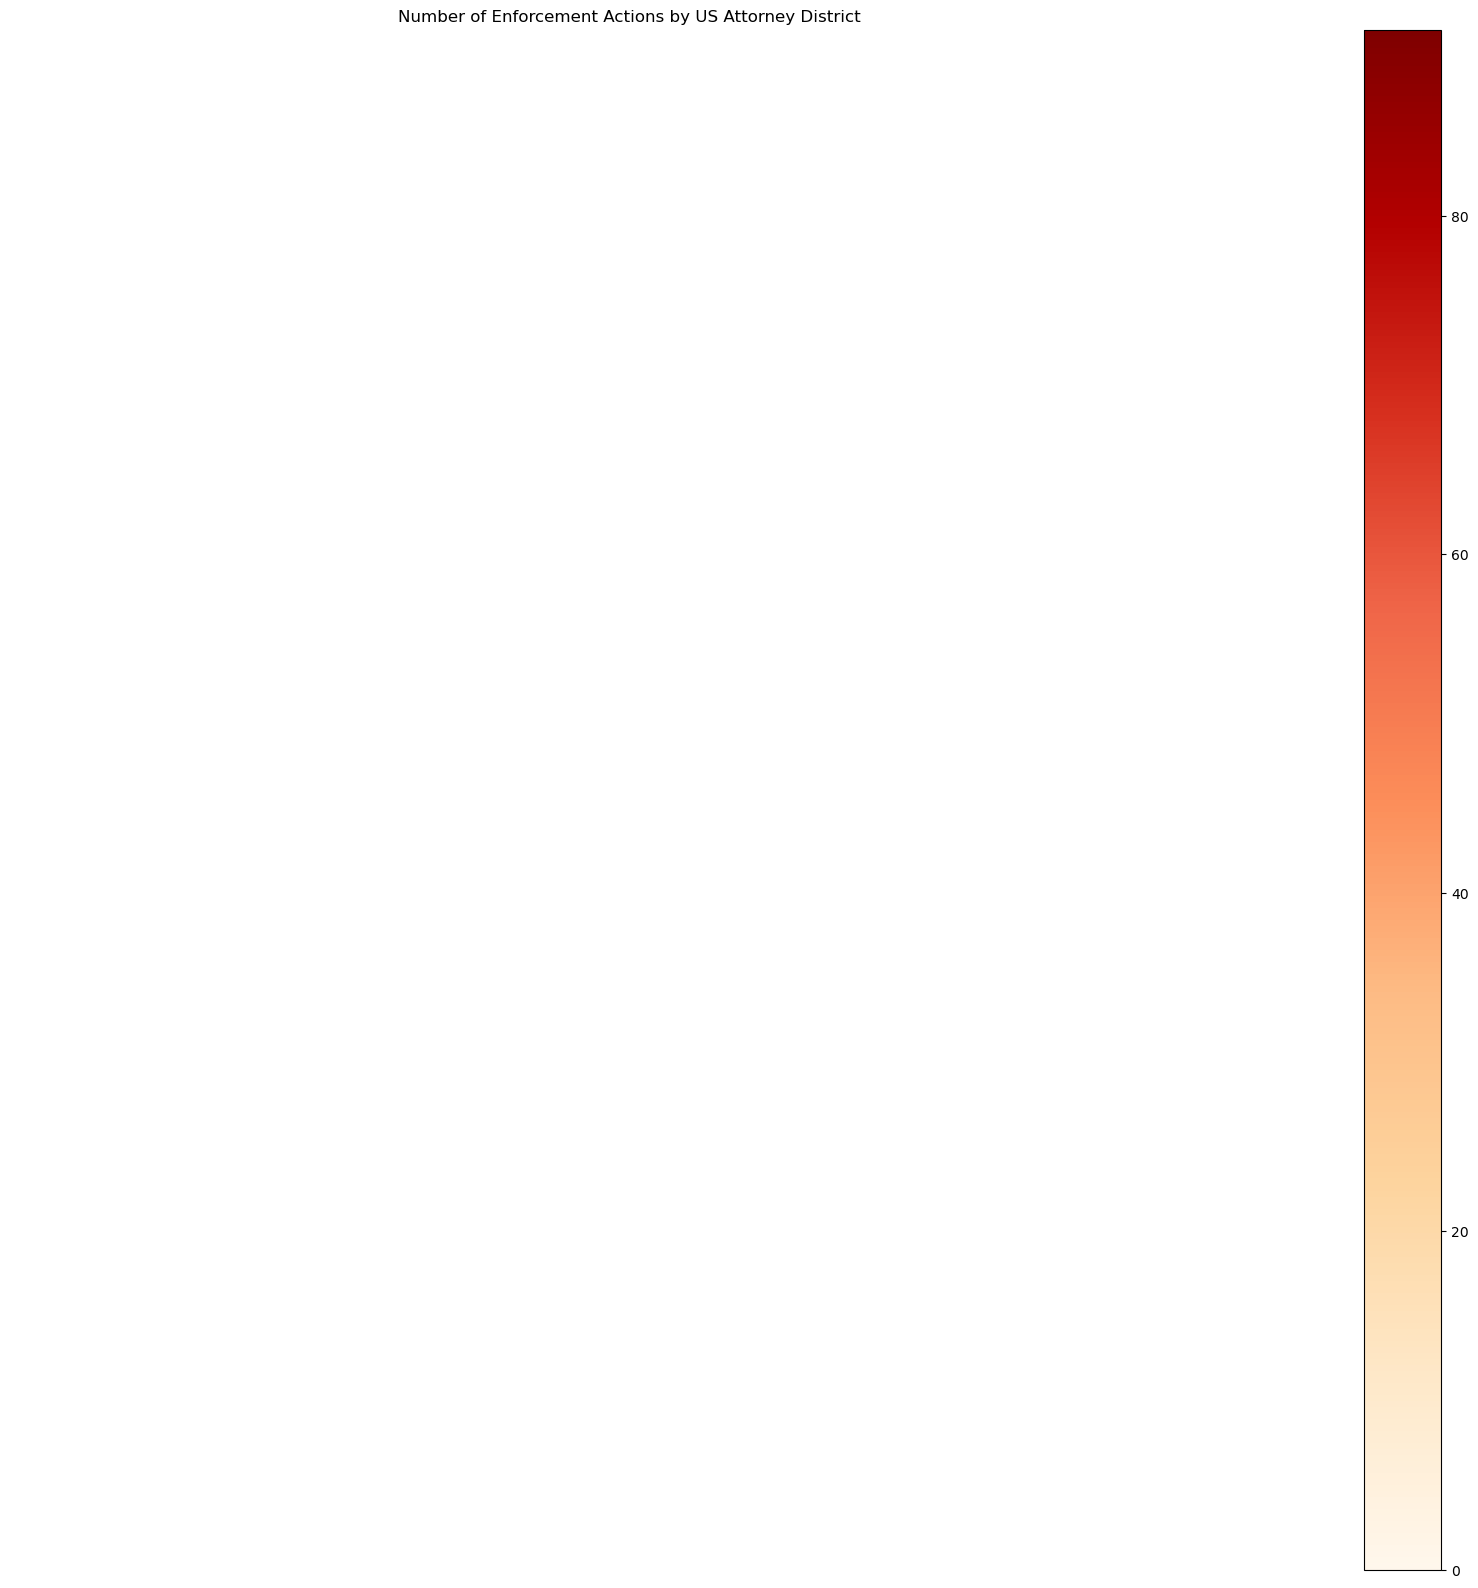

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(30, 20))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-60, -35)
ax.set_ylim(10, 33)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


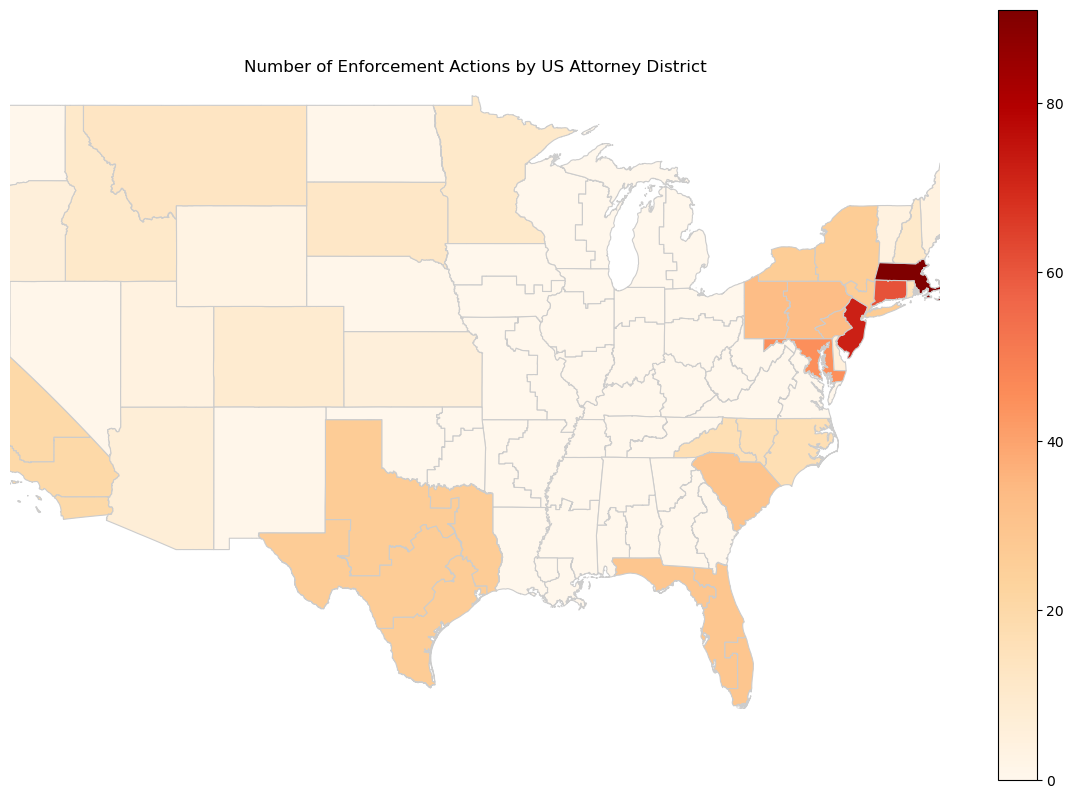

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-120, -70)
ax.set_ylim(25, 50)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


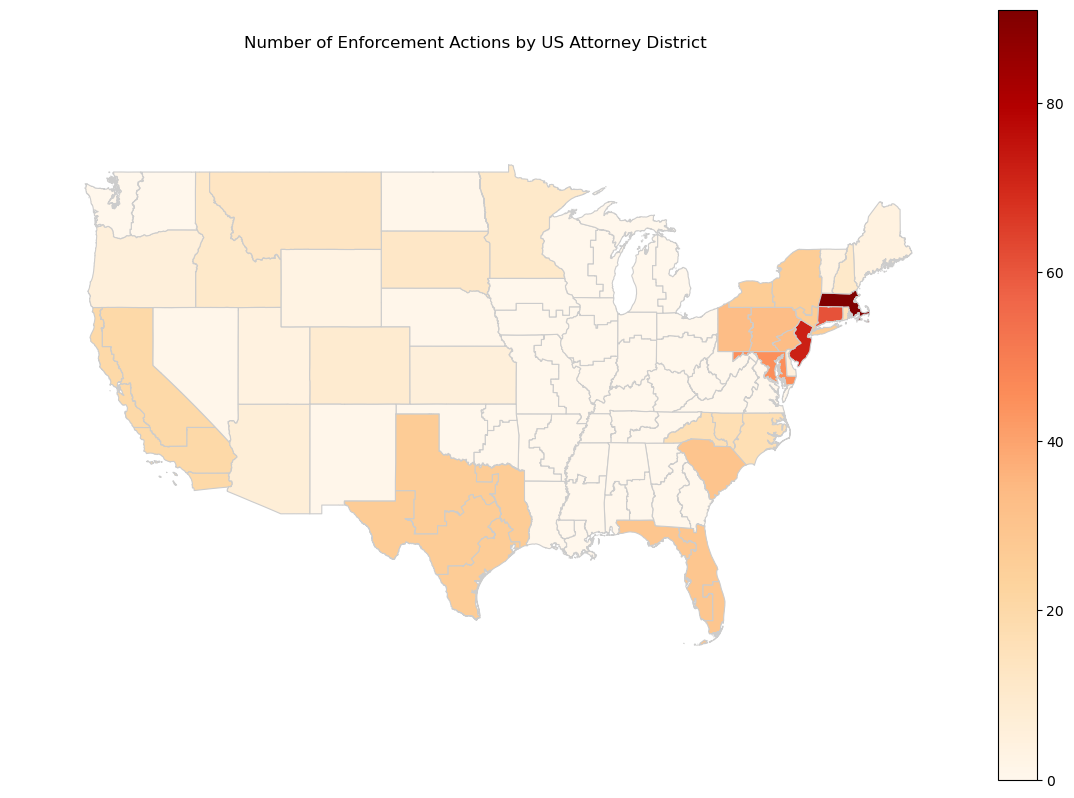

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


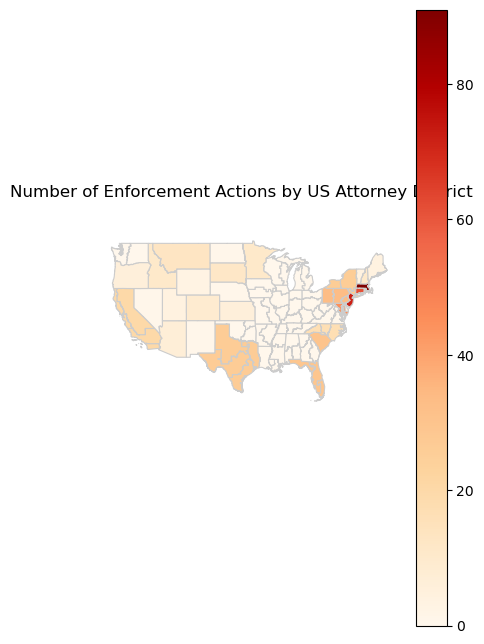

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(5, 8))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


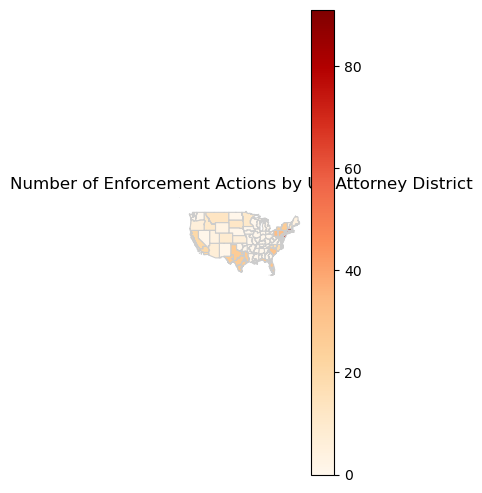

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(2, 8))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


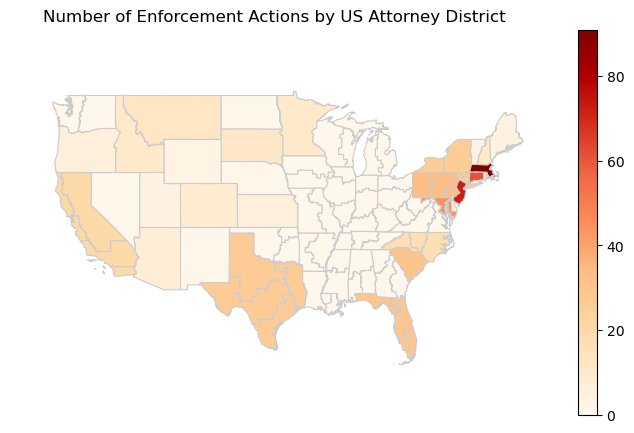

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


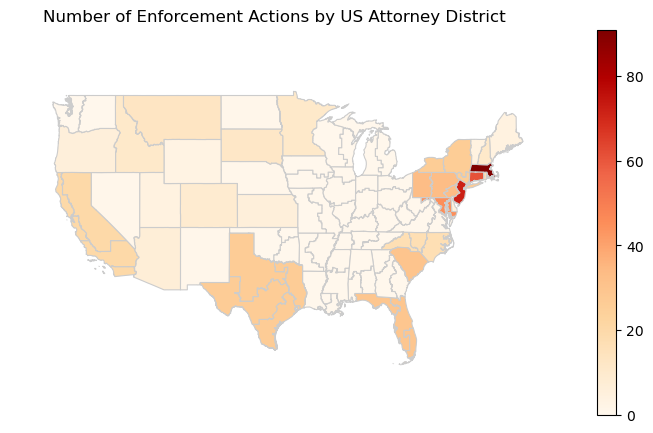

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


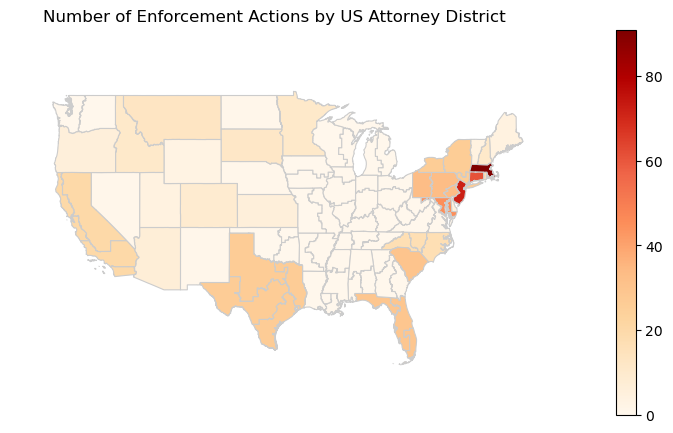

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


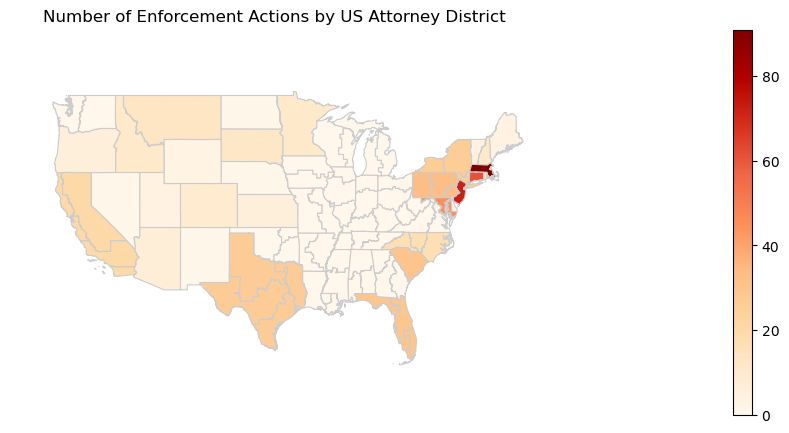

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(50, 5))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


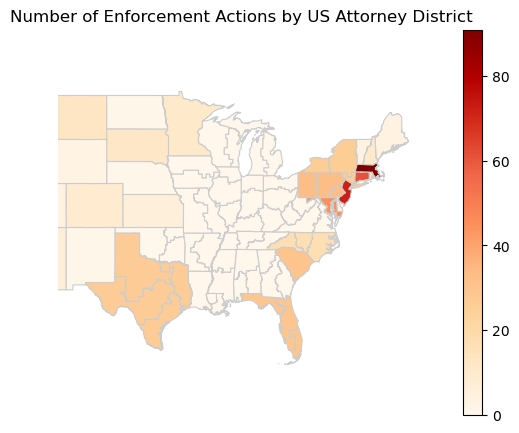

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-110, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


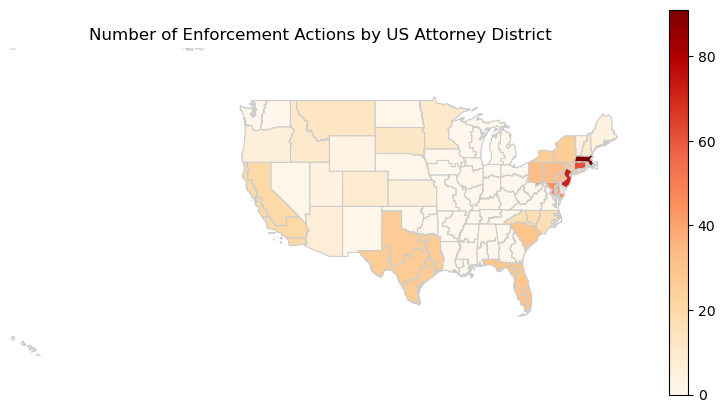

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-160, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


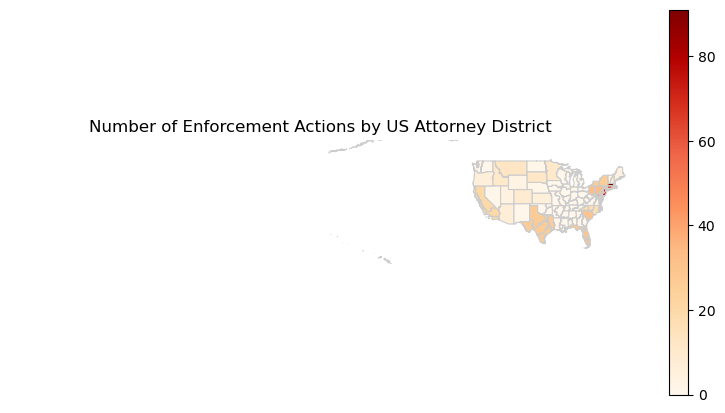

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-300, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


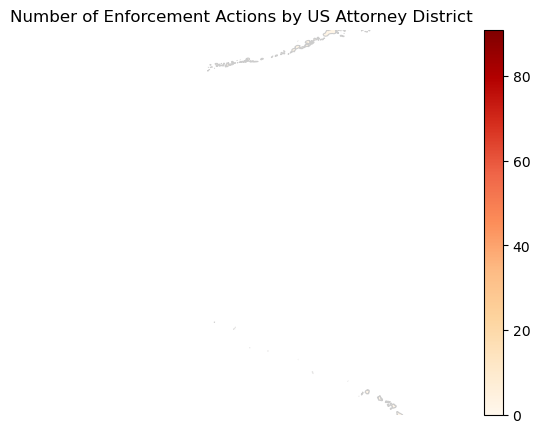

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-200, -150)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


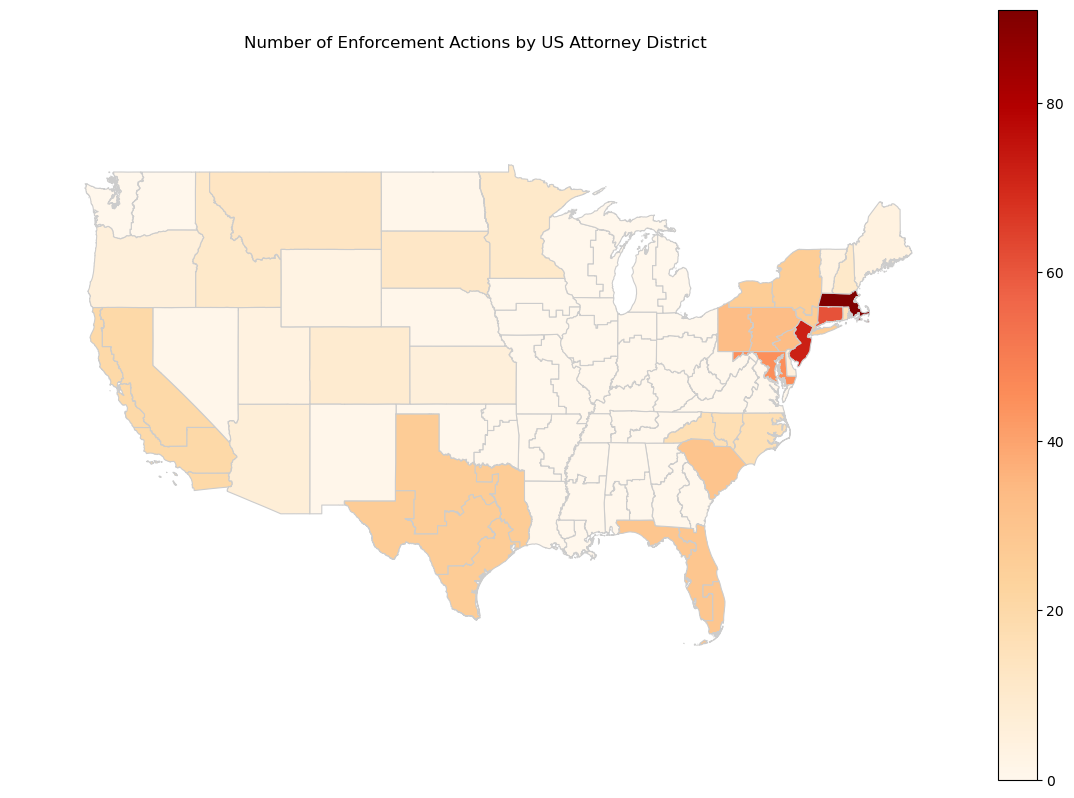

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


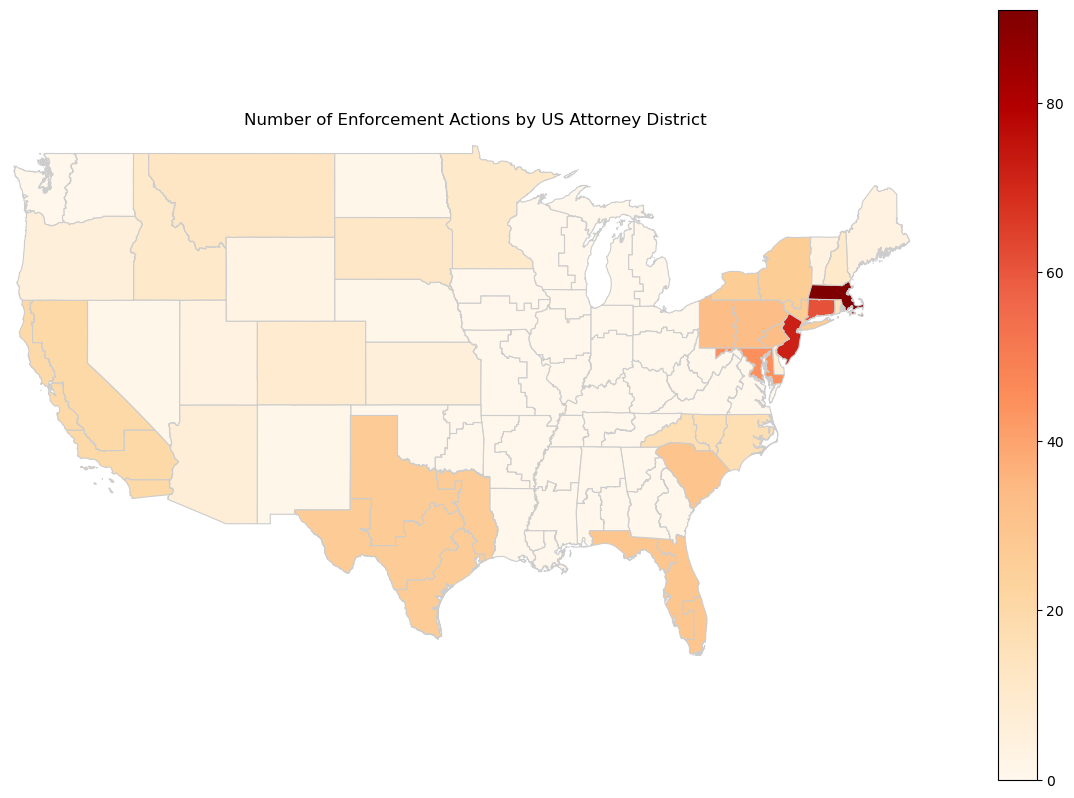

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_xlim(-125, -65)
ax.set_ylim(25, 50)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


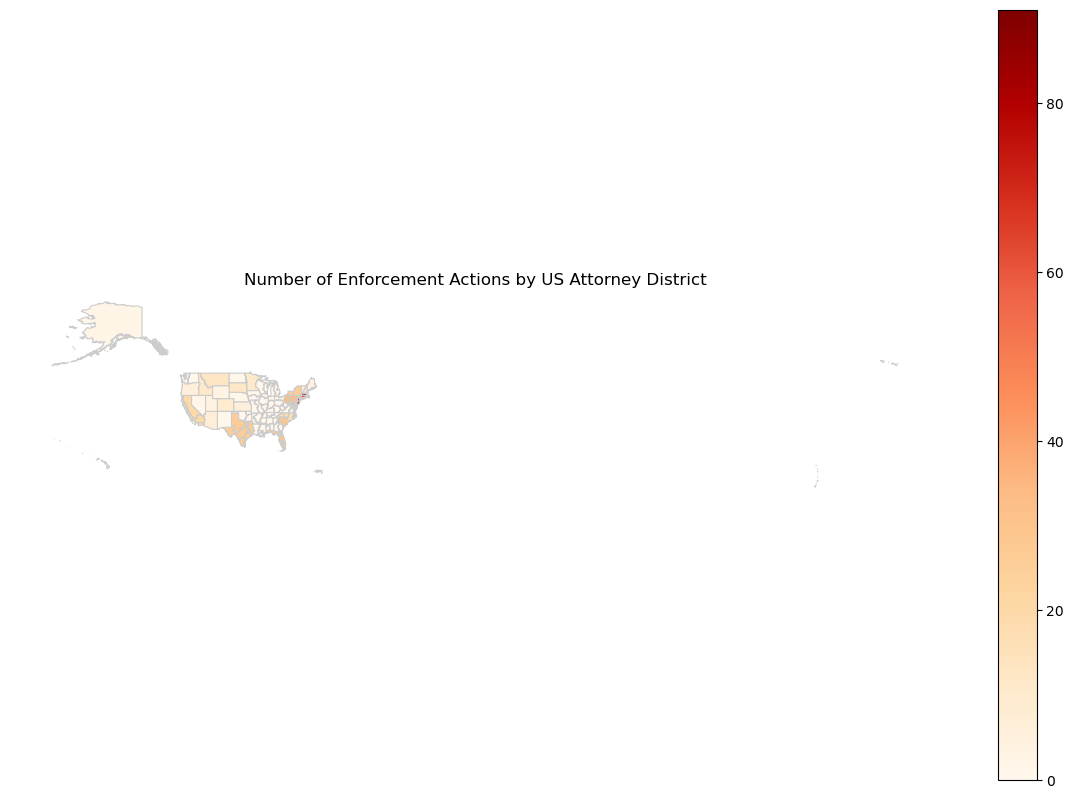

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


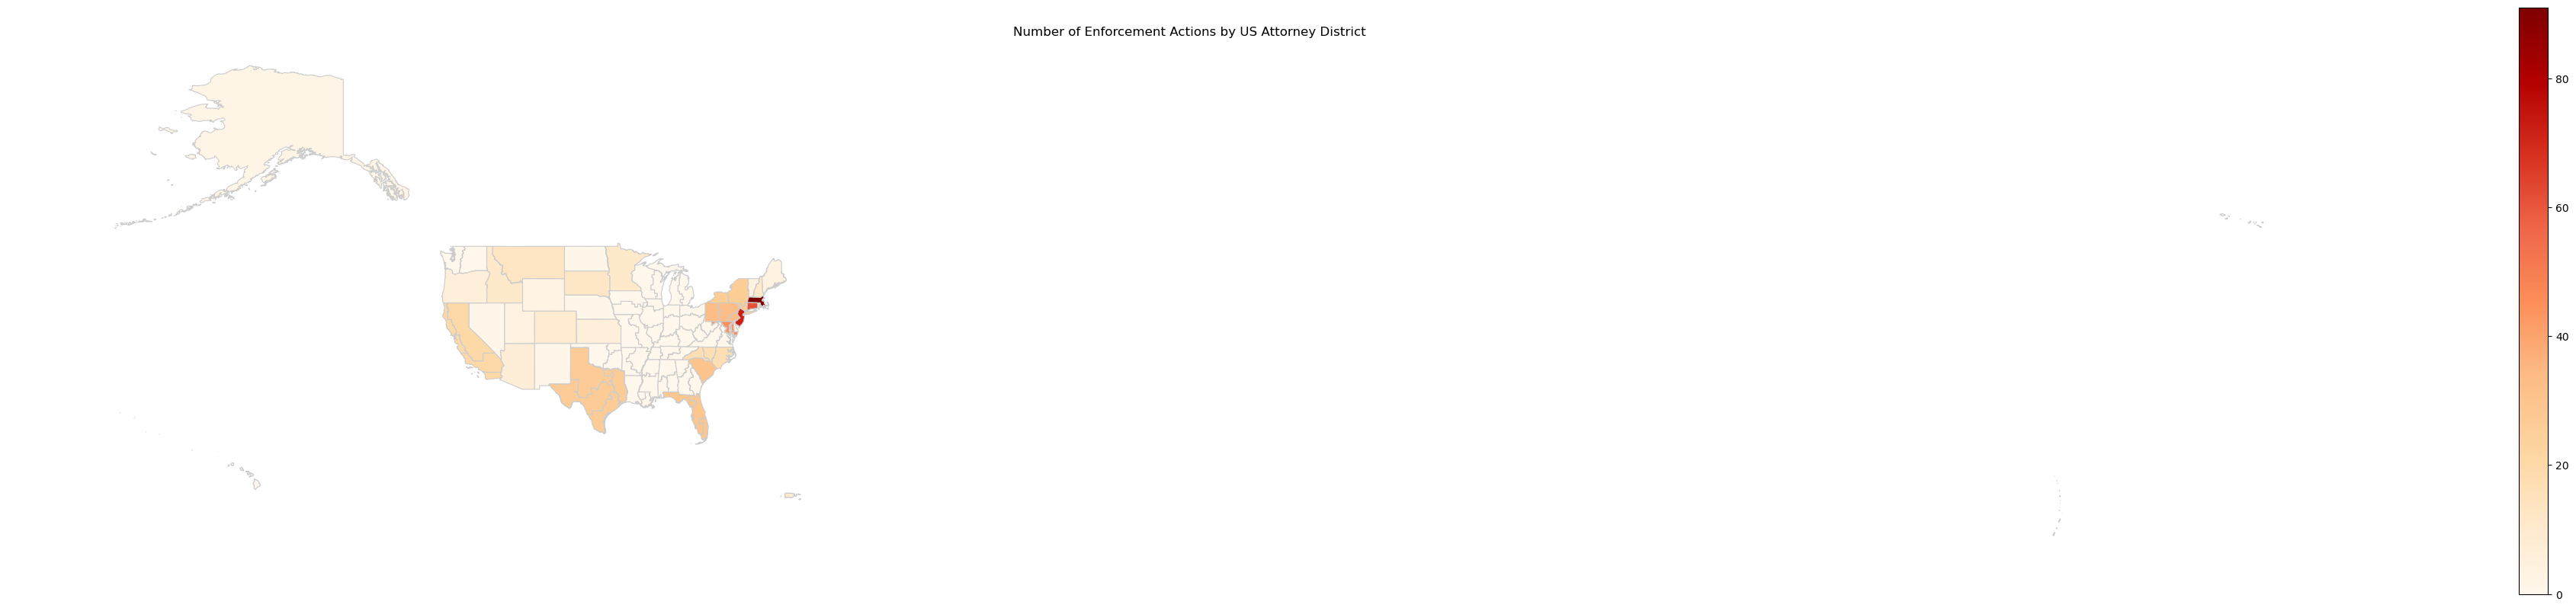

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


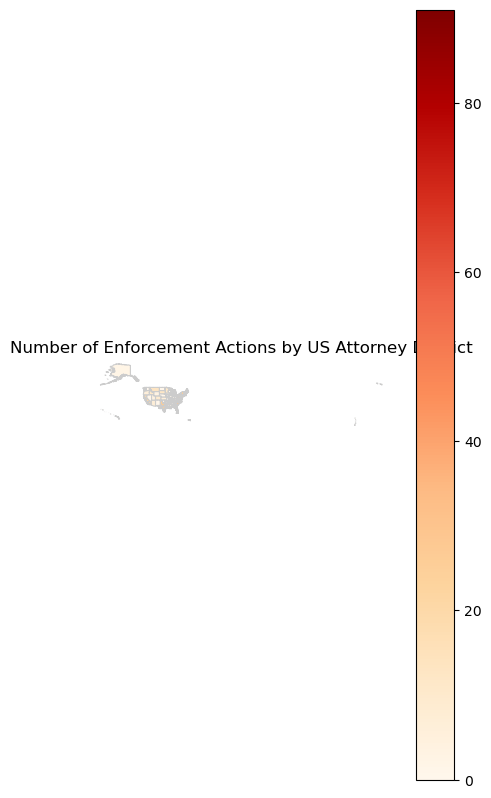

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(5, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


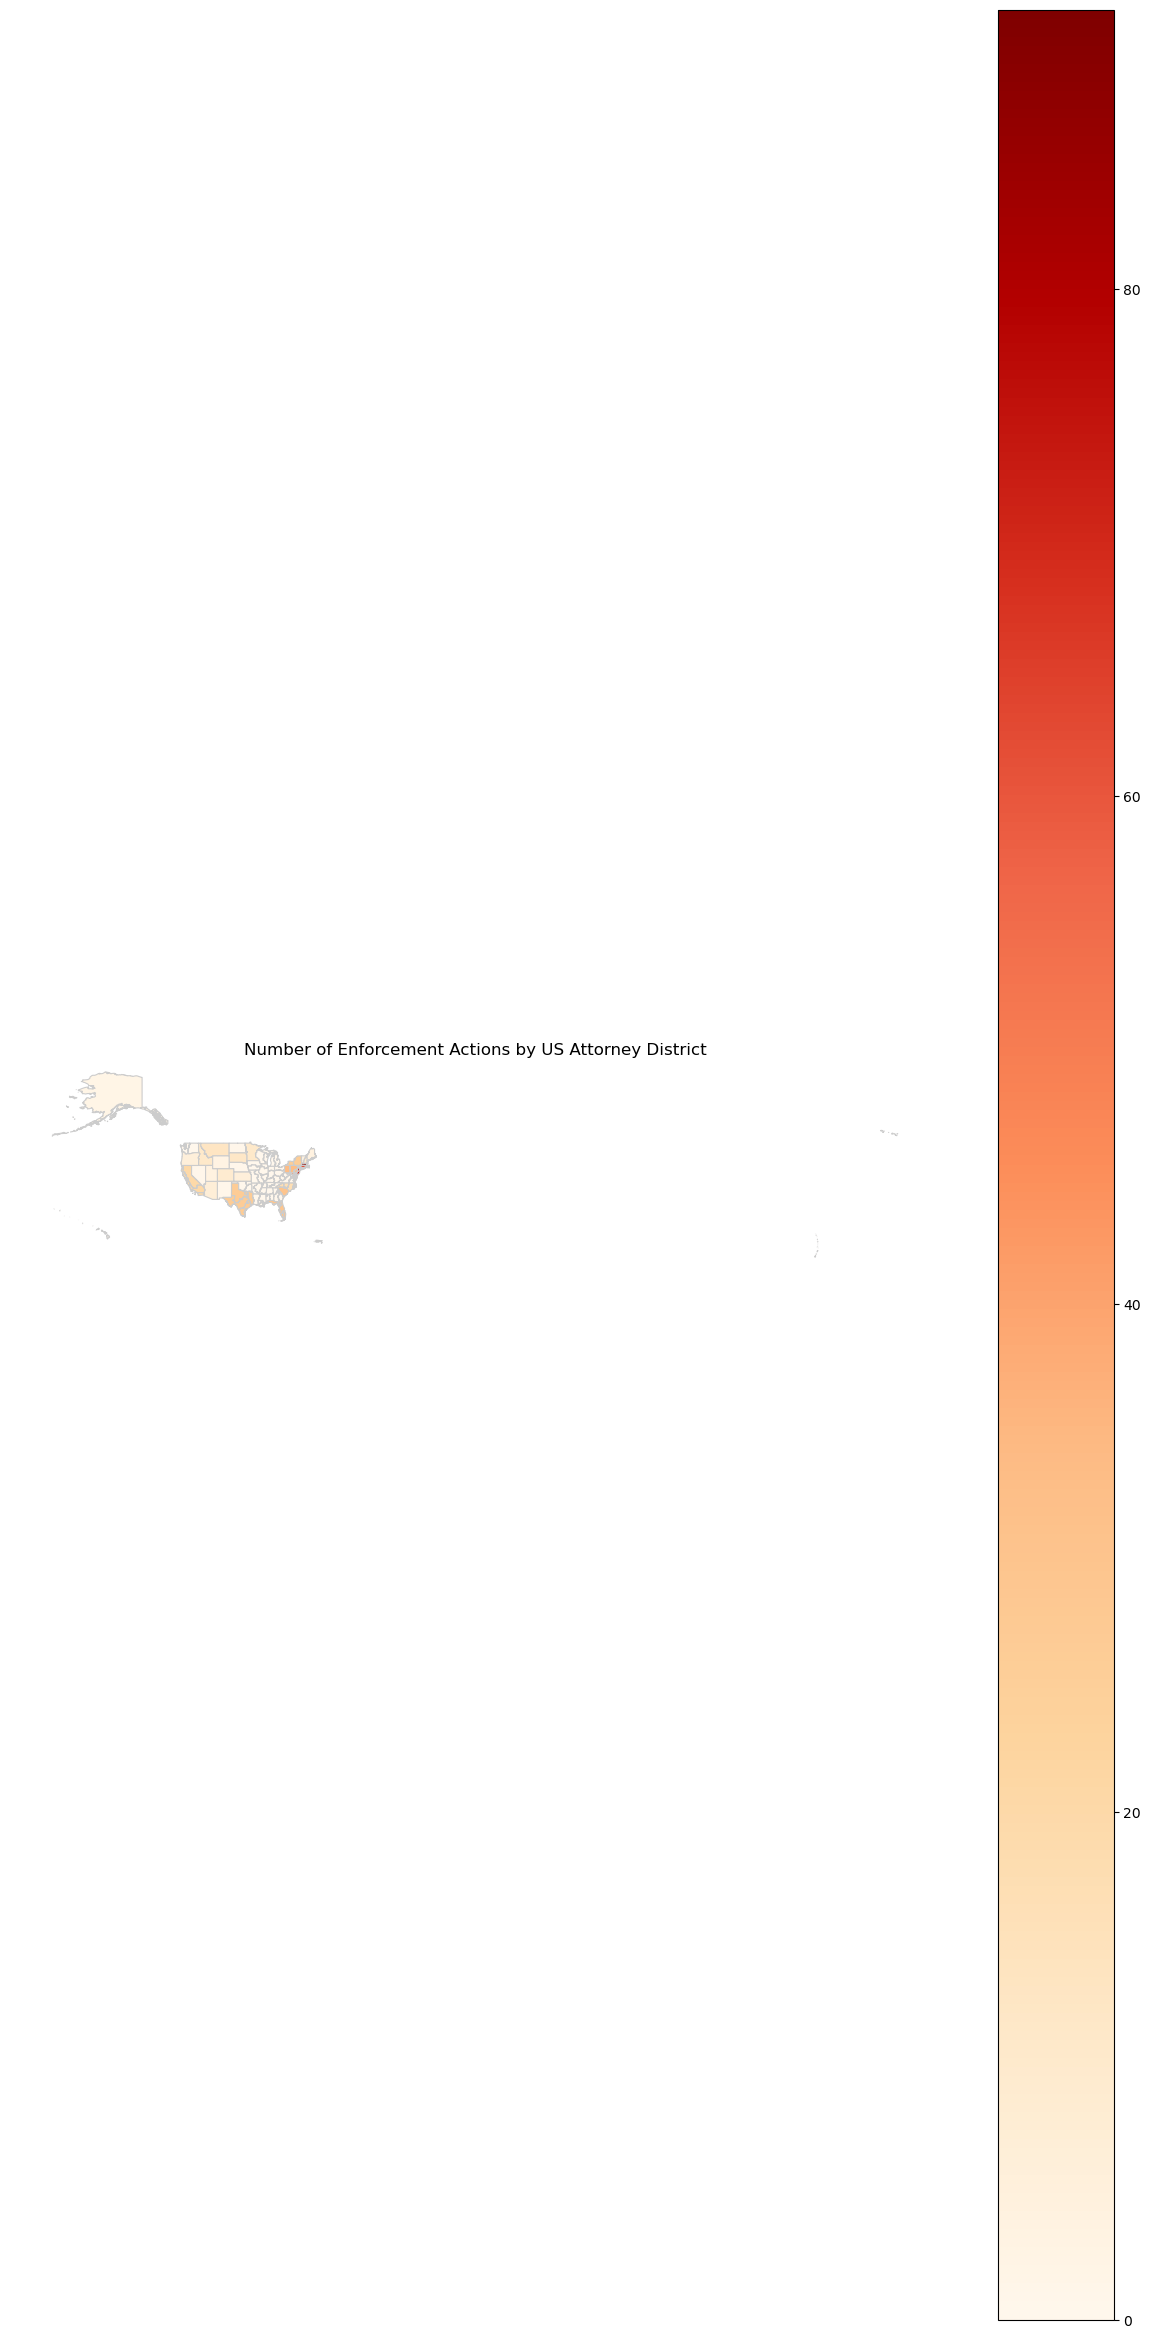

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


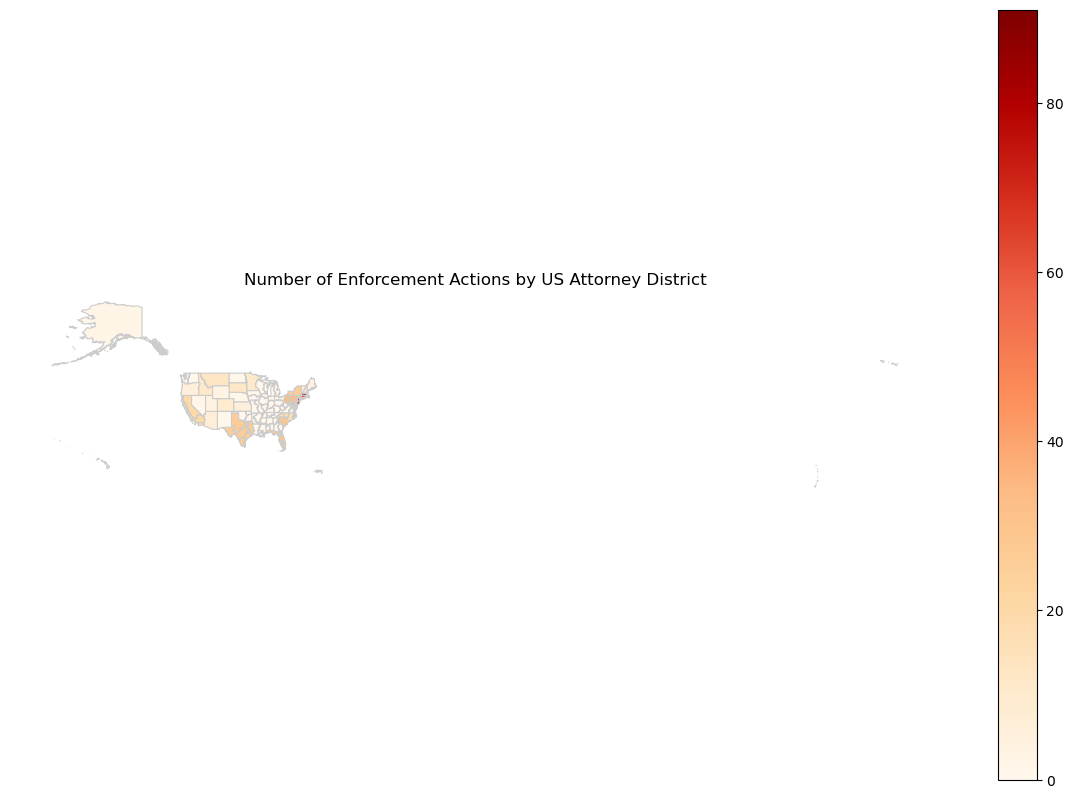

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


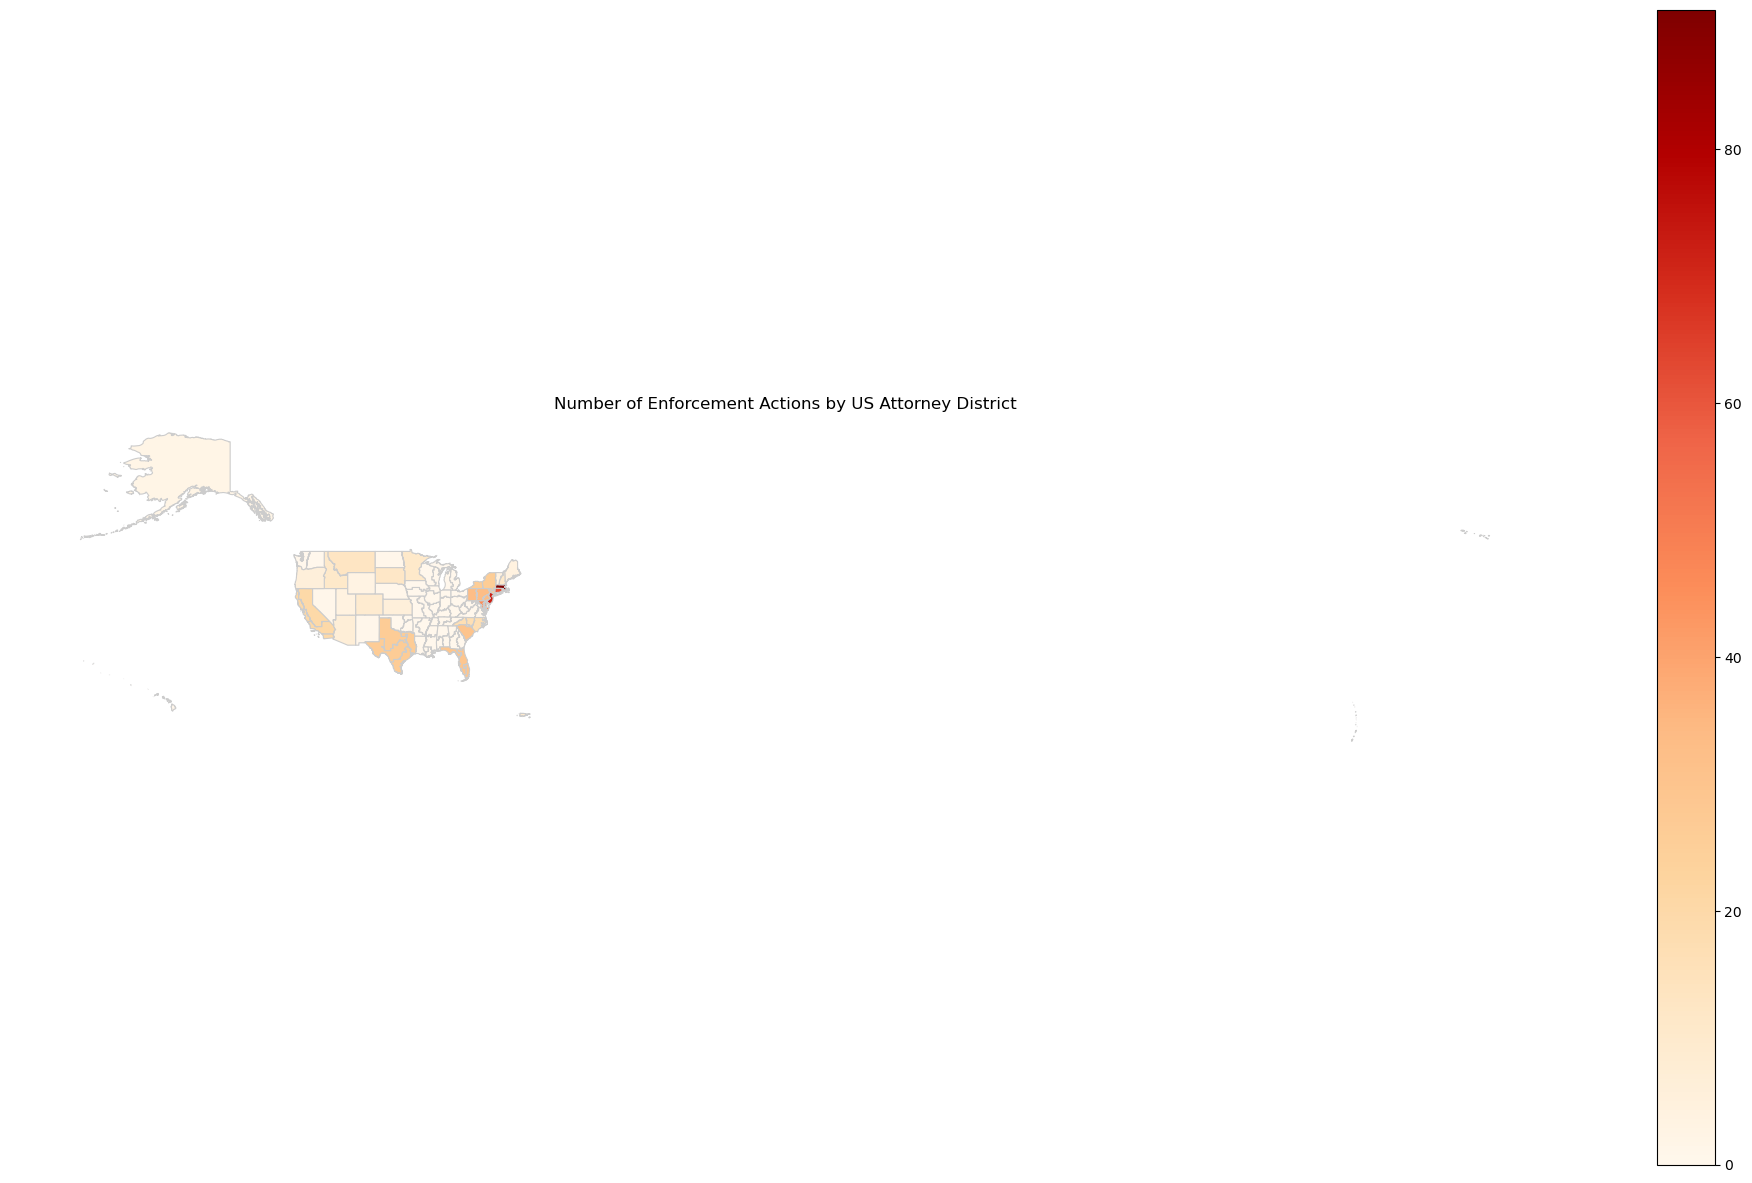

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


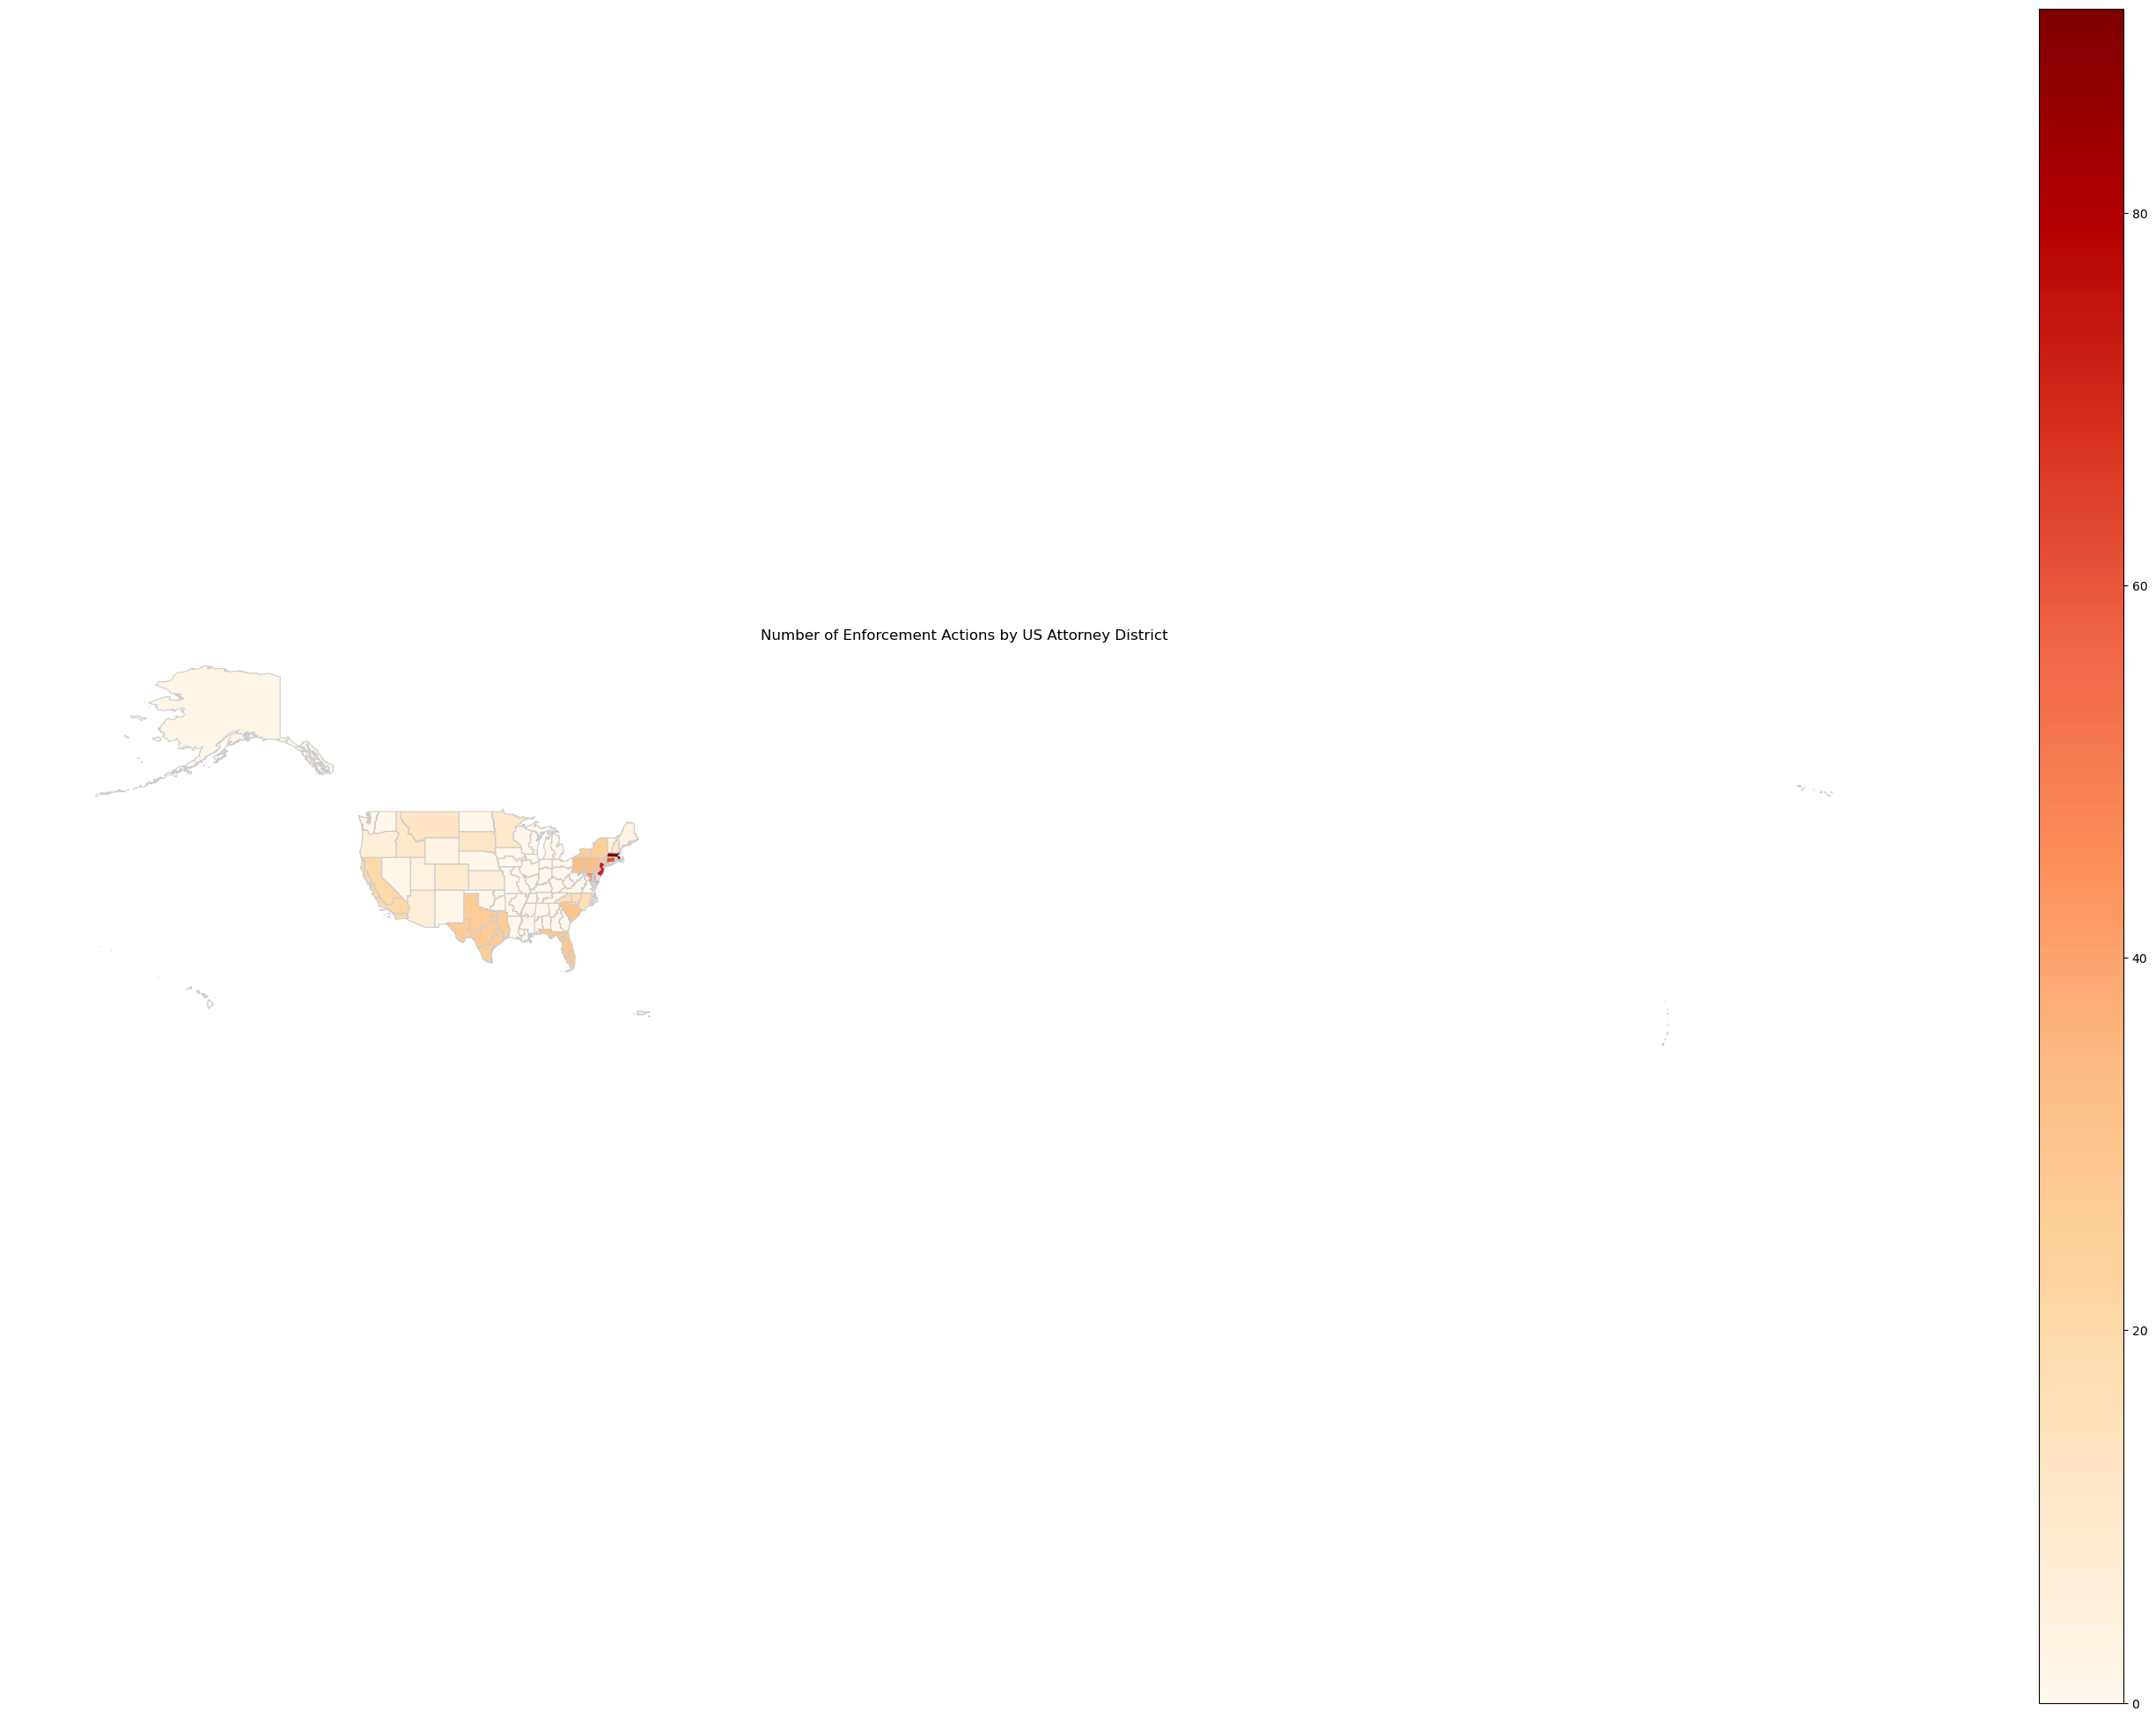

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(35, 25))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


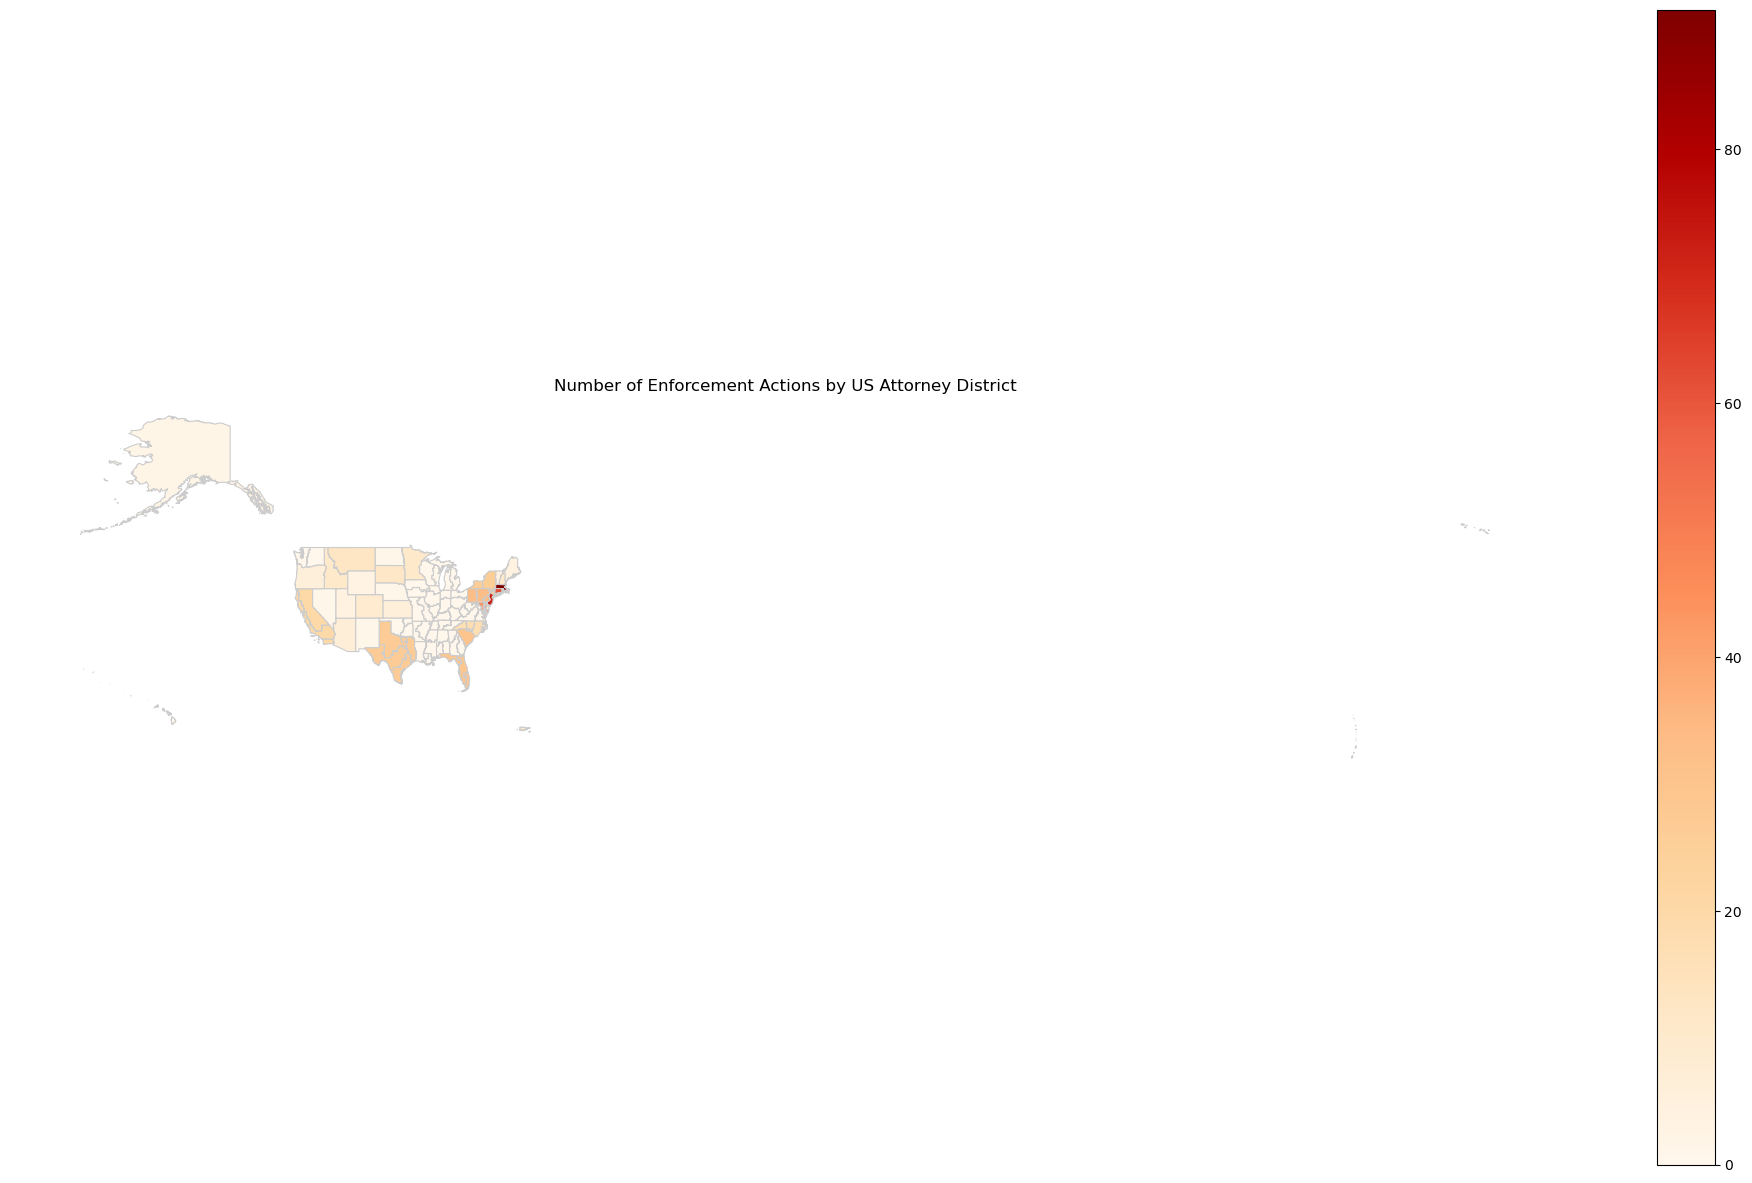

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_aspect(1.5)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


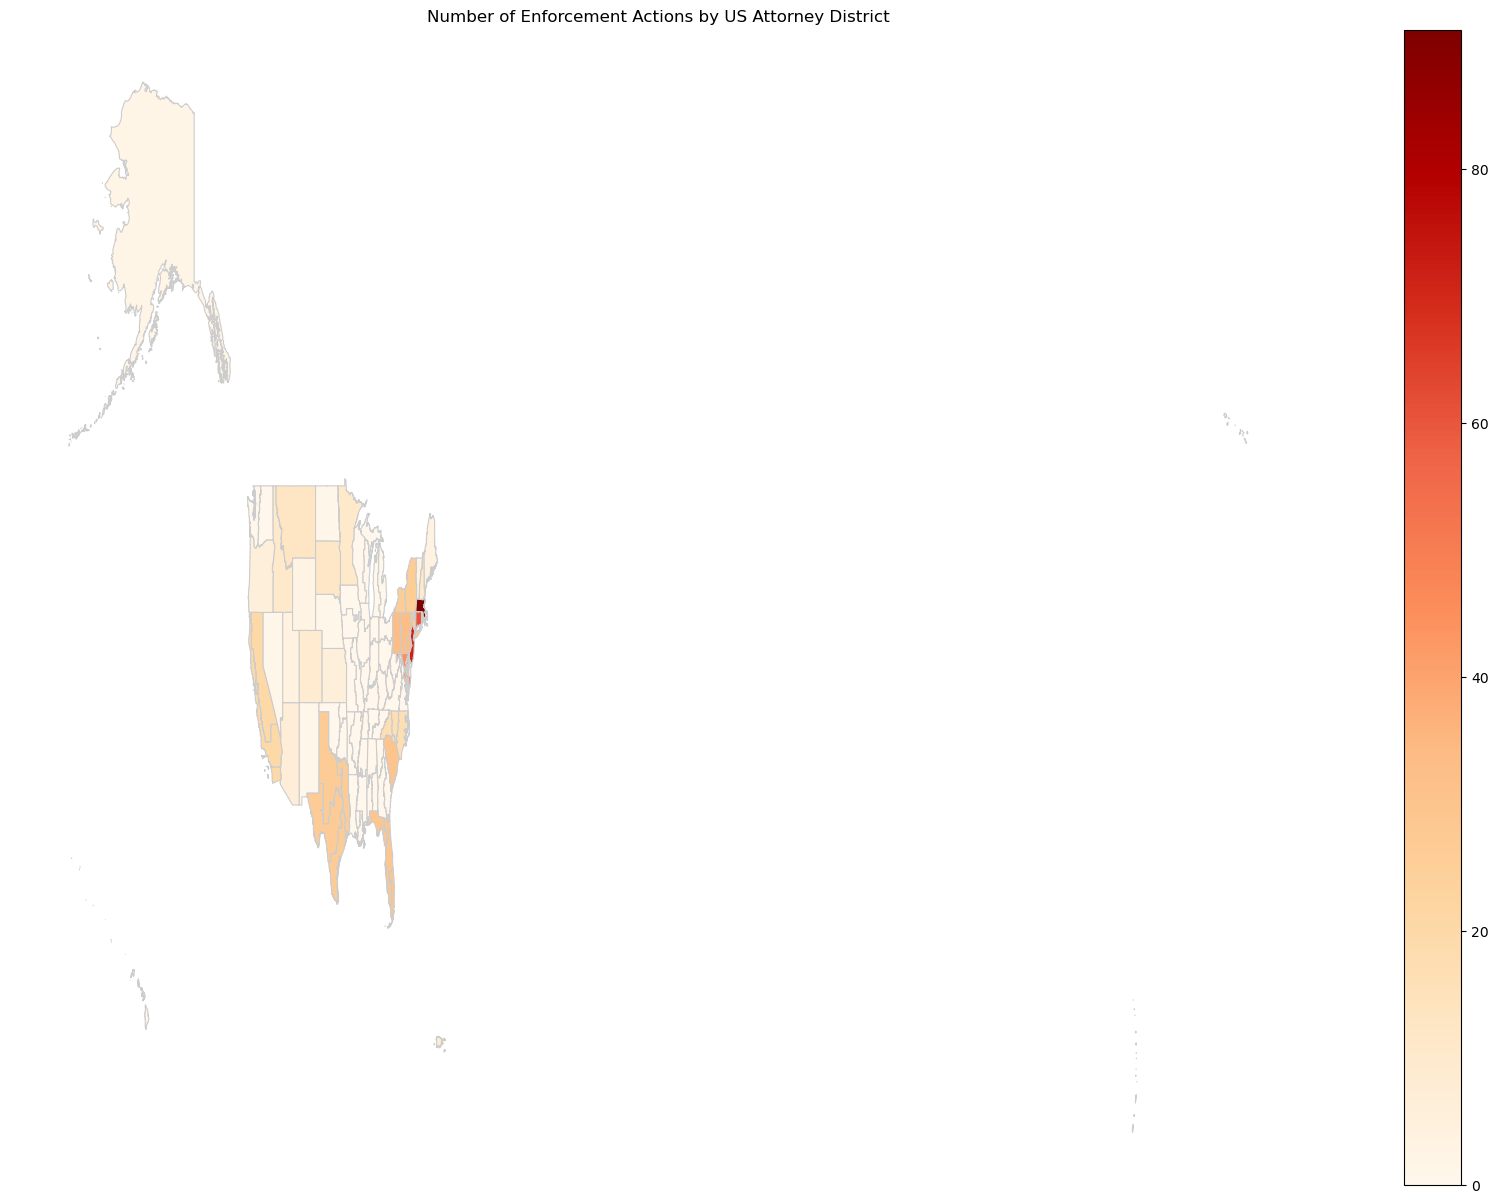

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_aspect(5.5)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


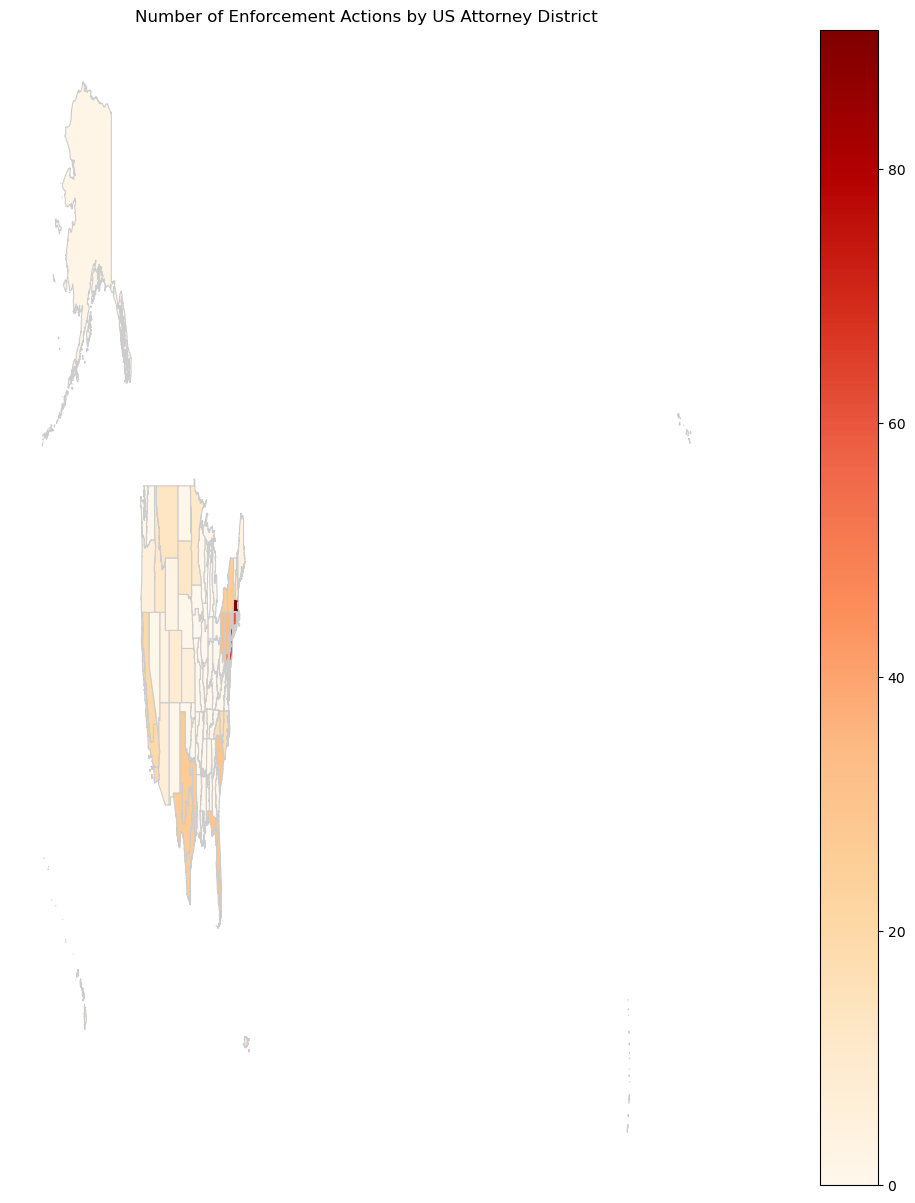

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_aspect(10)
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_aspect(10， 10)
plt.axis('off')
plt.show()

SyntaxError: invalid character '，' (U+FF0C) (<ipython-input-68-f21e60b12699>, line 61)

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


ValueError: 10 is not a valid value for adjustable; supported values are 'box', 'datalim'

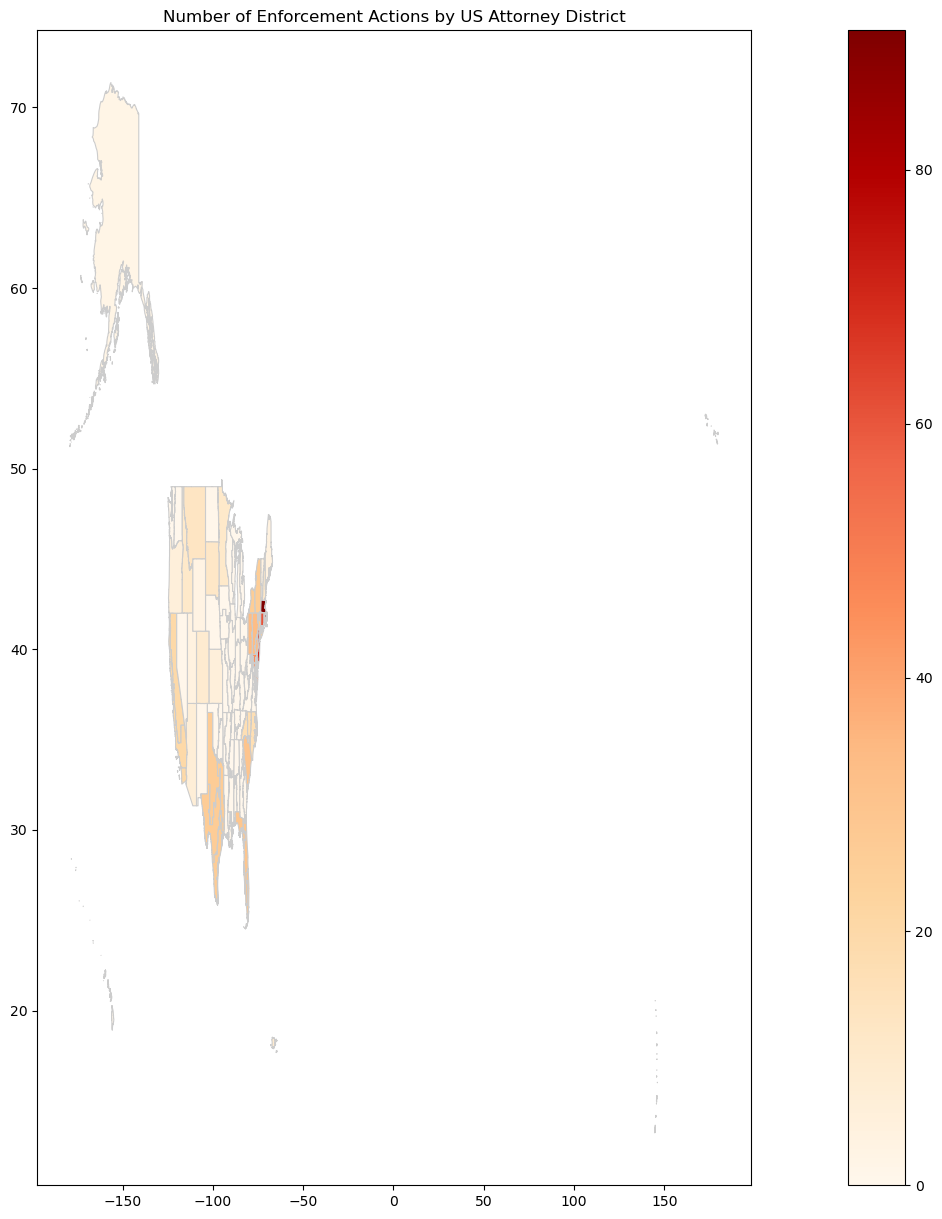

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_aspect(10, 10)
plt.axis('off')
plt.show()

First few rows of merged GeoDataFrame:
           district  count
0  western kentucky    NaN
1  eastern kentucky    NaN
2  southern indiana    NaN
3    middle alabama    NaN
4  southern alabama    NaN
Unmatched districts:
                            district  count
0         u.s. department of justice  337.0
2     massachusetts attorney general   74.0
5           florida attorney general   60.0
6    south carolina attorney general   54.0
7                           michigan   48.0
..                               ...    ...
101  massachusetts  attorney general    1.0
102        nebraska attorney general    1.0
104         arizona attorney general    1.0
105                      idaho boise    1.0
106         hawai’i attorney general    1.0

[79 rows x 2 columns]


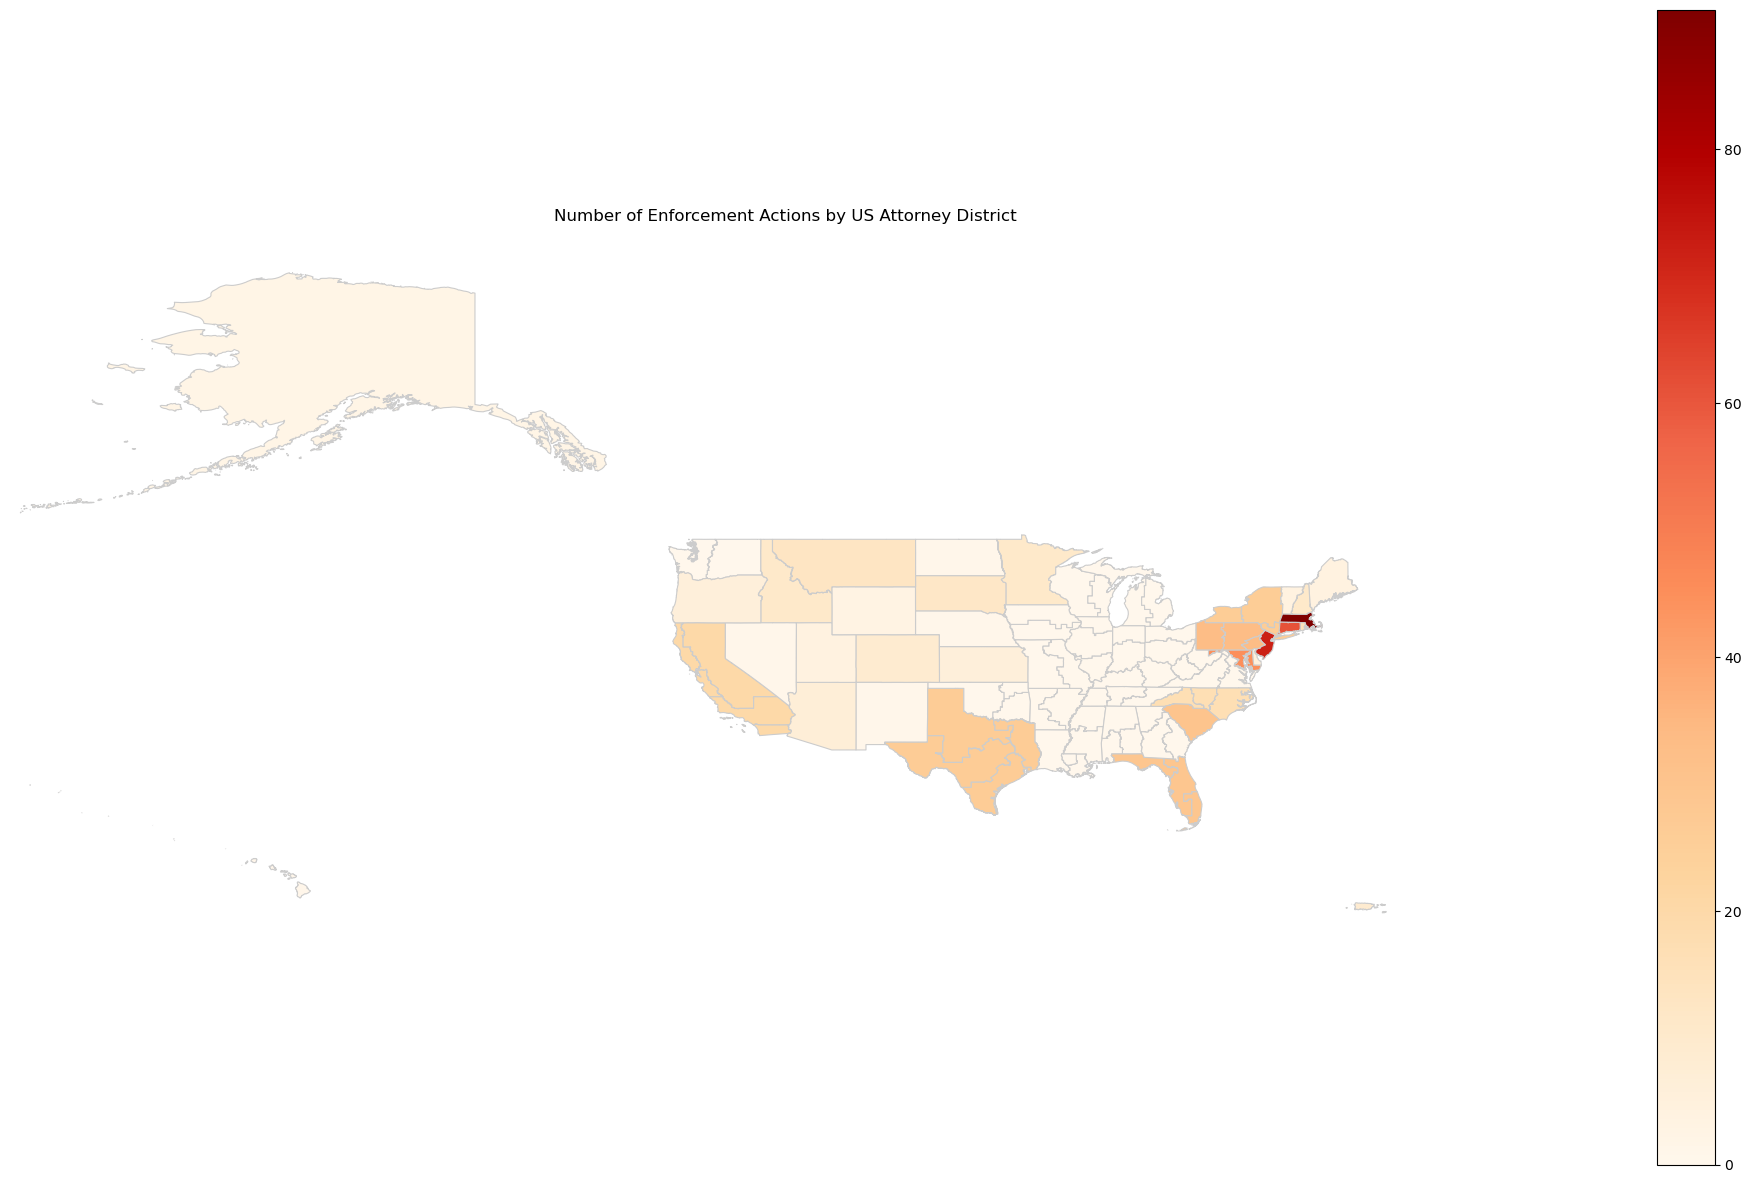

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

enforcement_data_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/enforcement_actions_2021_1.csv'
enforcement_df = pd.read_csv(enforcement_data_path)

def clean_district_name(name):
    if pd.isna(name):
        return None
    if 'District of' in name:
        return name.split('District of ')[-1].strip().lower()
    elif 'District' in name:
        return name.split('District ')[-1].strip().lower()
    elif 'State of' in name or ',' not in name:
        return name.split('State of ')[-1].strip().lower()
    return None

enforcement_df['cleaned_district'] = enforcement_df['Agency'].apply(clean_district_name)
enforcement_df = enforcement_df.dropna(subset=['cleaned_district'])

district_counts = enforcement_df['cleaned_district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

shapefile_path = '/Users/hahei/Desktop/problem-set-5-xy-wz/US Attorney Districts Shapefile simplified_20241109/geo_export_8dfa149c-a5a0-43ab-aa3e-6a96f6f0b711.shp'
us_districts_gdf = gpd.read_file(shapefile_path)

us_districts_gdf['district'] = us_districts_gdf['judicial_d'].str.replace('District of ', '').str.replace('District ', '').str.strip().str.lower()

manual_mappings = {
    'pennsylvania': ['eastern pennsylvania', 'western pennsylvania', 'middle pennsylvania'],
    'new york': ['northern new york', 'southern new york', 'eastern new york', 'western new york'],
    'texas': ['northern texas', 'southern texas', 'eastern texas', 'western texas'],
    'florida': ['northern florida', 'middle florida', 'southern florida'],
    'california': ['northern california', 'eastern california', 'central california', 'southern california'],
    'north carolina': ['eastern north carolina', 'middle north carolina', 'western north carolina'],
}

expanded_district_counts = pd.DataFrame()
for state, districts in manual_mappings.items():
    if state in district_counts['district'].values:
        count = district_counts[district_counts['district'] == state]['count'].values[0]
        for district in districts:
            expanded_district_counts = pd.concat([expanded_district_counts, pd.DataFrame({'district': [district], 'count': [count / len(districts)]})], ignore_index=True)

district_counts = pd.concat([district_counts[~district_counts['district'].isin(manual_mappings.keys())], expanded_district_counts], ignore_index=True)

merged_gdf = us_districts_gdf.merge(district_counts, how='left', left_on='district', right_on='district')

print("First few rows of merged GeoDataFrame:")
print(merged_gdf[['district', 'count']].head())

unmatched_districts = district_counts[~district_counts['district'].isin(merged_gdf['district'])]
print("Unmatched districts:")
print(unmatched_districts)

merged_gdf['count'] = merged_gdf['count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
merged_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Enforcement Actions by US Attorney District')
ax.set_aspect('equal')
ax.set_xlim(-180, -50)
ax.set_ylim(15, 75)
plt.axis('off')
plt.show()